In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/My Drive/Mestrado/2021.1/Redes Neurais Artificiais/RNA/')

Mounted at /content/drive


In [ ]:
from models import utils, metrics, plots, pipelineClassifier
from models.classifiers.PerceptronNetwork import *

from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd
import numpy as np
import random
import seaborn as sns

Observação
A codificção *1-out-of-c* é feita internamente na função fit por meio da função *target_one_vs_all*, localizada no módulo utils.

## Iris

In [ ]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = pd.Series(data.target)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Neuronio 0


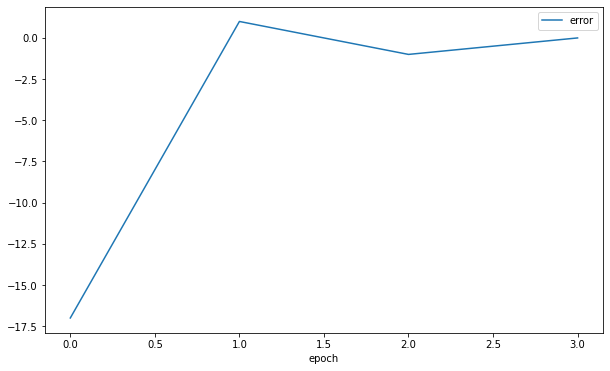

Neuronio 1


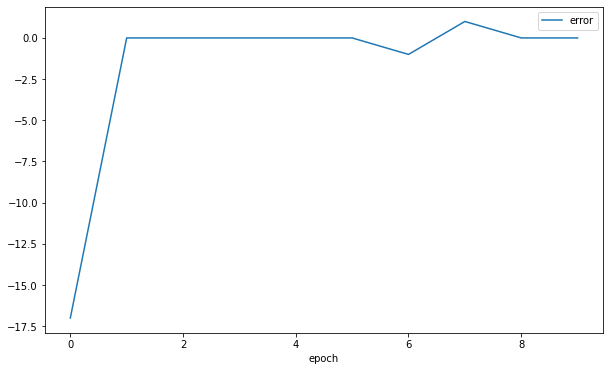

Neuronio 2


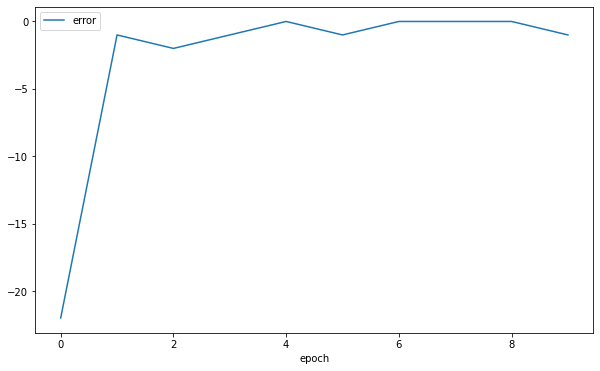

Taxa de Acerto: 0.9
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Neuronio 0


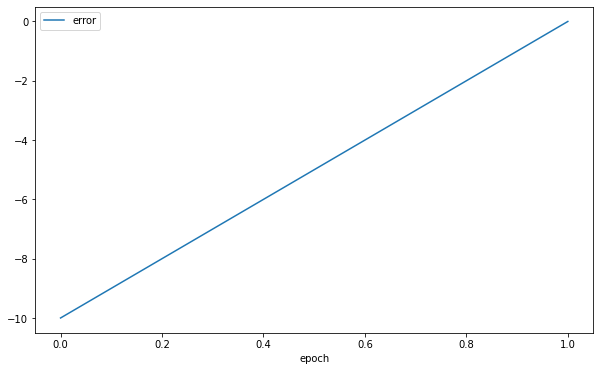

Neuronio 1


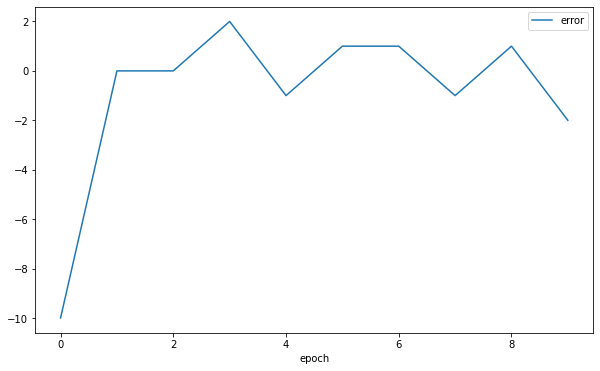

Neuronio 2


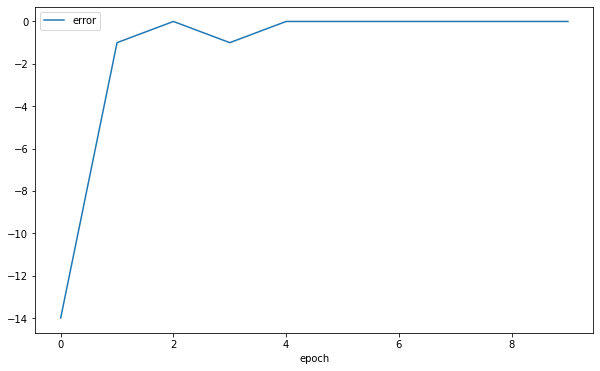

Taxa de Acerto: 0.7666666666666667
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Neuronio 0


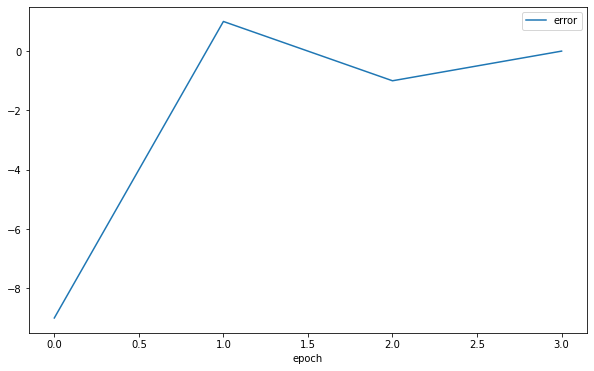

Neuronio 1


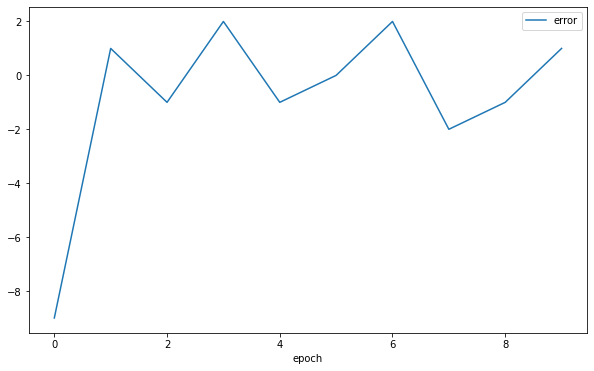

Neuronio 2


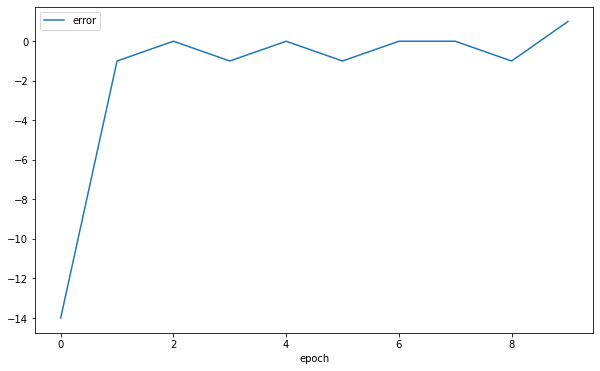

Taxa de Acerto: 0.8666666666666667
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 3
Start Grid Search k-fold: 5
Neuronio 0


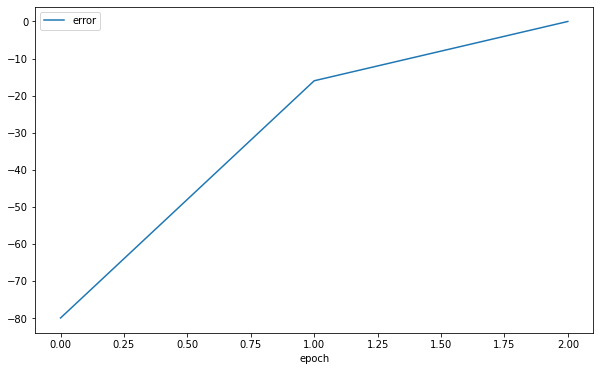

Neuronio 1


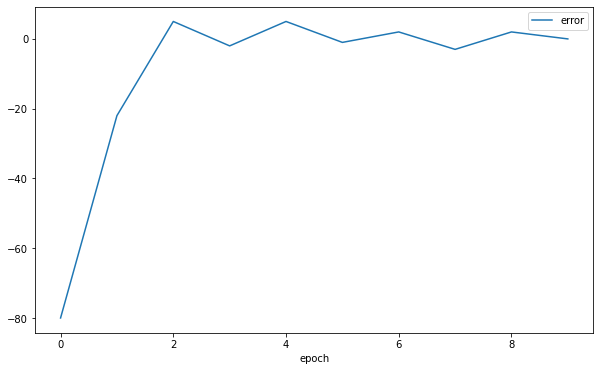

Neuronio 2


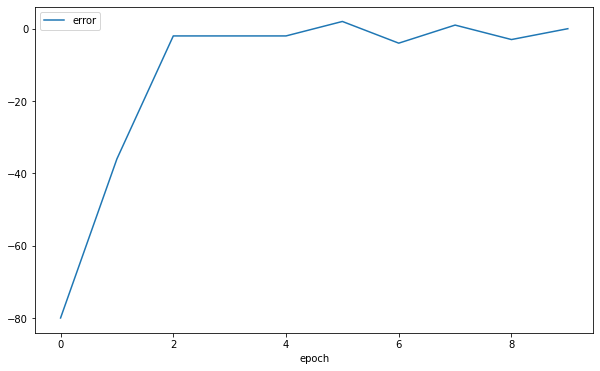

Taxa de Acerto: 0.9333333333333333
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 4
Start Grid Search k-fold: 5
Neuronio 0


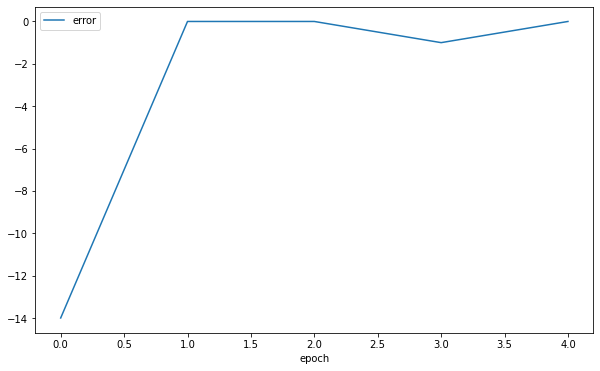

Neuronio 1


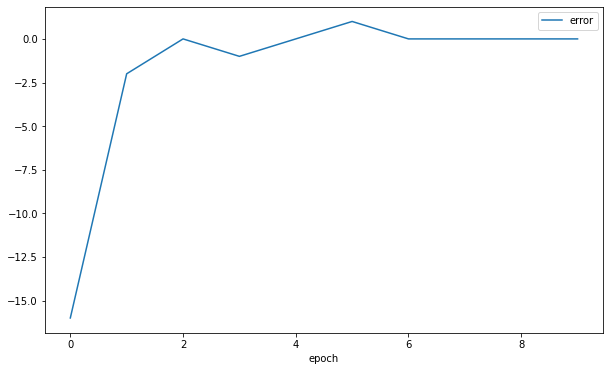

Neuronio 2


Taxa de Acerto: 0.9
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 5
Start Grid Search k-fold: 5
Neuronio 0


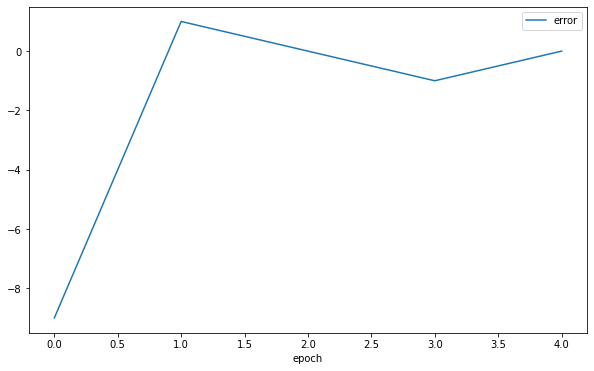

Neuronio 1


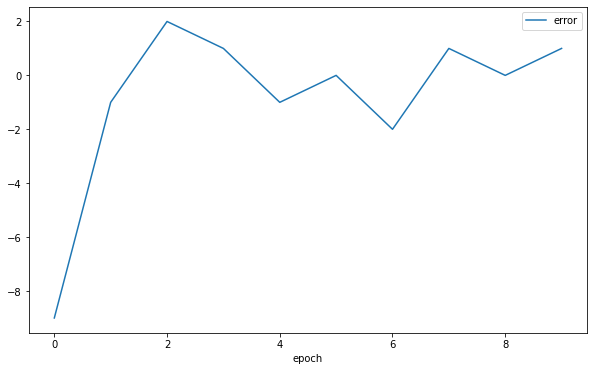

Neuronio 2


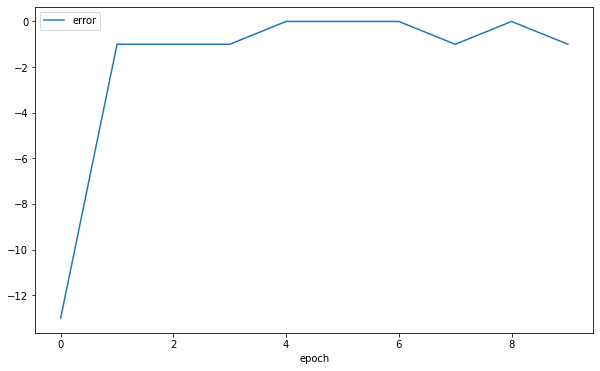

Taxa de Acerto: 0.7333333333333333
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 6
Start Grid Search k-fold: 5
Neuronio 0


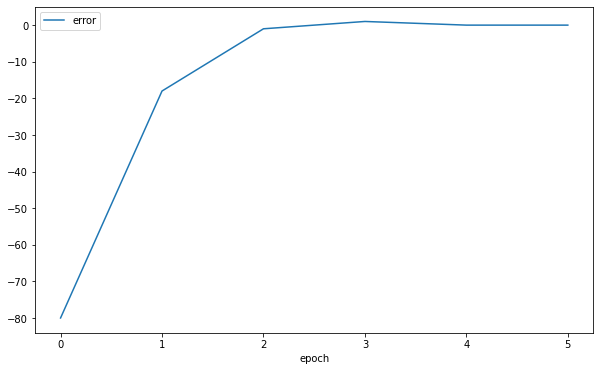

Neuronio 1


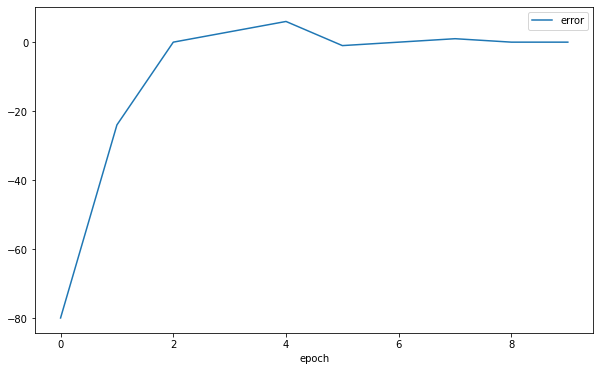

Neuronio 2


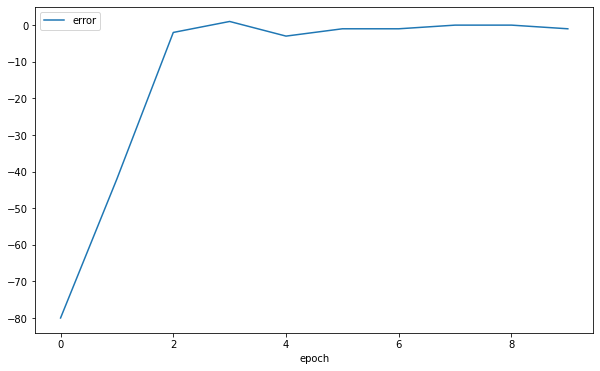

Taxa de Acerto: 0.8
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 7
Start Grid Search k-fold: 5
Neuronio 0


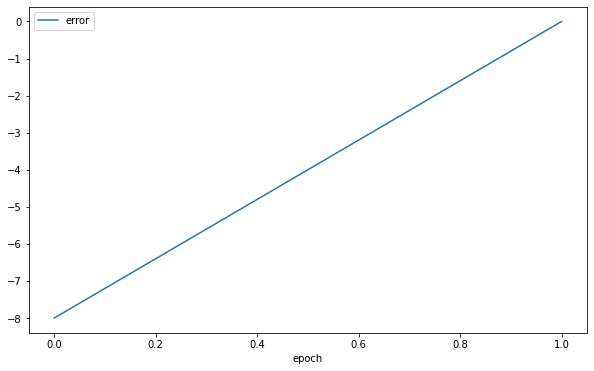

Neuronio 1


Neuronio 2


Taxa de Acerto: 0.8666666666666667
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 8
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


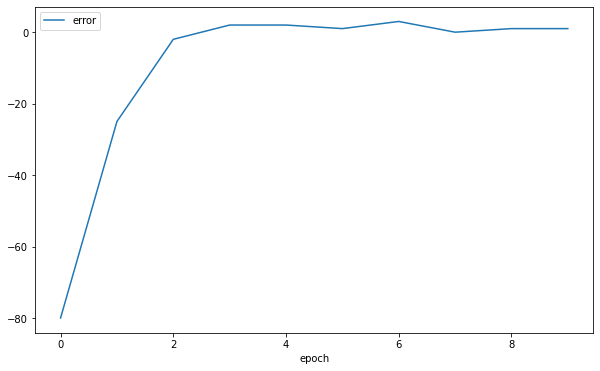

Neuronio 2


Taxa de Acerto: 0.8333333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 9
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


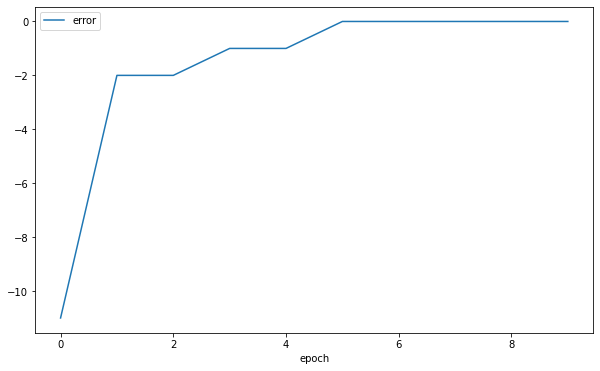

Taxa de Acerto: 0.8333333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 10
Start Grid Search k-fold: 5
Neuronio 0


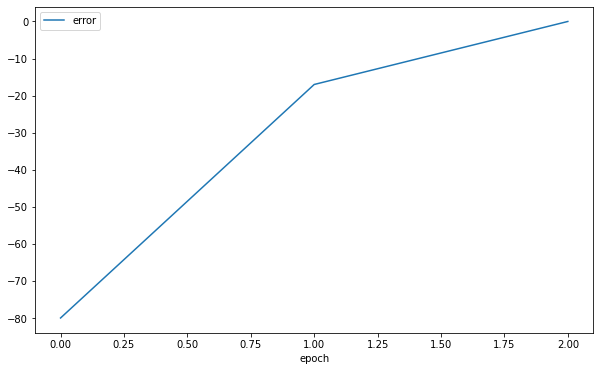

Neuronio 1


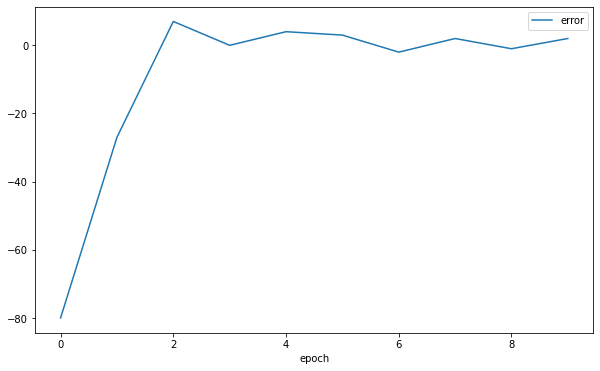

Neuronio 2


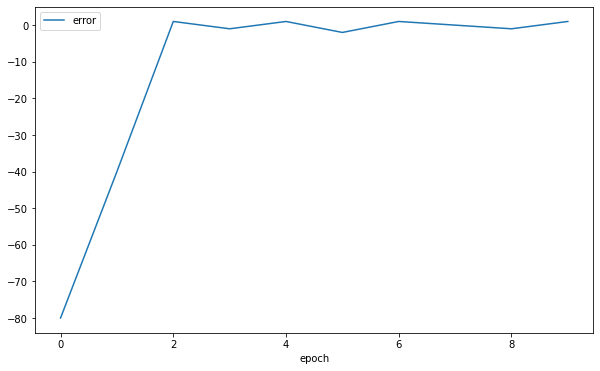

Taxa de Acerto: 0.8333333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 11
Start Grid Search k-fold: 5
Neuronio 0


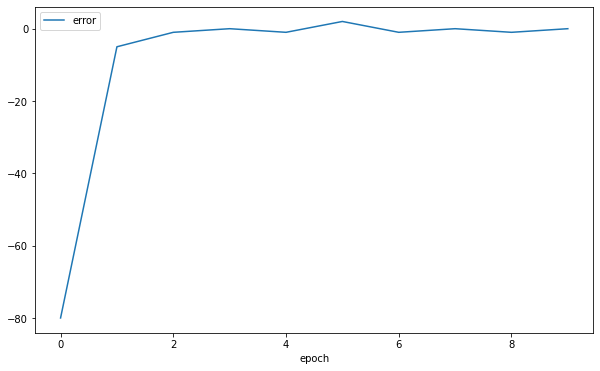

Neuronio 1


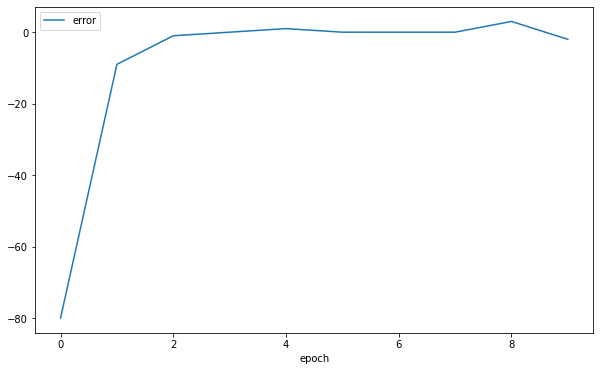

Neuronio 2


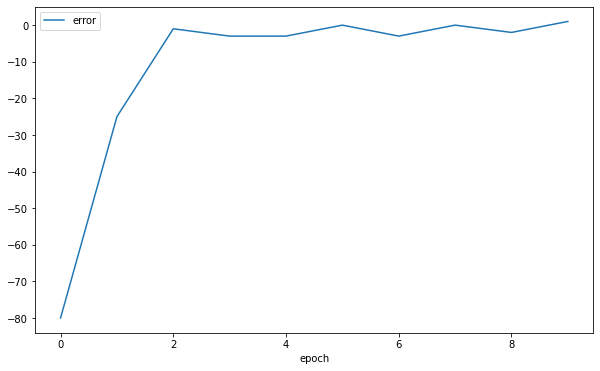

Taxa de Acerto: 0.9333333333333333
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 12
Start Grid Search k-fold: 5
Neuronio 0


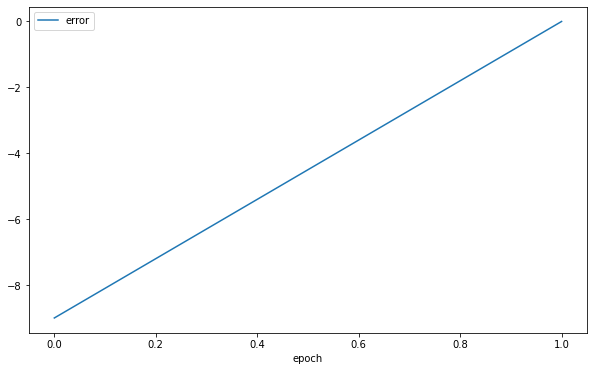

Neuronio 1


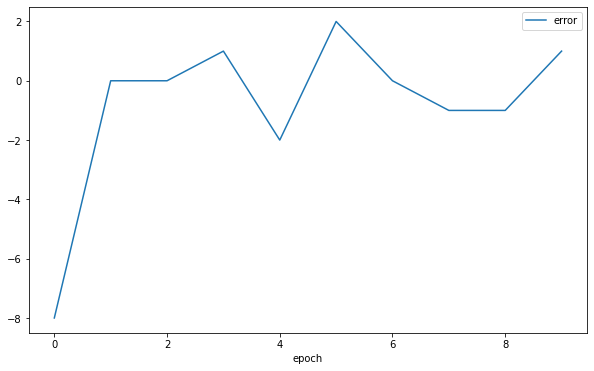

Neuronio 2


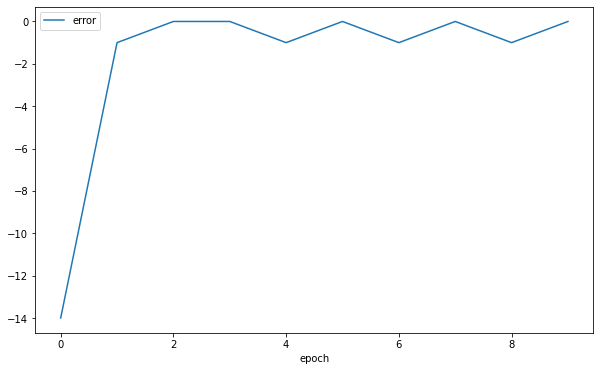

Taxa de Acerto: 0.8333333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 13
Start Grid Search k-fold: 5
Neuronio 0


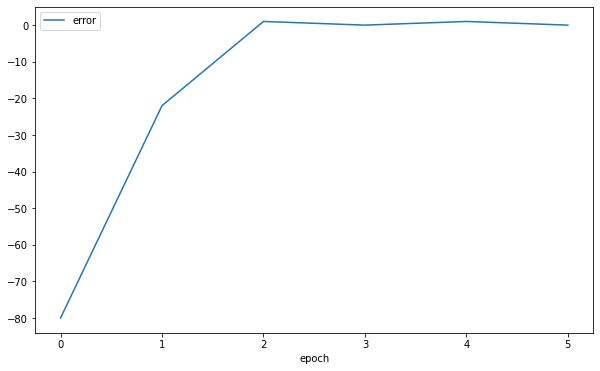

Neuronio 1


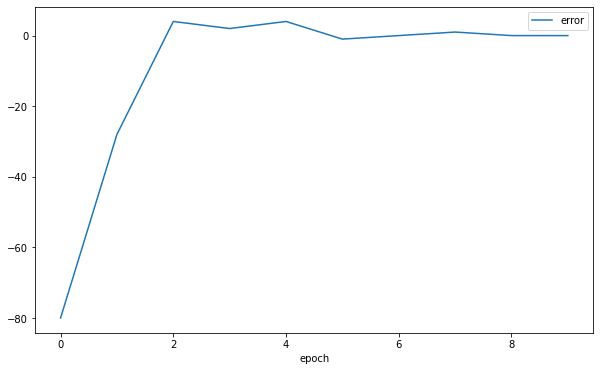

Neuronio 2


Taxa de Acerto: 0.8666666666666667
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 14
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


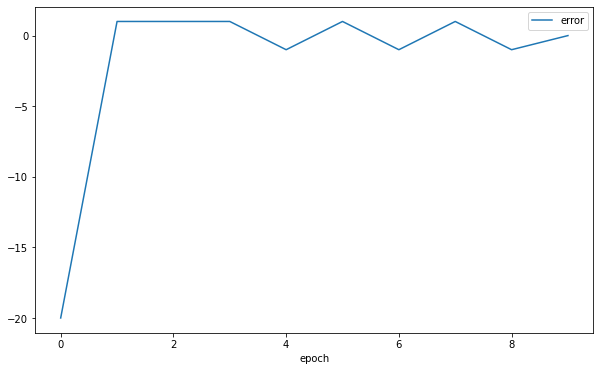

Neuronio 2


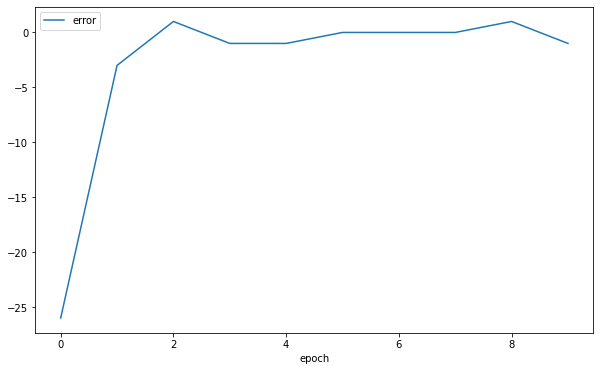

Taxa de Acerto: 0.7333333333333333
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 15
Start Grid Search k-fold: 5
Neuronio 0


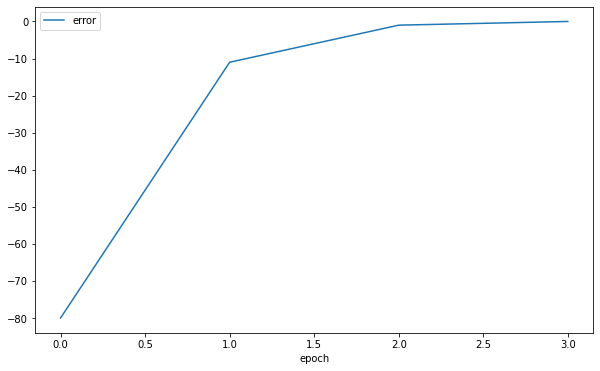

Neuronio 1


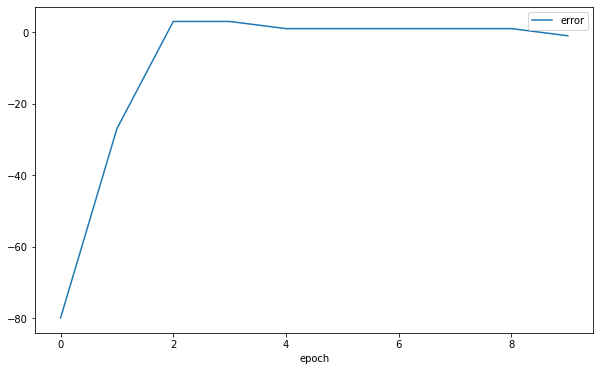

Neuronio 2


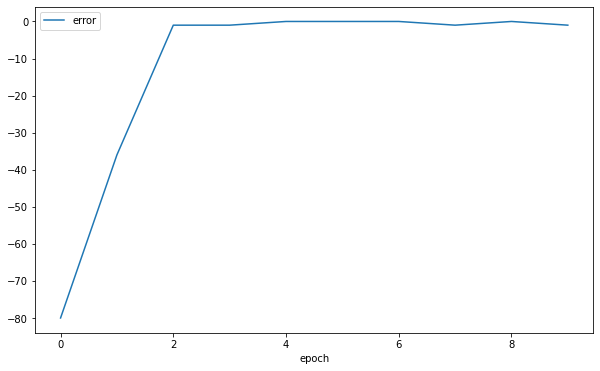

Taxa de Acerto: 0.9
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 16
Start Grid Search k-fold: 5
Neuronio 0


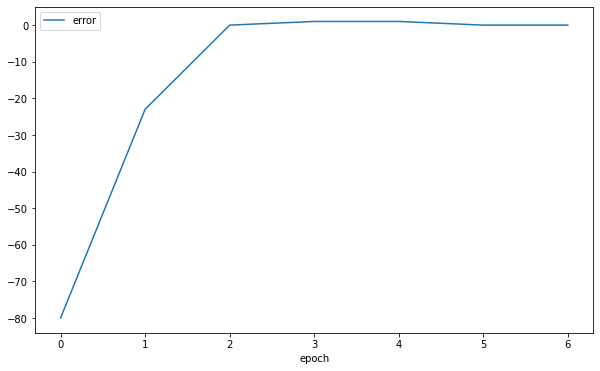

Neuronio 1


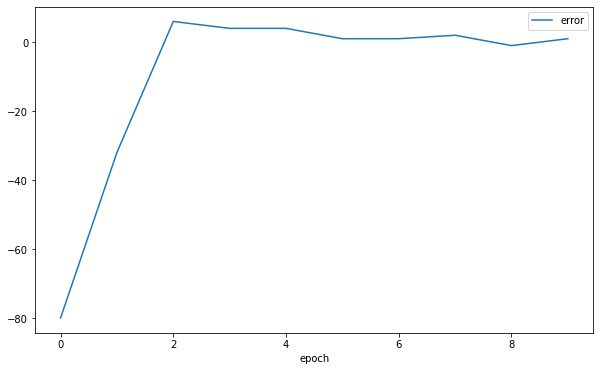

Neuronio 2


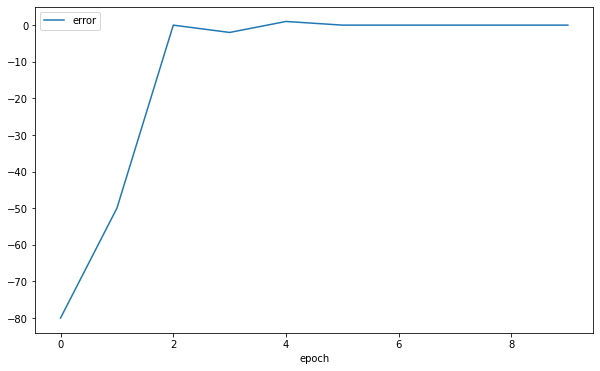

Taxa de Acerto: 0.7333333333333333
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 17
Start Grid Search k-fold: 5
Neuronio 0


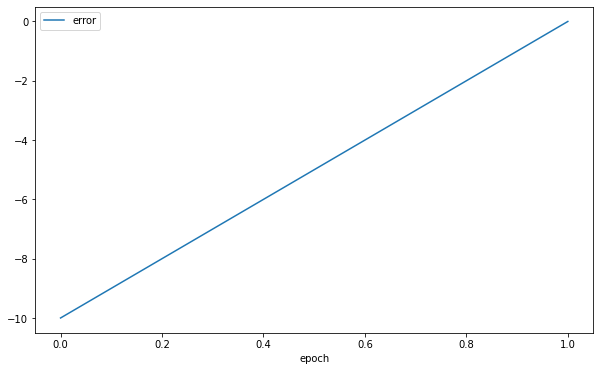

Neuronio 1


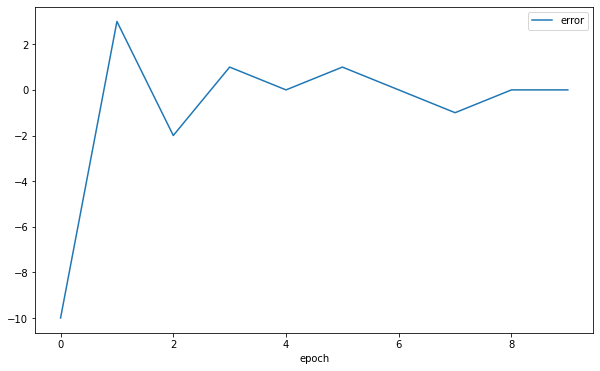

Neuronio 2


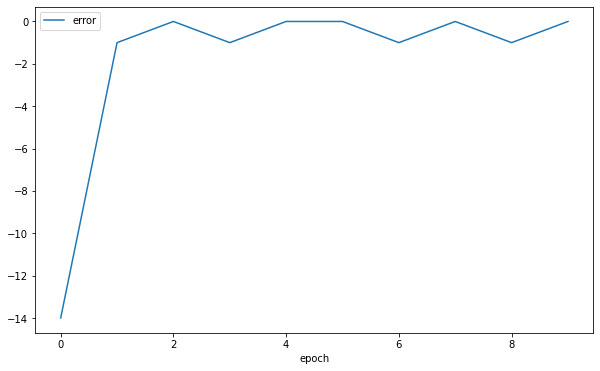

Taxa de Acerto: 0.9
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 18
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


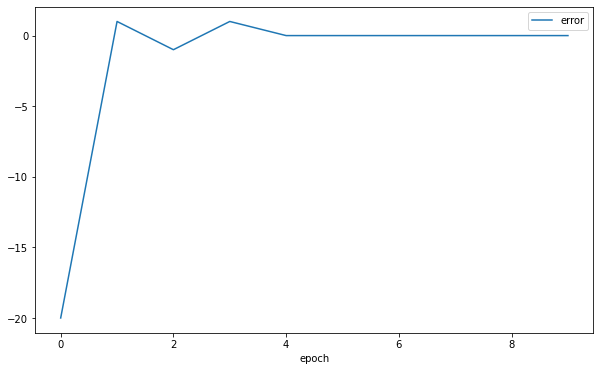

Neuronio 2


Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 19
Start Grid Search k-fold: 5
Neuronio 0


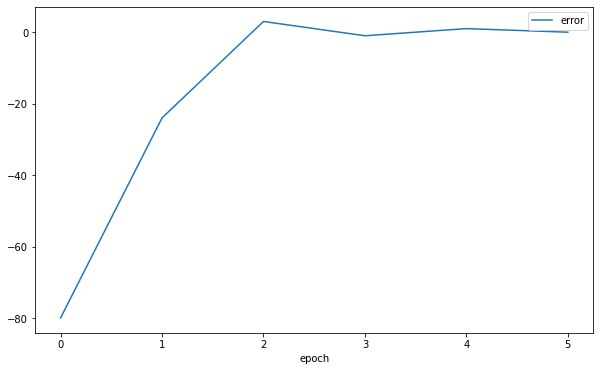

Neuronio 1


Neuronio 2


Taxa de Acerto: 0.9
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
pipe = pipelineClassifier.make_pipeline(n_realizations = 20, task='multiclass_classification')

acc_artificial_iris, desvio_padrao_artificial_iris, realization_select_artificial_iris, dict_realizations_artificial_iris = pipe.run_realizations(
    
    df=df_iris, 
    k_fold=5, 
    param_grid={'learning_rate': [0.1, 0.01, 0.05]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    n_epochs=10,
    normalize=True
)

In [ ]:
best_perceptron_artificial_iris = realization_select_artificial_iris['classifier']
best_train_data_iris = realization_select_artificial_iris['train_data']
best_train_data_iris = realization_select_artificial_iris['test_data']
taxa_acerto_iris = realization_select_artificial_iris['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_iris}\nDesvio Padrao: {desvio_padrao_artificial_iris}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_iris}')

Artificial
Acurácia: 0.8533333333333333
Desvio Padrao: 0.0728693455471355

- Info best model
Taxa Acerto: 0.8666666666666667


## Coluna Vertebral


In [ ]:
list_col_names = ['incidencia_pelvica', 
                  'inclinacao_pelvica', 
                  'angulo_lordose_lombar', 
                  'inclinacao_sacral', 
                  'radio_pelvico',
                  'grau_espondilolistese', 'target']

df_column = pd.read_csv('./datasets/vertebral_column/column_3C.dat', names = list_col_names, sep=' ')

dict_ = dict(zip(df_column['target'].unique().tolist(), range(len(df_column['target'].unique().tolist()))))

df_column['target'] = df_column['target'].apply(lambda row: dict_[row])

In [ ]:
df_column.head(6)

incidencia_pelvica  inclinacao_pelvica  ...  grau_espondilolistese  target
0               63.03               22.55  ...                  -0.25       0
1               39.06               10.06  ...                   4.56       0
2               68.83               22.22  ...                  -3.53       0
3               69.30               24.65  ...                  11.21       0
4               49.71                9.65  ...                   7.92       0
5               40.25               13.92  ...                   2.23       0

[6 rows x 7 columns]




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Neuronio 0


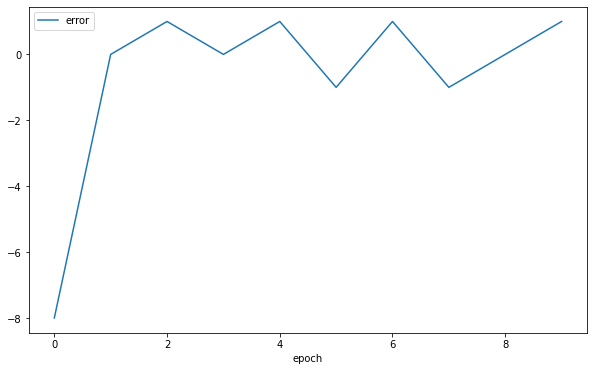

Neuronio 1


Neuronio 2


Taxa de Acerto: 0.7258064516129032
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Neuronio 0


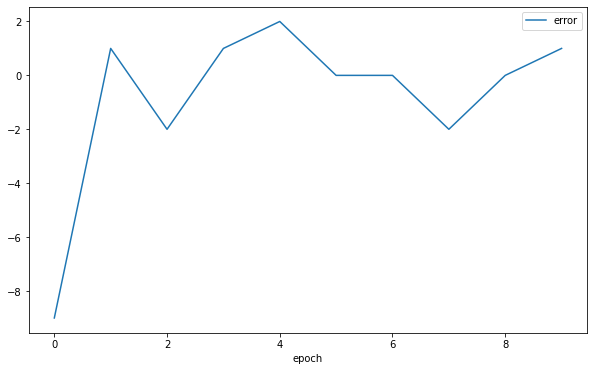

Neuronio 1


Neuronio 2


Taxa de Acerto: 0.6774193548387096
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Neuronio 0


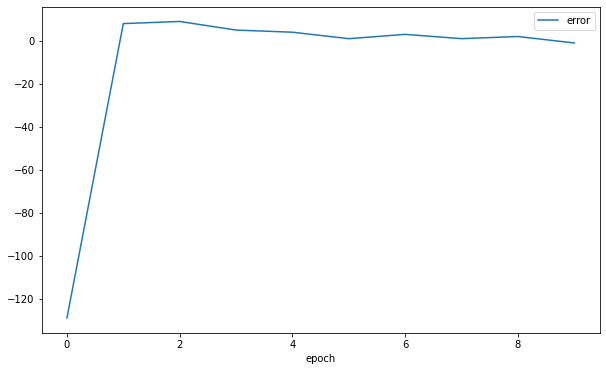

Neuronio 1


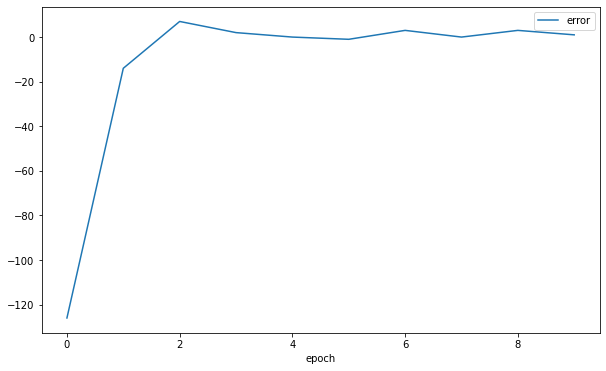

Neuronio 2


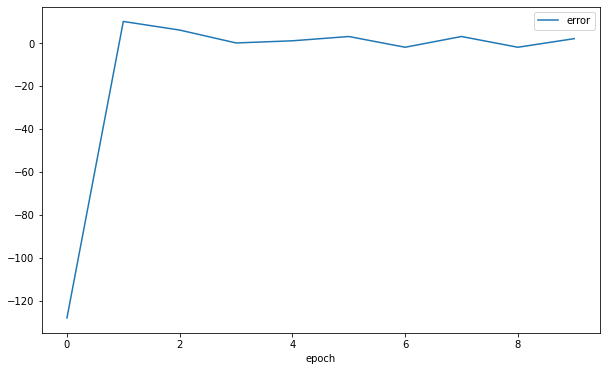

Taxa de Acerto: 0.7258064516129032
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 3
Start Grid Search k-fold: 5
Neuronio 0


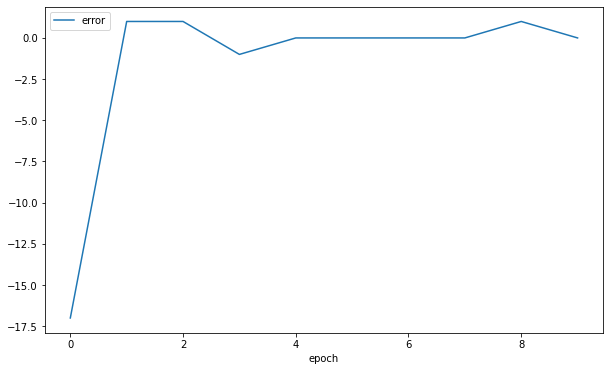

Neuronio 1


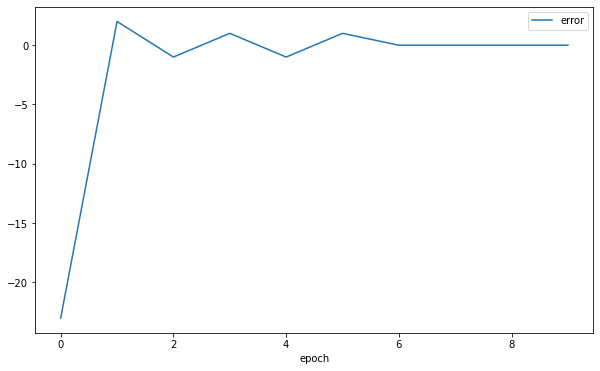

Neuronio 2


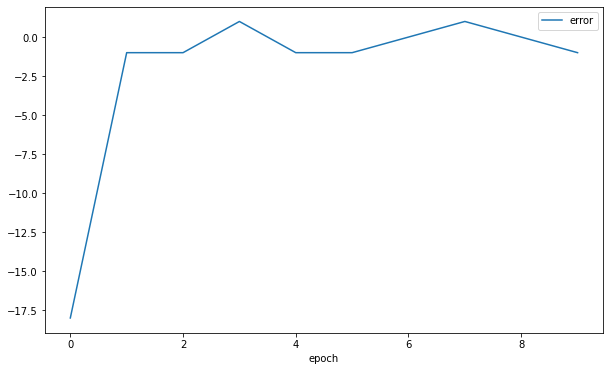

Taxa de Acerto: 0.6612903225806451
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 4
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


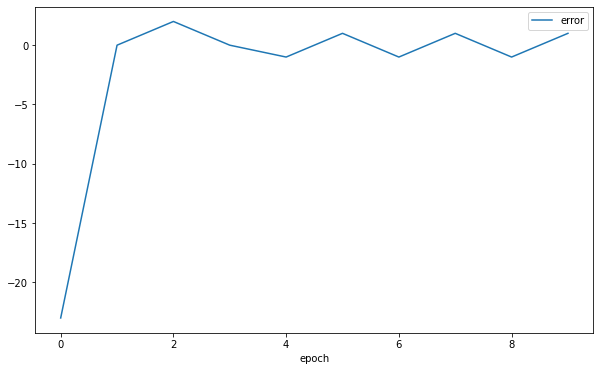

Taxa de Acerto: 0.7258064516129032
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 5
Start Grid Search k-fold: 5
Neuronio 0


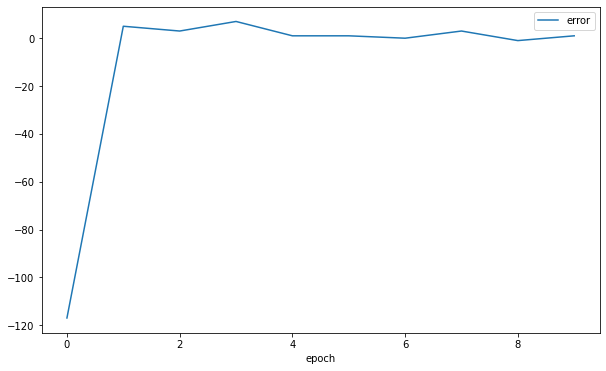

Neuronio 1


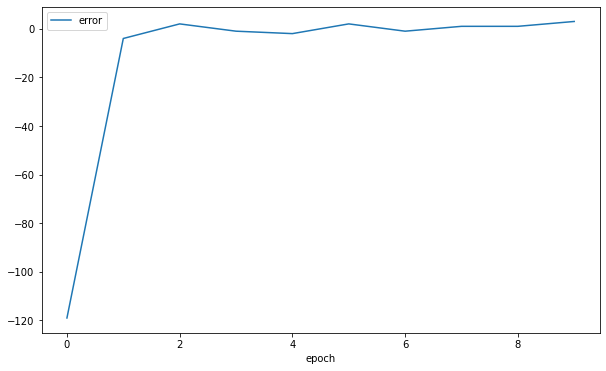

Neuronio 2


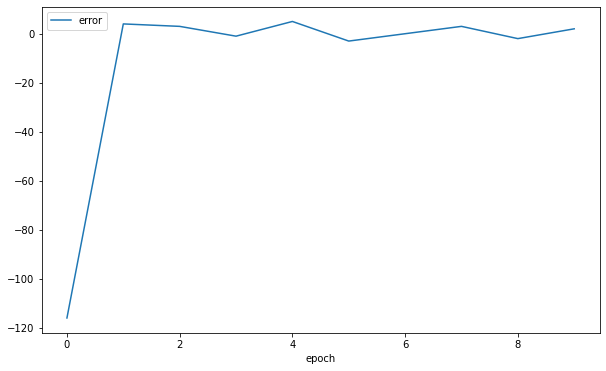

Taxa de Acerto: 0.8225806451612904
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 6
Start Grid Search k-fold: 5
Neuronio 0


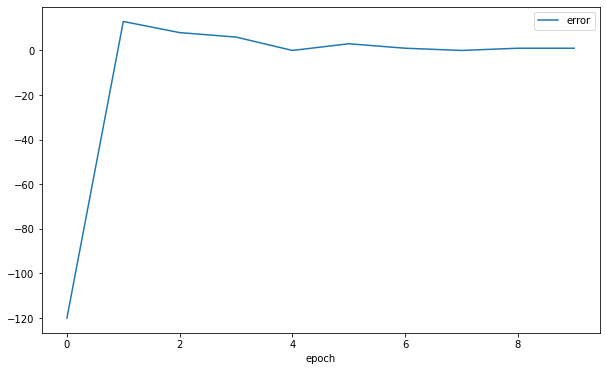

Neuronio 1


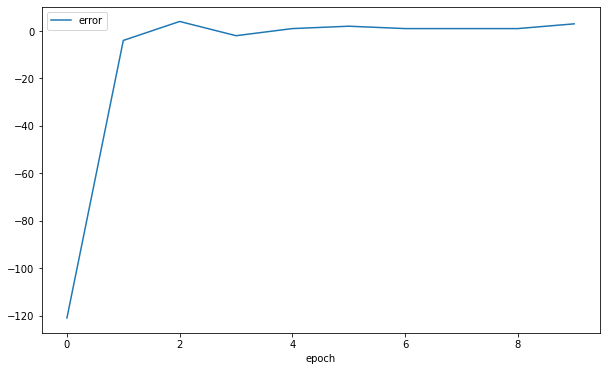

Neuronio 2


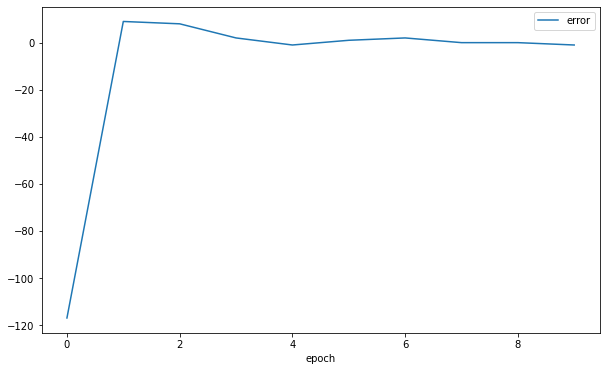

Taxa de Acerto: 0.7419354838709677
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 7
Start Grid Search k-fold: 5
Neuronio 0


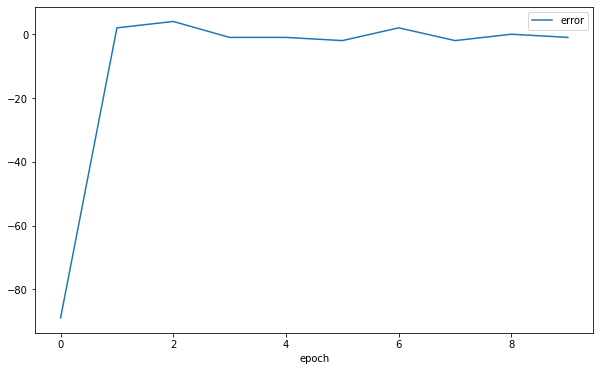

Neuronio 1


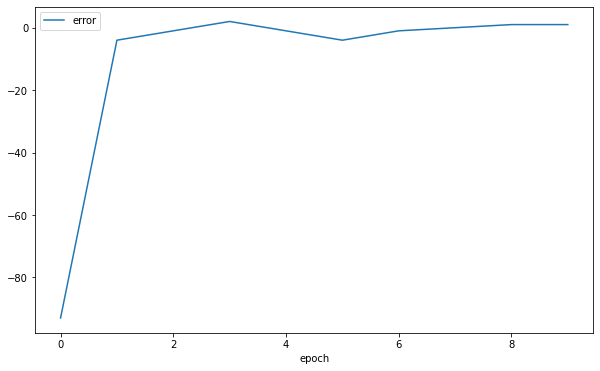

Neuronio 2


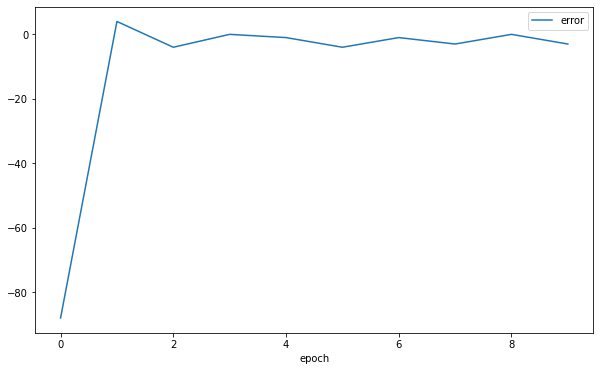

Taxa de Acerto: 0.6290322580645161
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 8
Start Grid Search k-fold: 5
Neuronio 0


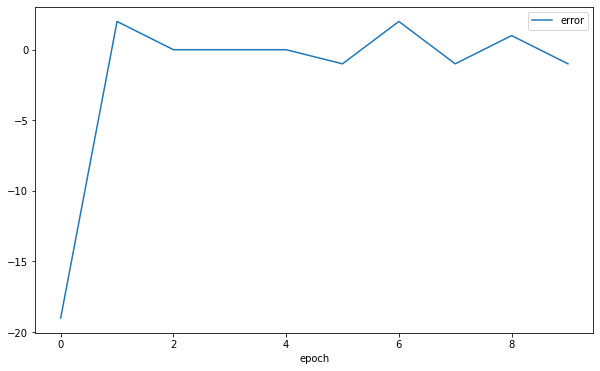

Neuronio 1


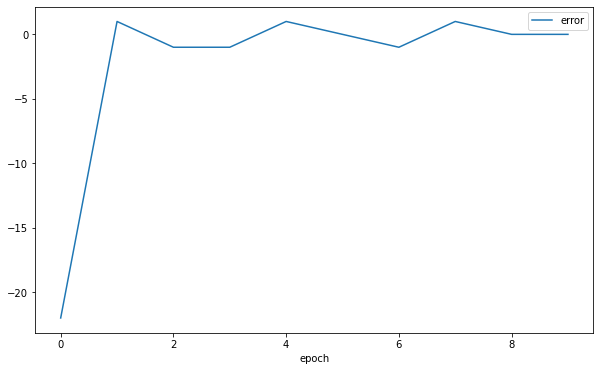

Neuronio 2


Taxa de Acerto: 0.8387096774193549
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 9
Start Grid Search k-fold: 5
Neuronio 0


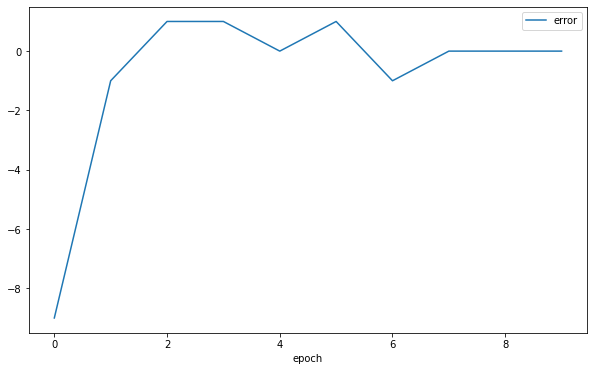

Neuronio 1


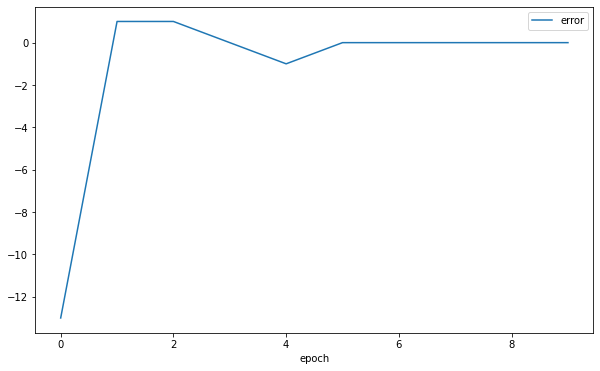

Neuronio 2


Taxa de Acerto: 0.8870967741935484
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 10
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


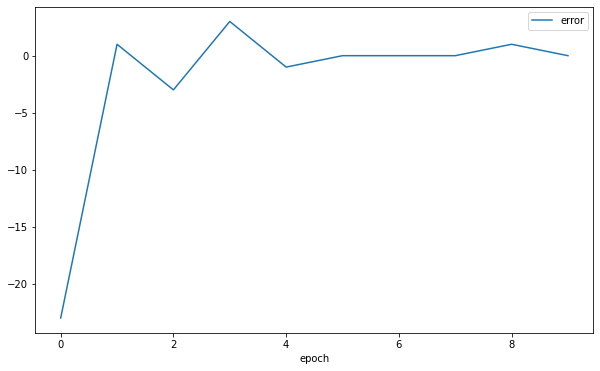

Neuronio 2


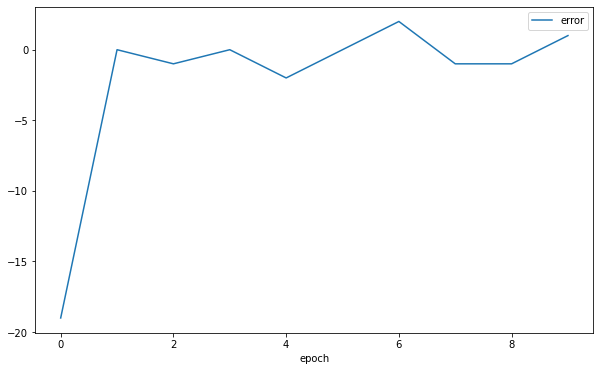

Taxa de Acerto: 0.7580645161290323
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 11
Start Grid Search k-fold: 5
Neuronio 0


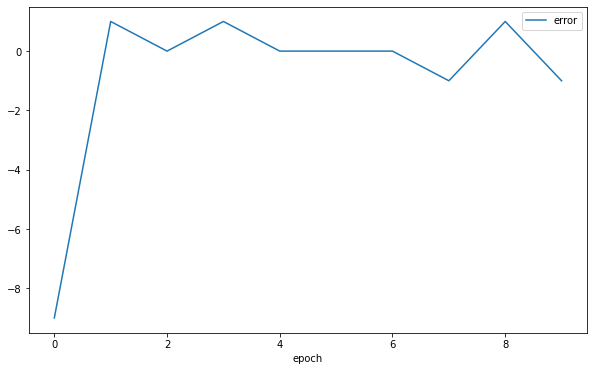

Neuronio 1


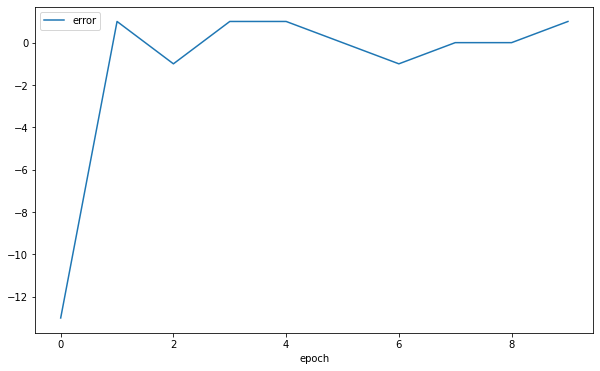

Neuronio 2


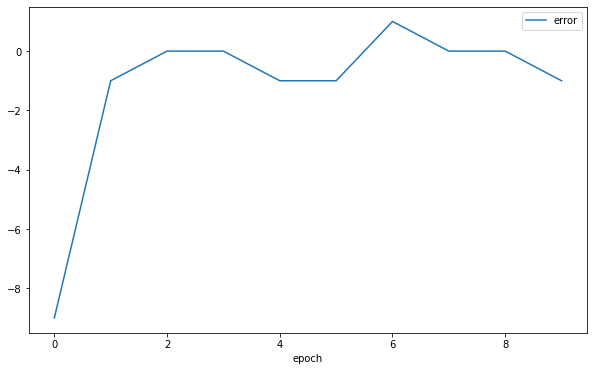

Taxa de Acerto: 0.5967741935483871
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 12
Start Grid Search k-fold: 5
Neuronio 0


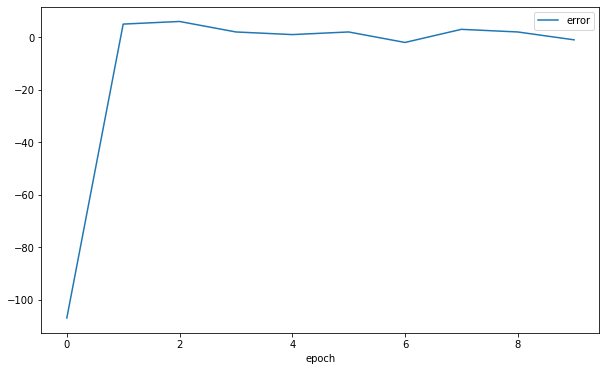

Neuronio 1


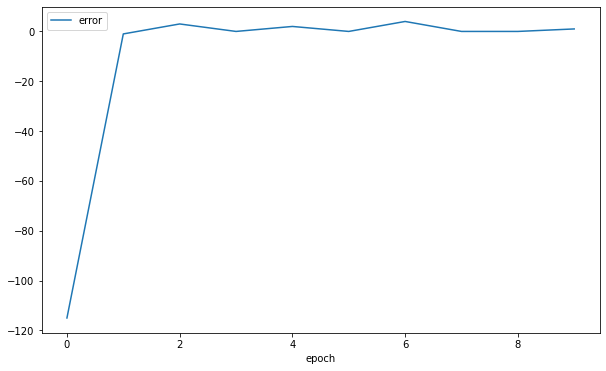

Neuronio 2


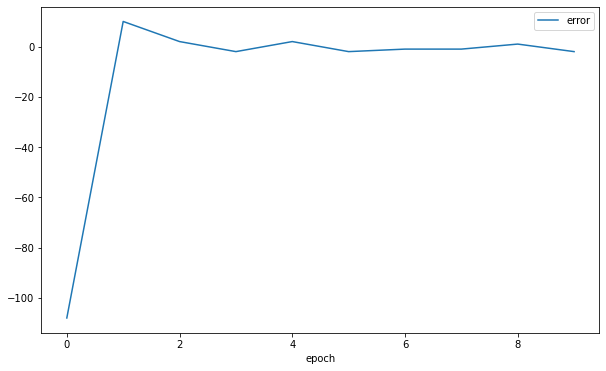

Taxa de Acerto: 0.8064516129032258
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 13
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


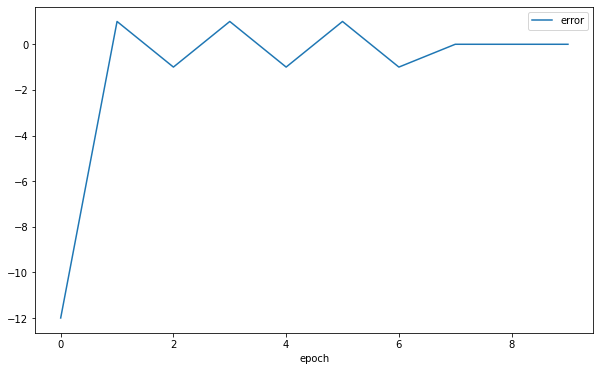

Neuronio 2


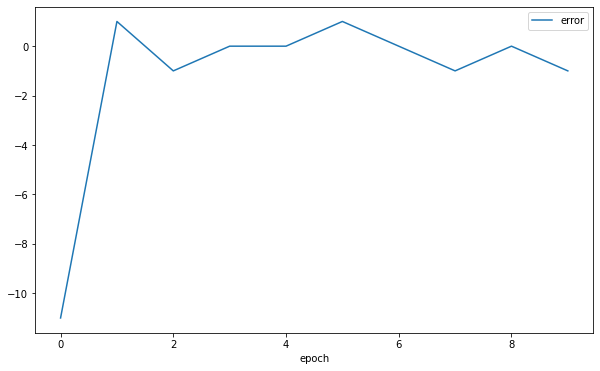

Taxa de Acerto: 0.7580645161290323
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 14
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


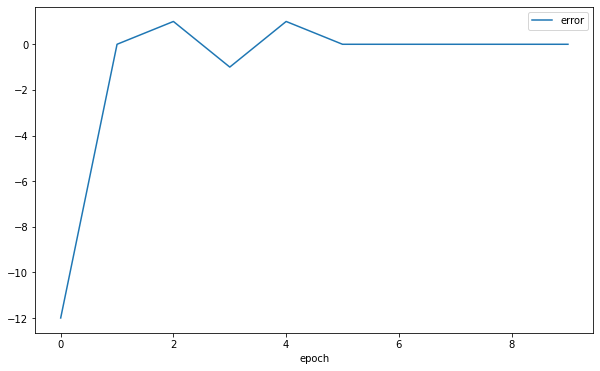

Neuronio 2


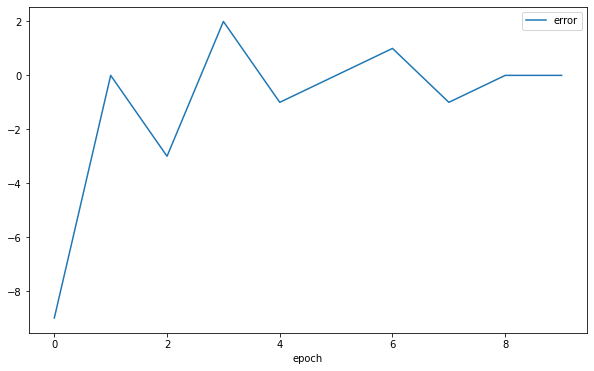

Taxa de Acerto: 0.5967741935483871
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 15
Start Grid Search k-fold: 5
Neuronio 0


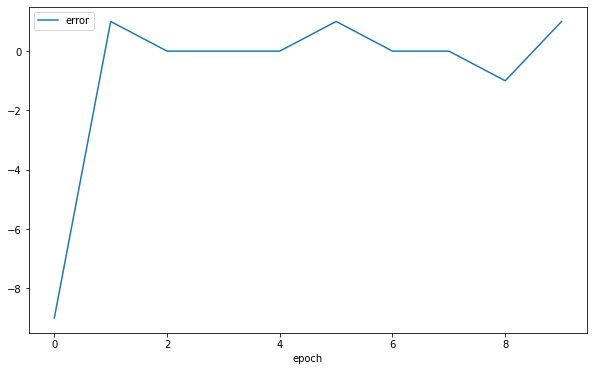

Neuronio 1


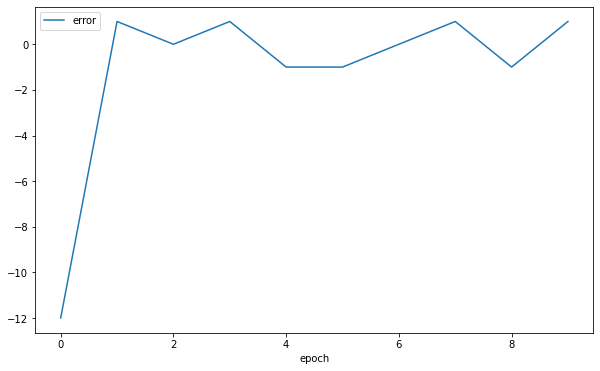

Neuronio 2


Taxa de Acerto: 0.8387096774193549
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 16
Start Grid Search k-fold: 5
Neuronio 0


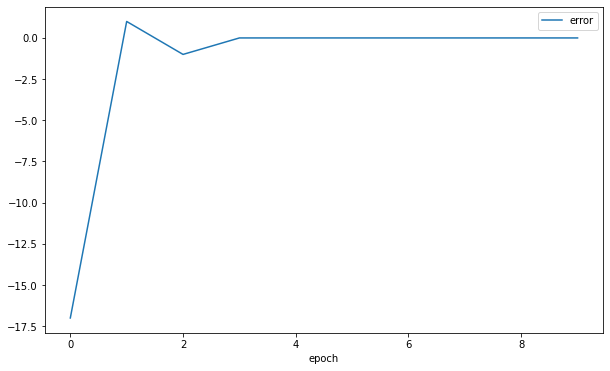

Neuronio 1


Neuronio 2


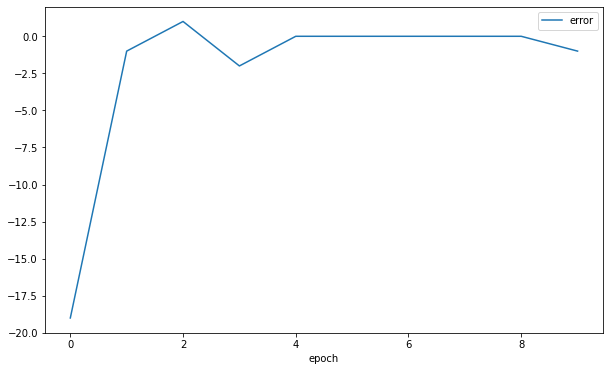

Taxa de Acerto: 0.6129032258064516
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 17
Start Grid Search k-fold: 5
Neuronio 0


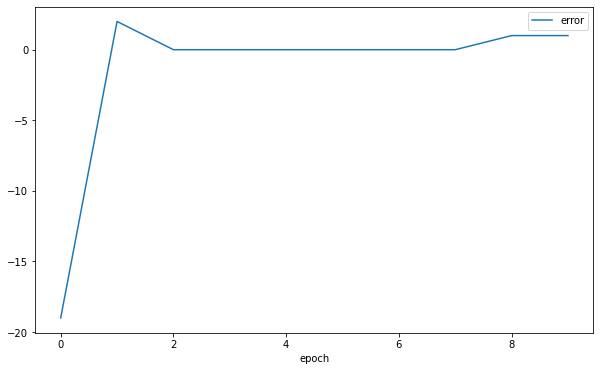

Neuronio 1


Neuronio 2


Taxa de Acerto: 0.7419354838709677
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 18
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


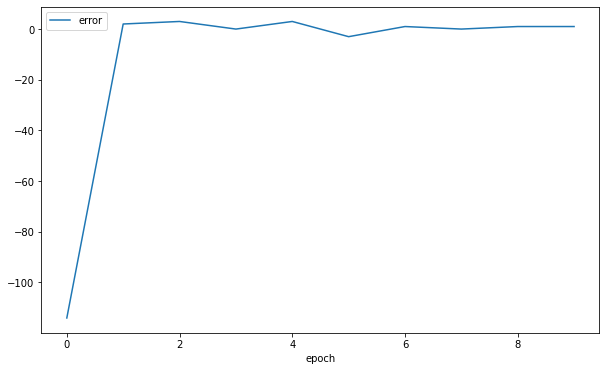

Taxa de Acerto: 0.7580645161290323
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 19
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


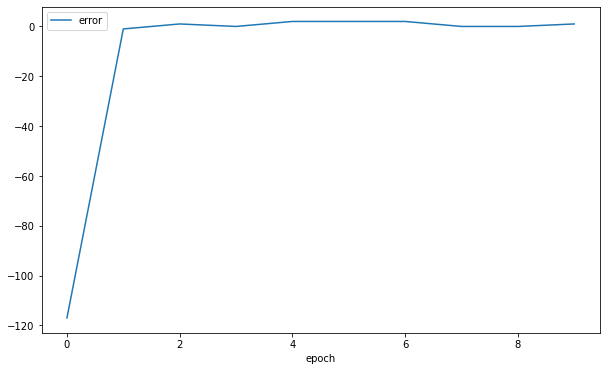

Neuronio 2


Taxa de Acerto: 0.7096774193548387
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
pipe = pipelineClassifier.make_pipeline(n_realizations = 20, task='multiclass_classification')

acc_artificial_col, desvio_padrao_artificial_col, realization_select_artificial_col, dict_realizations_artificial_col = pipe.run_realizations(
    
    df=df_column, 
    k_fold=5, 
    param_grid={'learning_rate': [0.1, 0.01, 0.05]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    n_epochs=10,
    normalize=True
)

In [ ]:
best_perceptron_artificial_col = realization_select_artificial_col['classifier']
best_train_data_col = realization_select_artificial_col['train_data']
best_train_data_col = realization_select_artificial_col['test_data']
taxa_acerto_col = realization_select_artificial_col['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_col}\nDesvio Padrao: {desvio_padrao_artificial_col}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_col}')

Artificial
Acurácia: 0.7306451612903226
Desvio Padrao: 0.08357987882479348

- Info best model
Taxa Acerto: 0.7258064516129032


# Câncer de Mama

In [16]:
data = load_breast_cancer()
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = pd.Series(data.target)

df_cancer['target'].value_counts() # 0 = 'malignant', 1 = 'benign'

1    357
0    212
Name: target, dtype: int64

In [18]:
len(df_cancer.drop(['target'], axis=1).columns)

30




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Neuronio 0


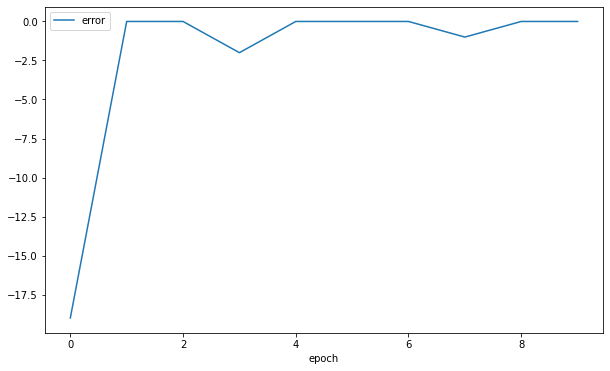

Neuronio 1


Taxa de Acerto: 0.9646017699115044
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Taxa de Acerto: 0.9823008849557522
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


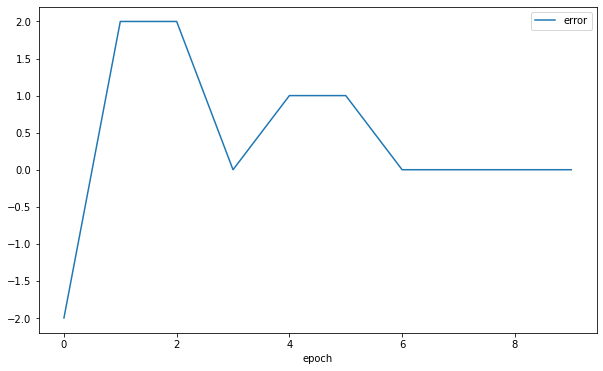

Taxa de Acerto: 0.9734513274336283
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 3
Start Grid Search k-fold: 5
Neuronio 0


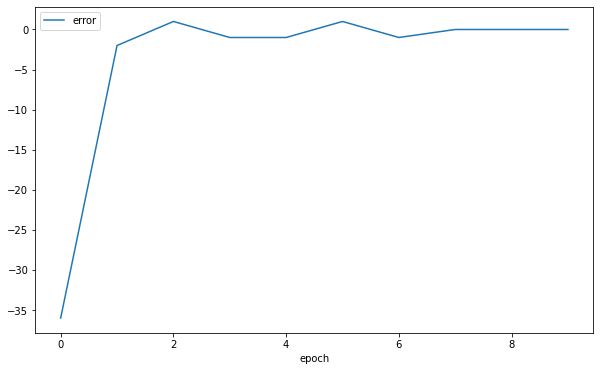

Neuronio 1


Taxa de Acerto: 0.9557522123893806
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 4
Start Grid Search k-fold: 5
Neuronio 0


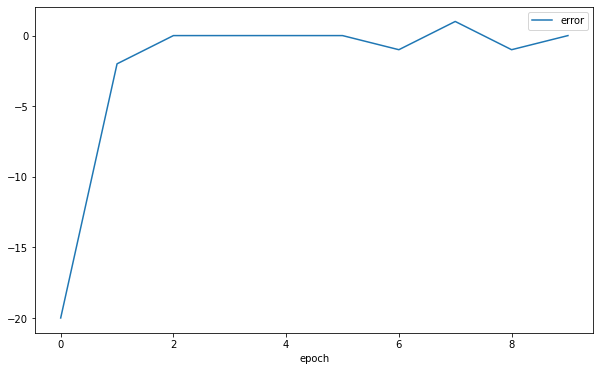

Neuronio 1


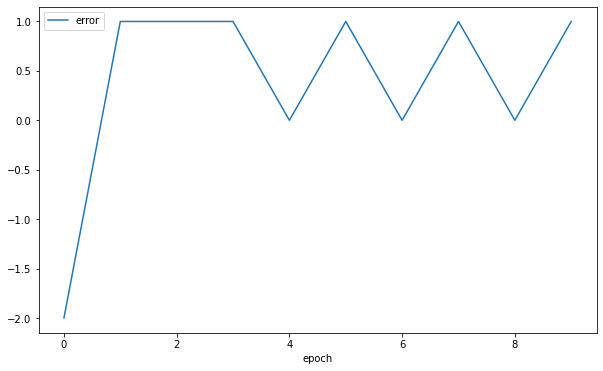

Taxa de Acerto: 0.9734513274336283
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 5
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


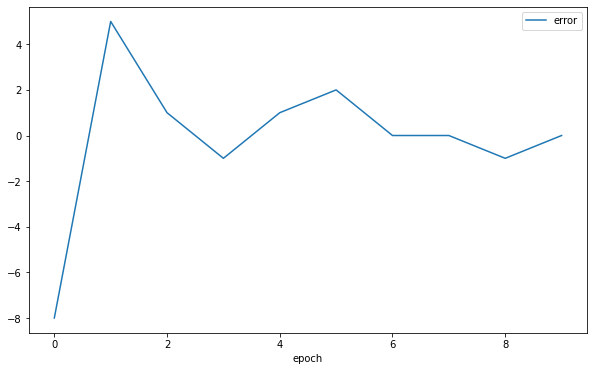

Taxa de Acerto: 0.9734513274336283
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 6
Start Grid Search k-fold: 5
Neuronio 0


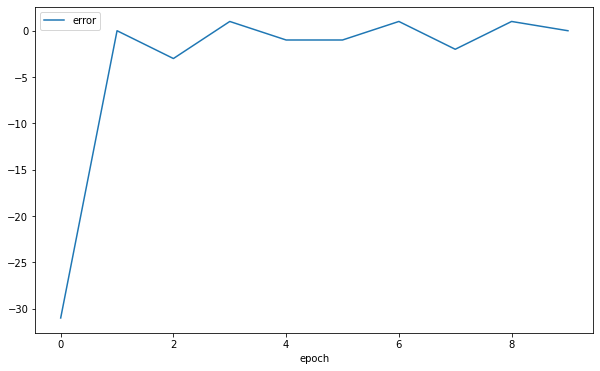

Neuronio 1


Taxa de Acerto: 0.9823008849557522
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 7
Start Grid Search k-fold: 5
Neuronio 0


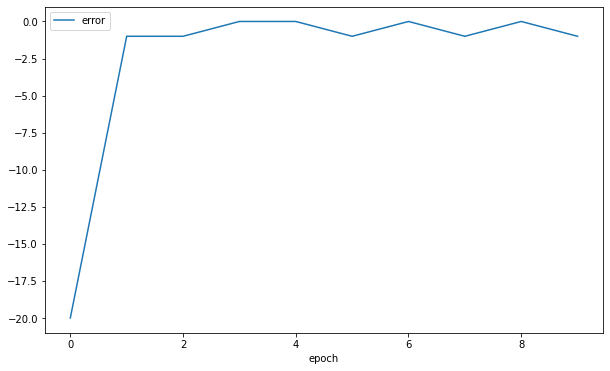

Neuronio 1


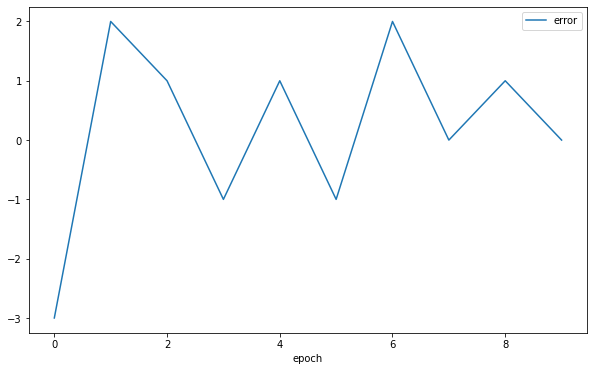

Taxa de Acerto: 0.9734513274336283
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 8
Start Grid Search k-fold: 5
Neuronio 0


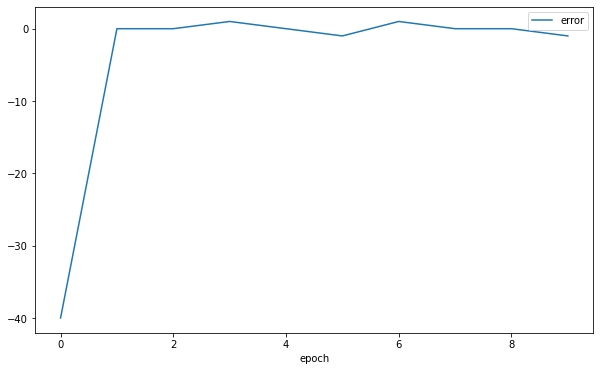

Neuronio 1


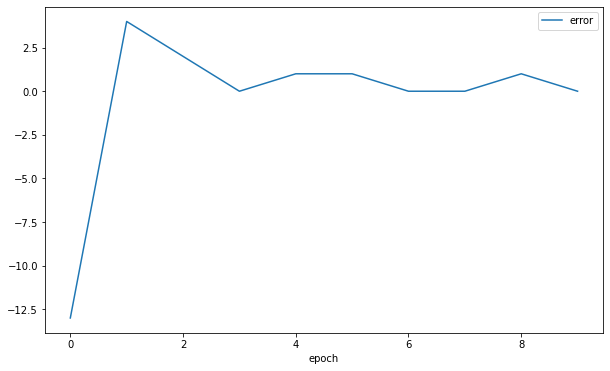

Taxa de Acerto: 0.9734513274336283
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 9
Start Grid Search k-fold: 5
Neuronio 0


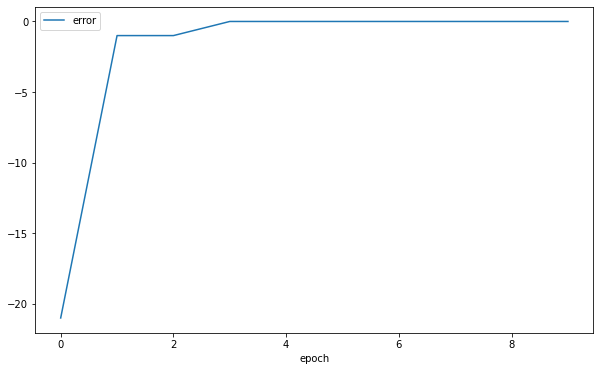

Neuronio 1


Taxa de Acerto: 0.8849557522123894
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 10
Start Grid Search k-fold: 5
Neuronio 0


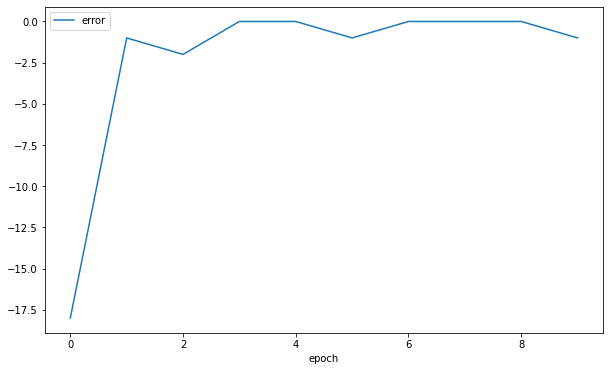

Neuronio 1


Taxa de Acerto: 0.9646017699115044
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 11
Start Grid Search k-fold: 5
Neuronio 0


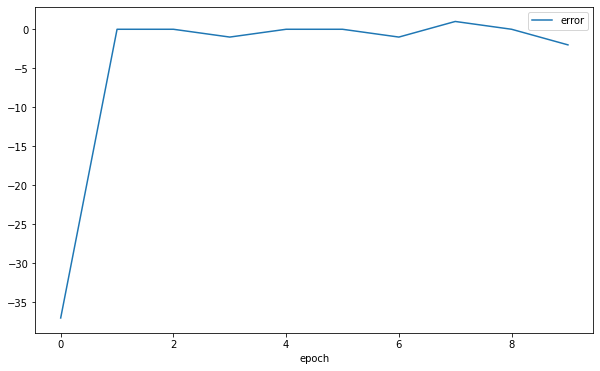

Neuronio 1


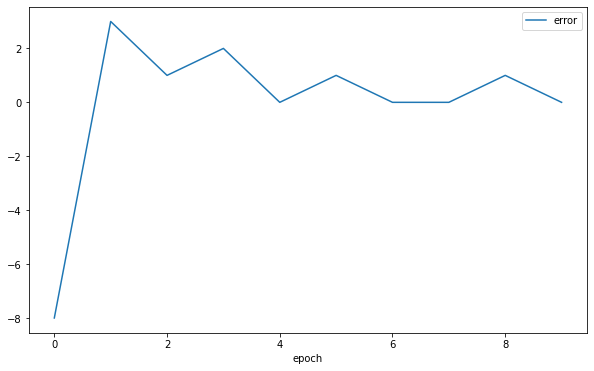

Taxa de Acerto: 0.9646017699115044
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 12
Start Grid Search k-fold: 5
Neuronio 0


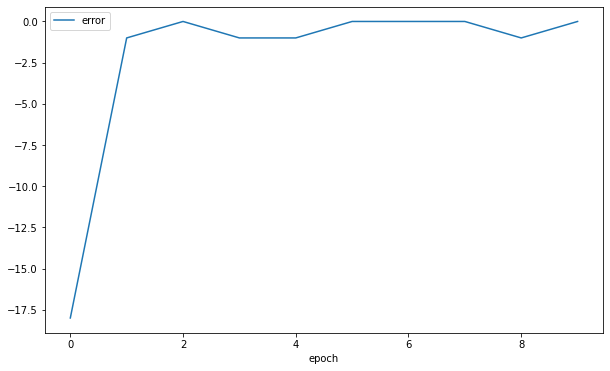

Neuronio 1


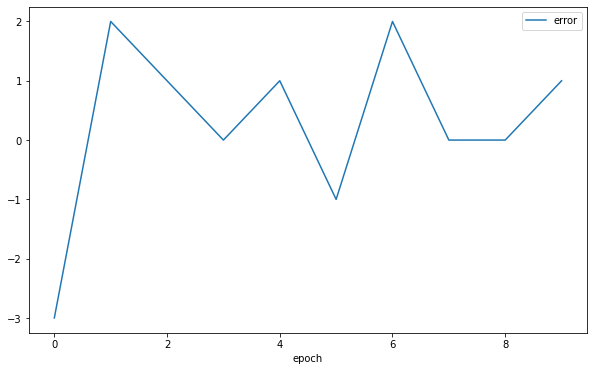

Taxa de Acerto: 0.9823008849557522
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 13
Start Grid Search k-fold: 5
Neuronio 0


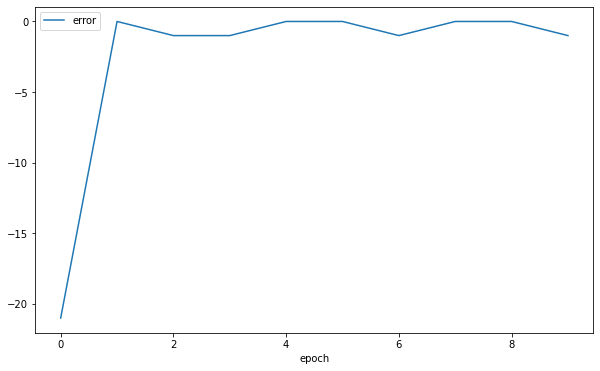

Neuronio 1


Taxa de Acerto: 0.9557522123893806
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 14
Start Grid Search k-fold: 5
Neuronio 0


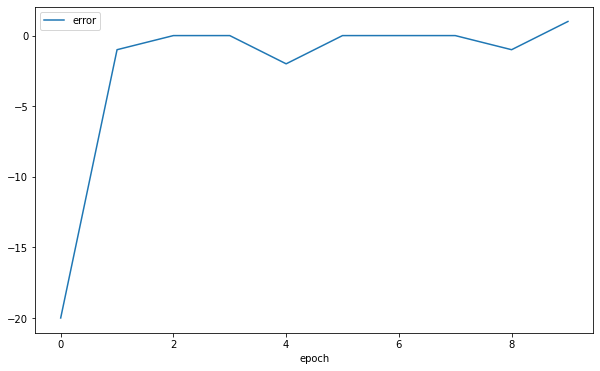

Neuronio 1


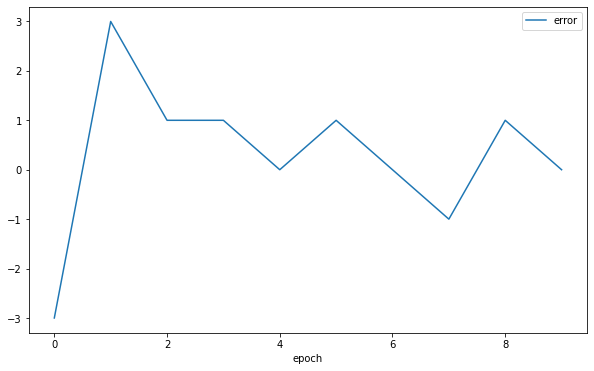

Taxa de Acerto: 0.9380530973451328
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 15
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


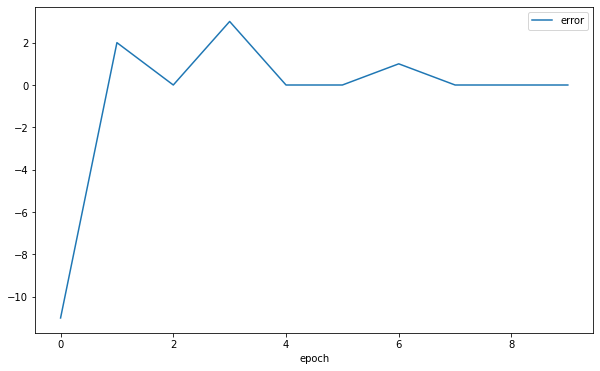

Taxa de Acerto: 0.9646017699115044
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 16
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


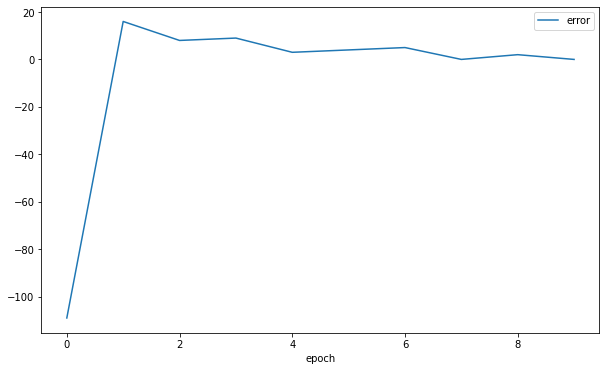

Taxa de Acerto: 0.9734513274336283
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 17
Start Grid Search k-fold: 5
Neuronio 0


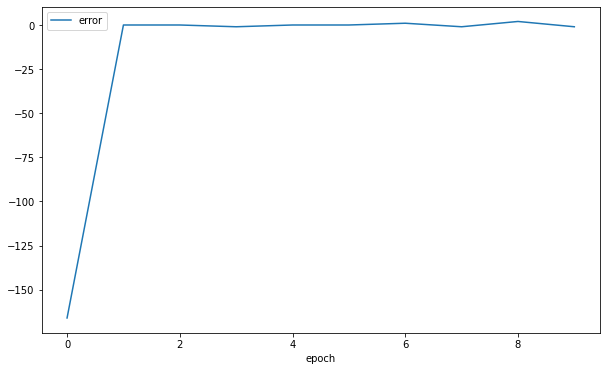

Neuronio 1


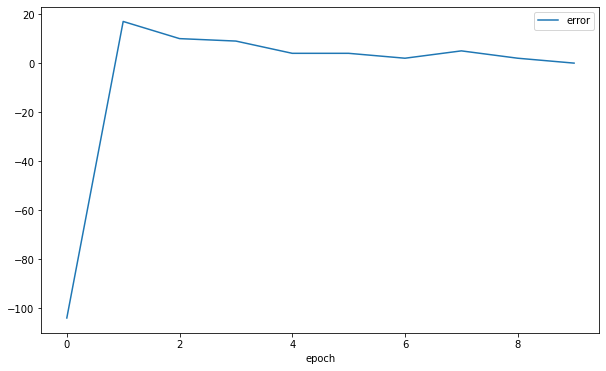

Taxa de Acerto: 0.9734513274336283
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 18
Start Grid Search k-fold: 5
Neuronio 0


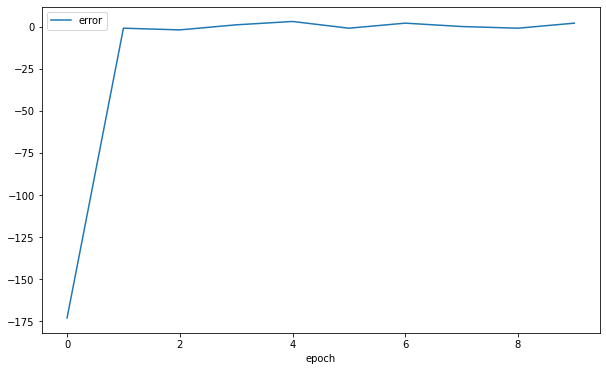

Neuronio 1


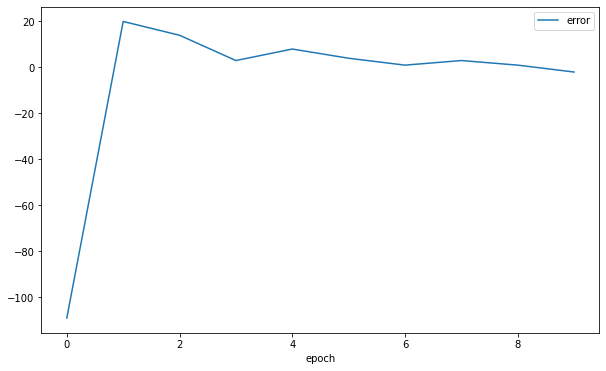

Taxa de Acerto: 0.9026548672566371
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 19
Start Grid Search k-fold: 5
Neuronio 0


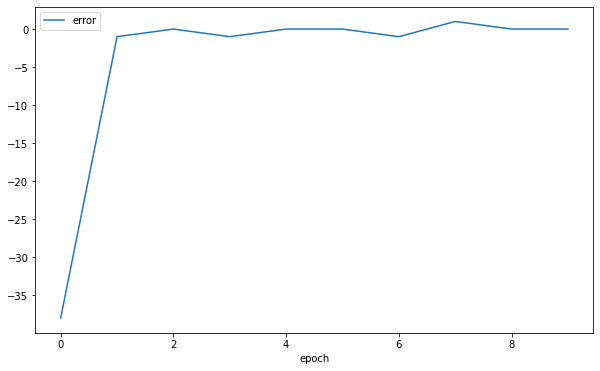

Neuronio 1


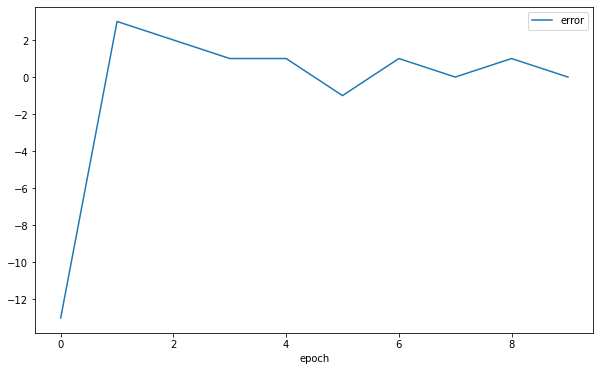

Taxa de Acerto: 0.9734513274336283
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
pipe = pipelineClassifier.make_pipeline(n_realizations = 20, task='multiclass_classification')

acc_artificial_ca, desvio_padrao_artificial_ca, realization_select_artificial_ca, dict_realizations_artificial_ca = pipe.run_realizations(
    
    df=df_cancer, 
    k_fold=5, 
    param_grid={'learning_rate': [0.1, 0.01, 0.05]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    n_epochs=10,
    normalize=True
)

In [ ]:
best_perceptron_artificial_ca = realization_select_artificial_ca['classifier']
best_train_data_ca = realization_select_artificial_ca['train_data']
best_train_data_ca = realization_select_artificial_ca['test_data']
taxa_acerto_ca = realization_select_artificial_ca['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_ca}\nDesvio Padrao: {desvio_padrao_artificial_ca}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_ca}')

Artificial
Acurácia: 0.9615044247787612
Desvio Padrao: 0.025563945277522895

- Info best model
Taxa Acerto: 0.9646017699115044


# Dermatologia

In [3]:
list_col_names = [
      'erythema',
      'scaling',
      'definite borders',
      'itching',
      'koebner phenomenon',
      'polygonal papules',
      'follicular papules',
      'oral mucosal involvement',
      'knee and elbow involvement',
     'scalp involvement',
     'family history',
     'melanin incontinence',
     'eosinophils in the infiltrate',
     'PNL infiltrate',
     'fibrosis of the papillary dermis',
     'exocytosis',
     'acanthosis',
     'hyperkeratosis',
     'parakeratosis',
     'clubbing of the rete ridges',
     'elongation of the rete ridges',
     'thinning of the suprapapillary epidermis',
     'spongiform pustule',
     'munro microabcess',
     'focal hypergranulosis',
     'disappearance of the granular layer',
     'vacuolisation and damage of basal layer',
     'spongiosis',
     'saw-tooth appearance of retes',
     'follicular horn plug',
     'perifollicular parakeratosis',
     'inflammatory monoluclear inflitrate',
     'band-like infiltrate',
     'age', 
     'target']

df_dermatology = pd.read_csv('./datasets/dermatology/dermatology.data', names = list_col_names)
df_dermatology['age'] =  pd.to_numeric(df_dermatology['age'], downcast='integer', errors='coerce')

df_dermatology['target'] = df_dermatology['target'].apply(lambda y: (y - 1)) # Formatando a variável resposta para começar do 0

df_dermatology = df_dermatology.fillna(df_dermatology.mean()).astype('int32') # Preenchendo valores null com média

In [4]:
df_dermatology.head(3)

erythema  scaling  definite borders  ...  band-like infiltrate  age  target
0         2        2                 0  ...                     0   55       1
1         3        3                 3  ...                     0    8       0
2         2        1                 2  ...                     3   26       2

[3 rows x 35 columns]

In [13]:
df_dermatology['target'].value_counts()

0    112
2     72
1     61
4     52
3     49
5     20
Name: target, dtype: int64

#### Usando todas as features




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


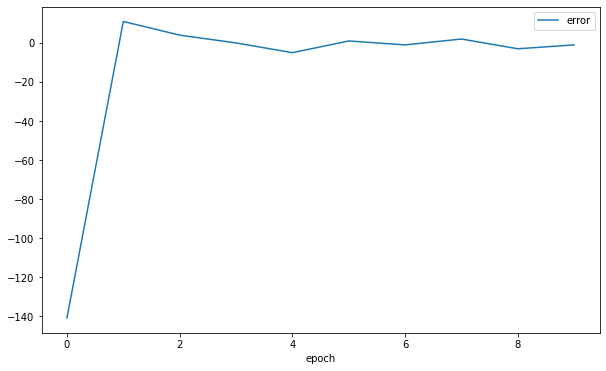

Neuronio 2


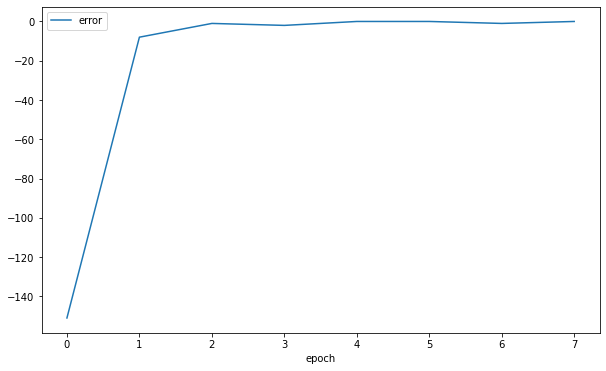

Neuronio 3


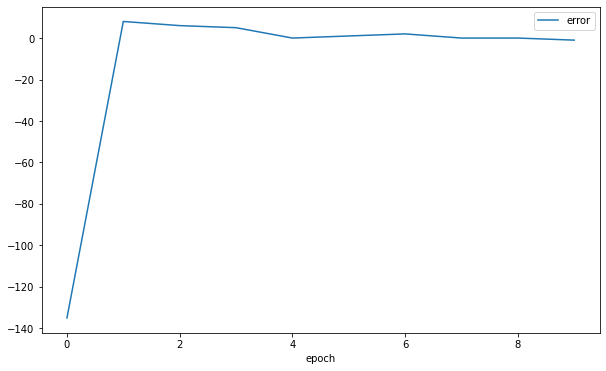

Neuronio 4


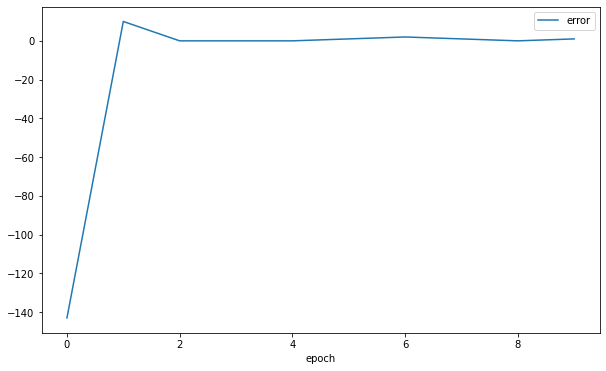

Neuronio 5


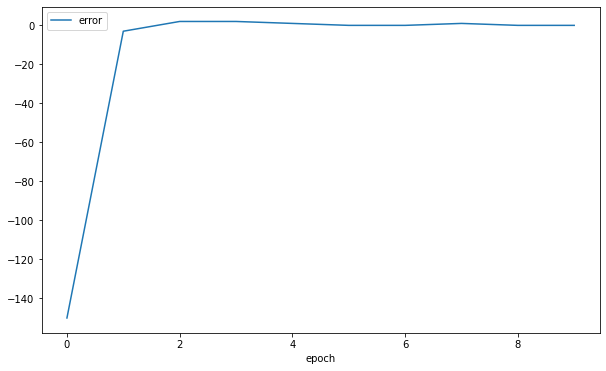

Taxa de Acerto: 0.9583333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Neuronio 0


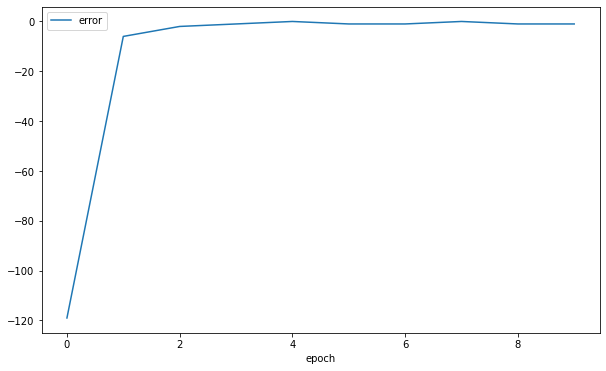

Neuronio 1


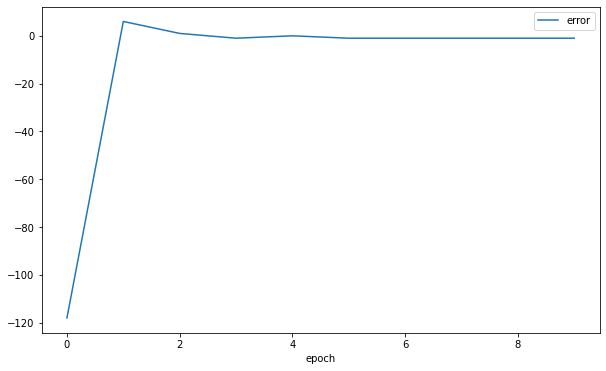

Neuronio 2


Neuronio 3


Neuronio 4


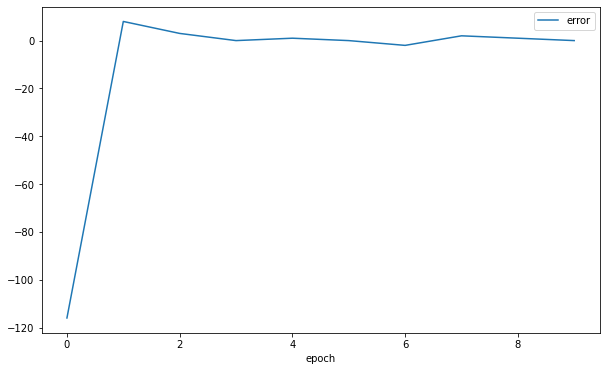

Neuronio 5


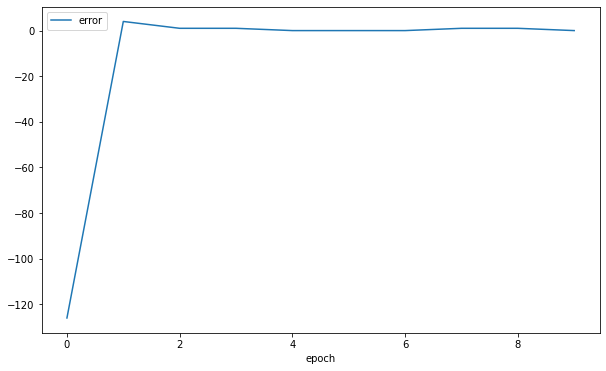

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Neuronio 0


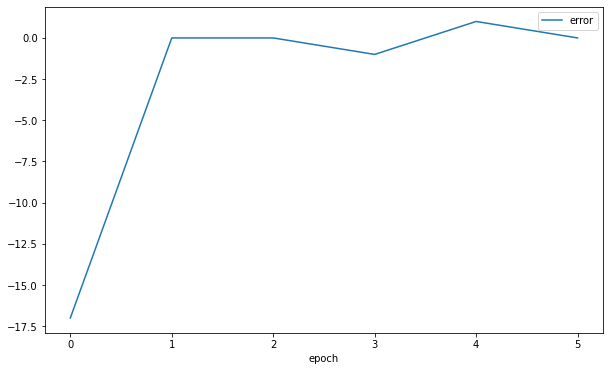

Neuronio 1


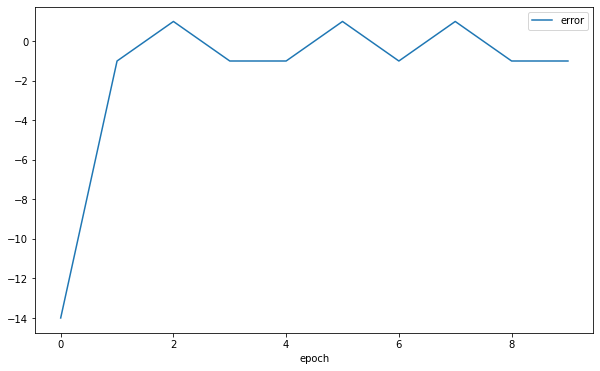

Neuronio 2


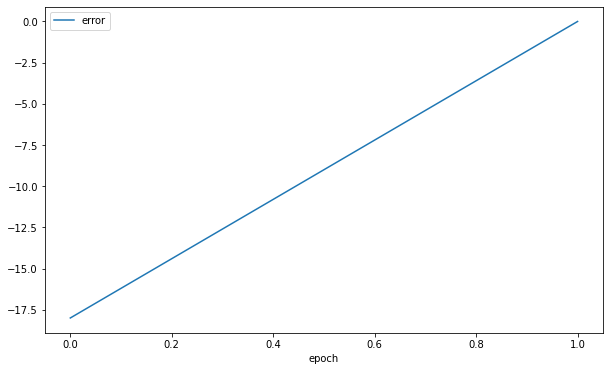

Neuronio 3


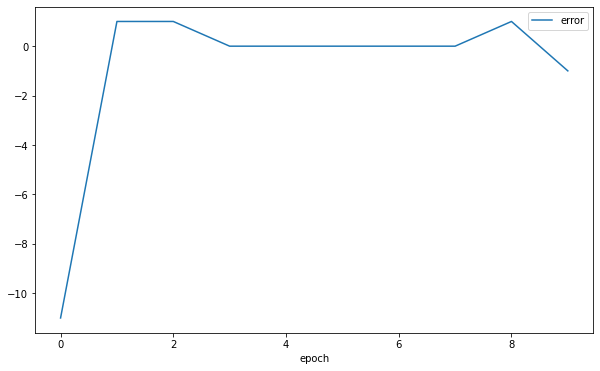

Neuronio 4


Neuronio 5


Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 3
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


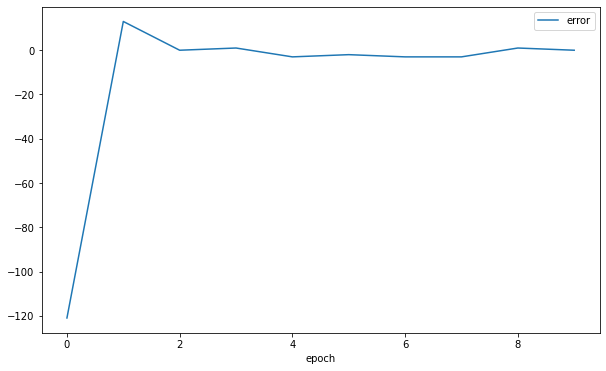

Neuronio 2


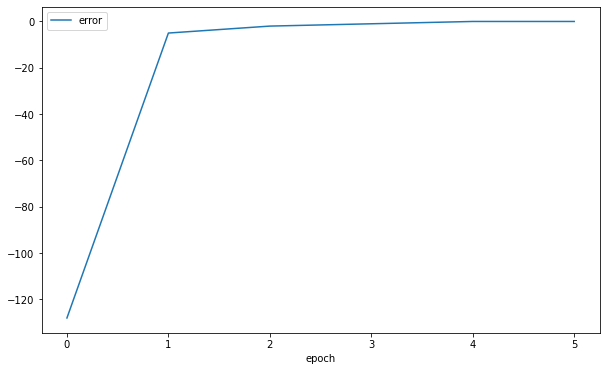

Neuronio 3


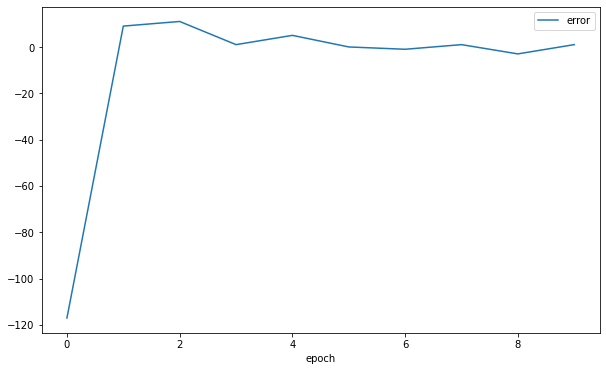

Neuronio 4


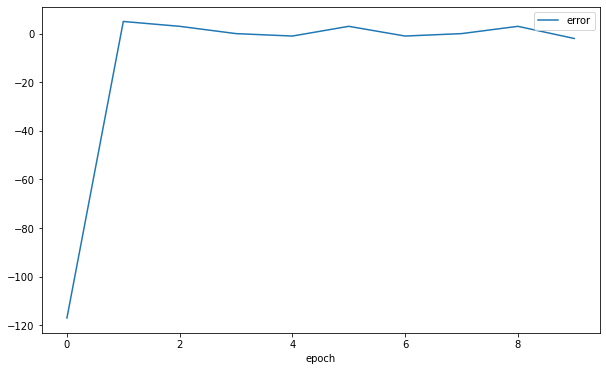

Neuronio 5


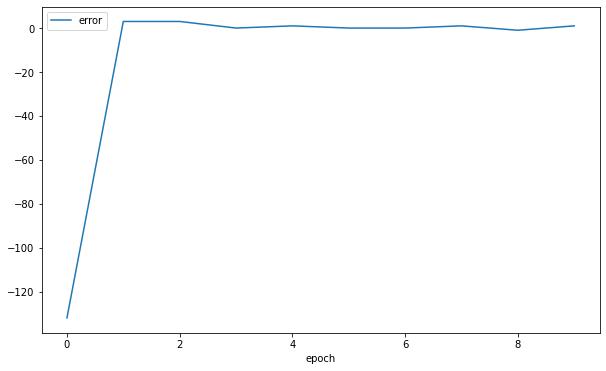

Taxa de Acerto: 0.9722222222222222
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 4
Start Grid Search k-fold: 5
Neuronio 0


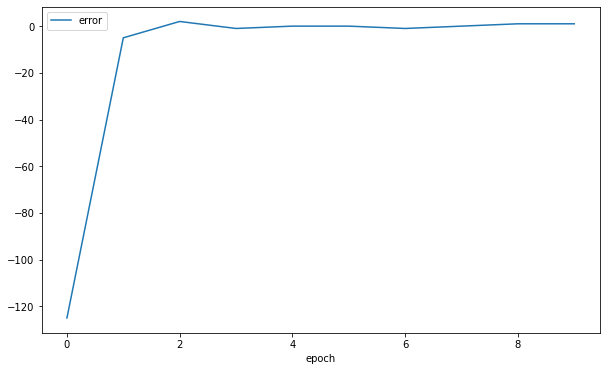

Neuronio 1


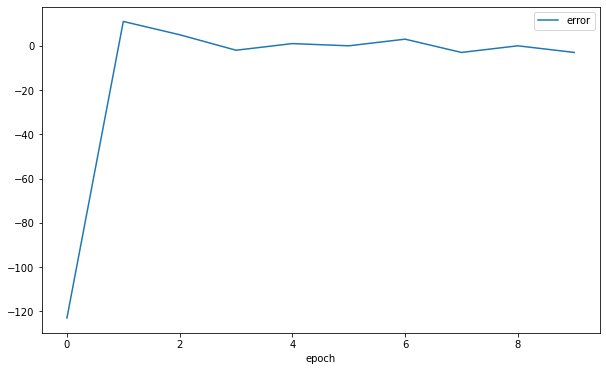

Neuronio 2


Neuronio 3


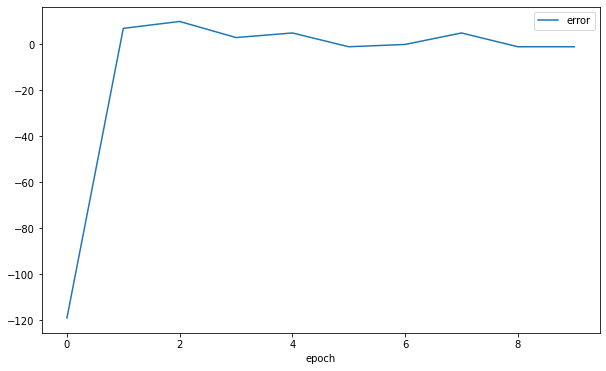

Neuronio 4


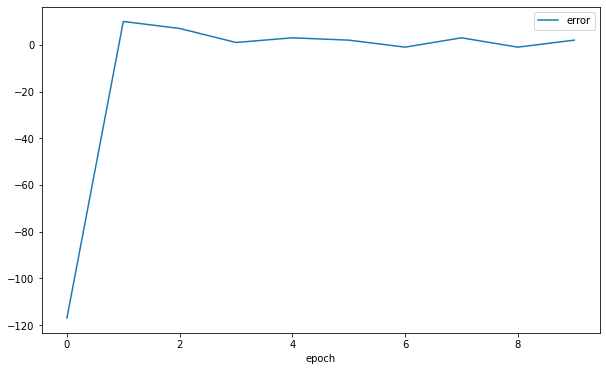

Neuronio 5


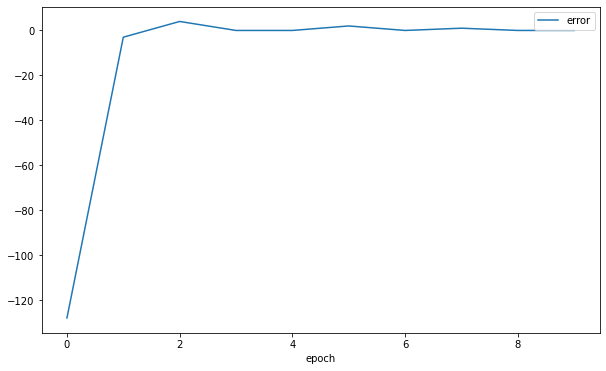

Taxa de Acerto: 0.9861111111111112
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 5
Start Grid Search k-fold: 5
Neuronio 0


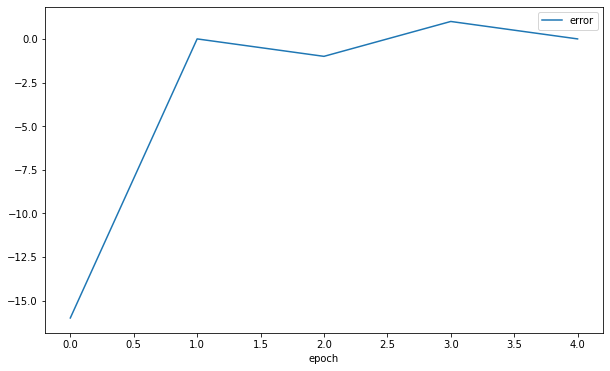

Neuronio 1


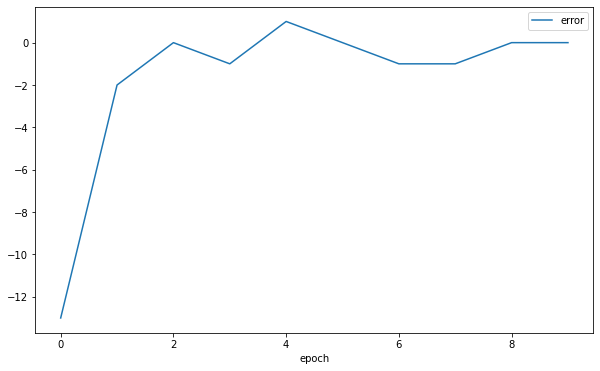

Neuronio 2


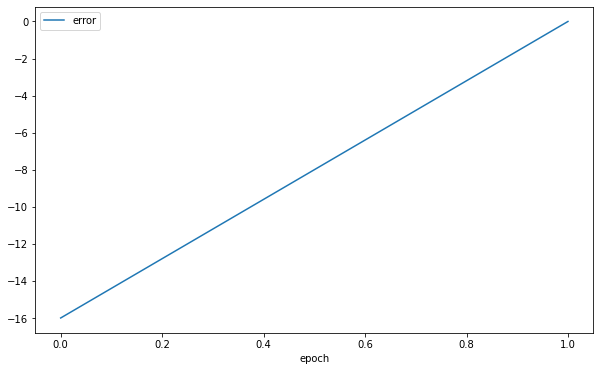

Neuronio 3


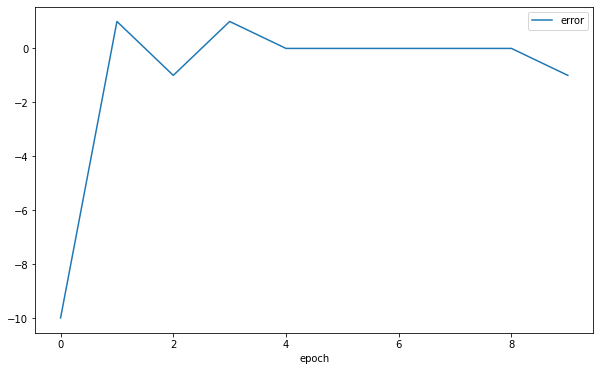

Neuronio 4


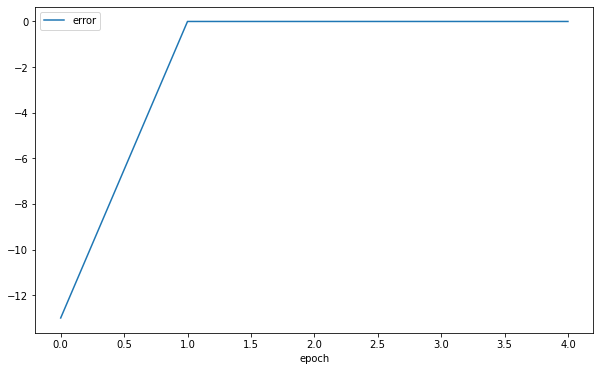

Neuronio 5


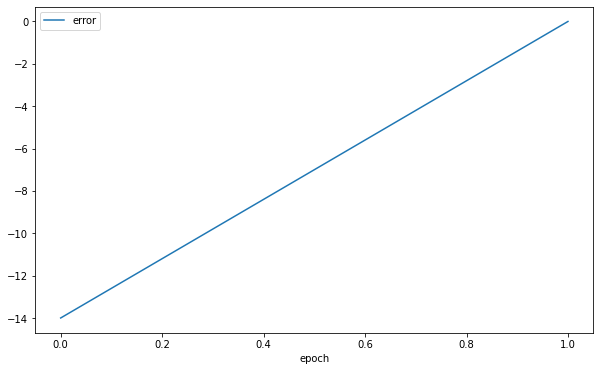

Taxa de Acerto: 0.9583333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 6
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


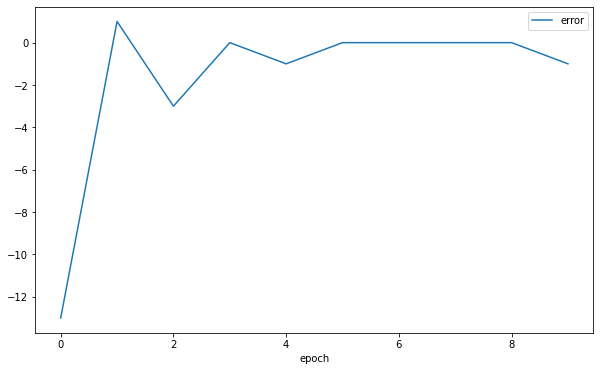

Neuronio 2


Neuronio 3


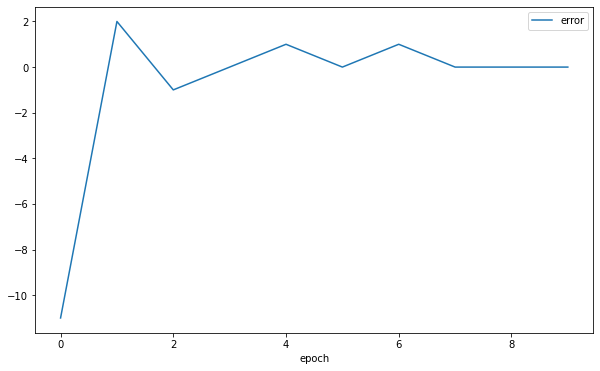

Neuronio 4


Neuronio 5


Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 7
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


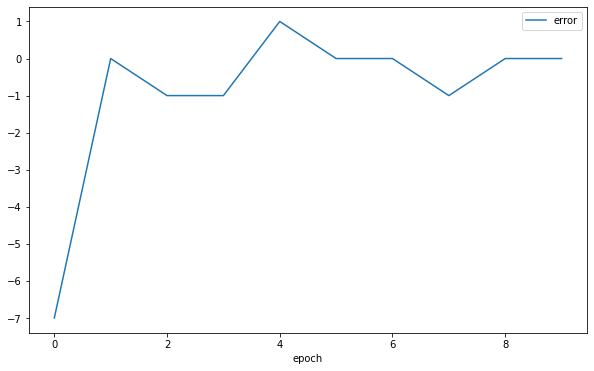

Neuronio 2


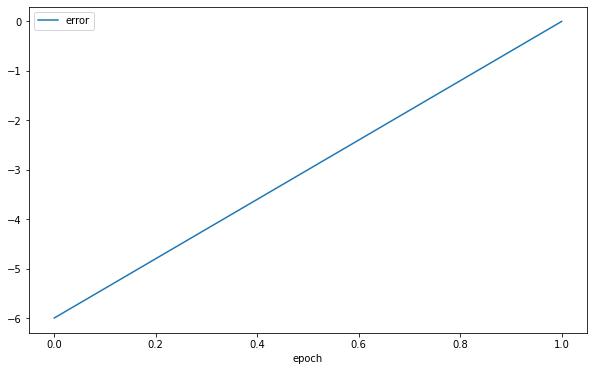

Neuronio 3


Neuronio 4


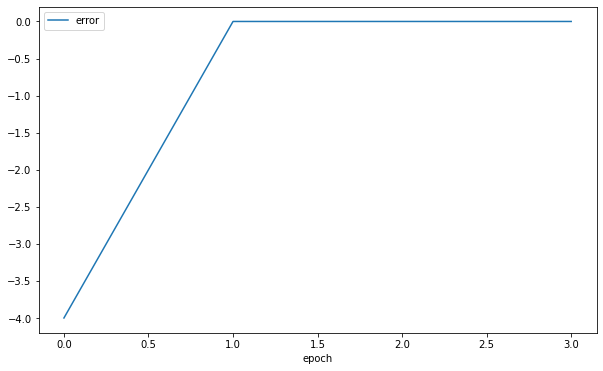

Neuronio 5


Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 8
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


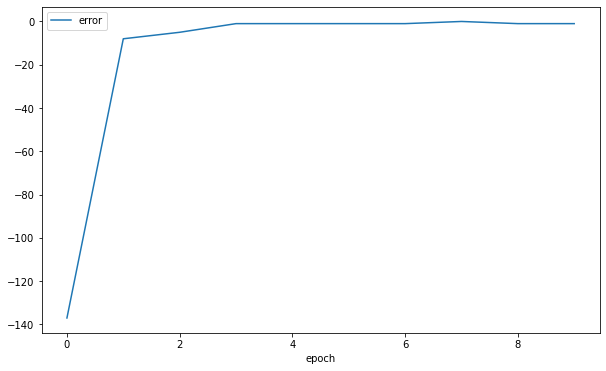

Neuronio 3


Neuronio 4


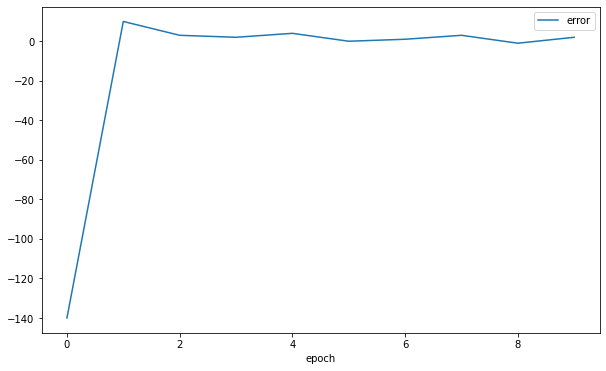

Neuronio 5


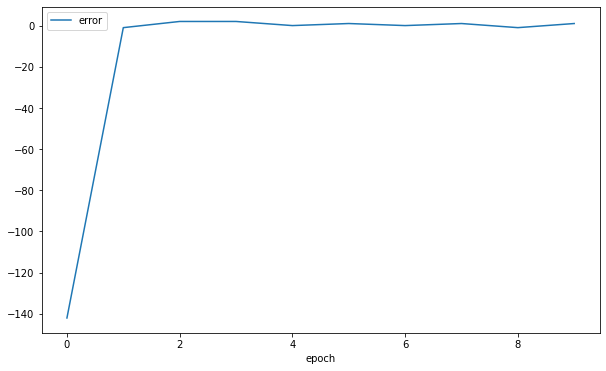

Taxa de Acerto: 0.9861111111111112
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 9
Start Grid Search k-fold: 5
Neuronio 0


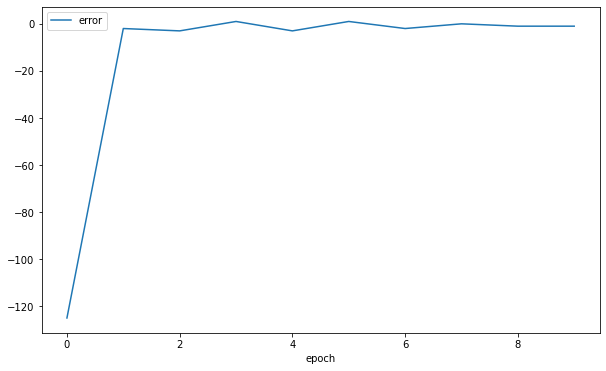

Neuronio 1


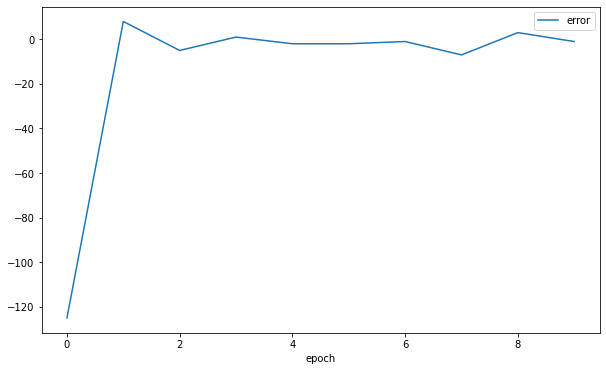

Neuronio 2


Neuronio 3


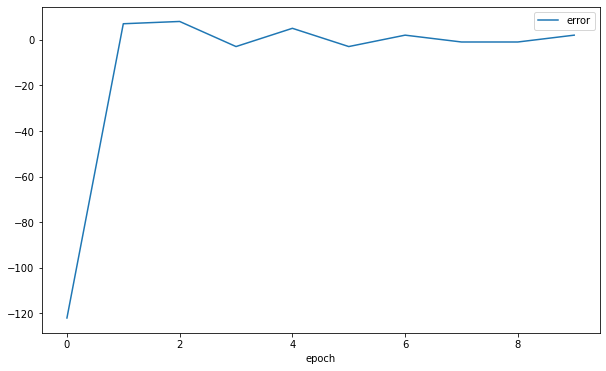

Neuronio 4


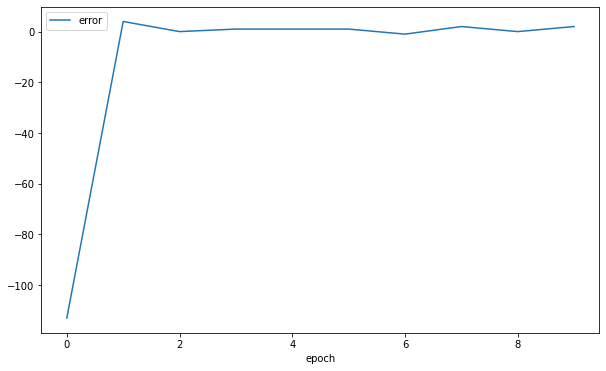

Neuronio 5


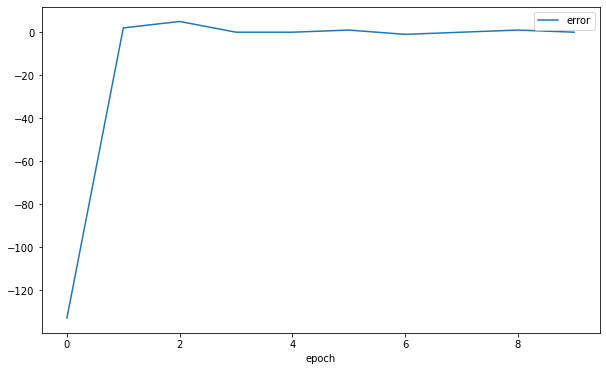

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 10
Start Grid Search k-fold: 5
Neuronio 0


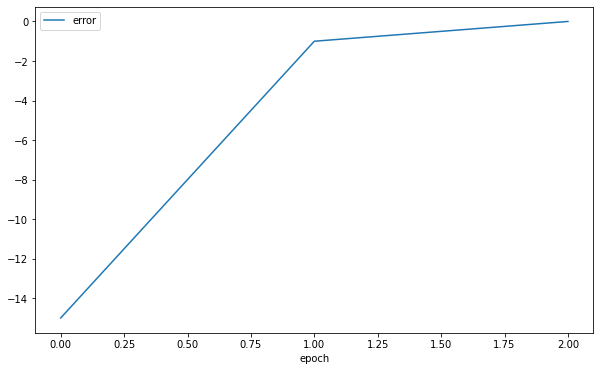

Neuronio 1


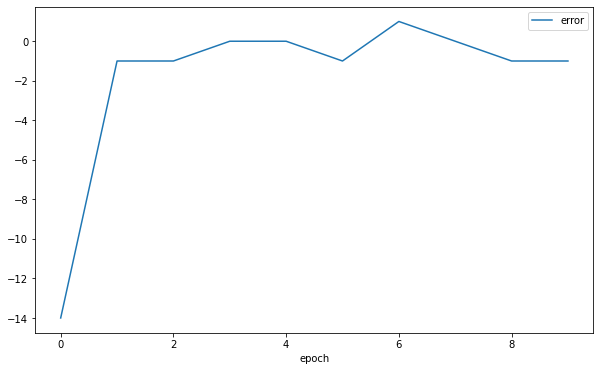

Neuronio 2


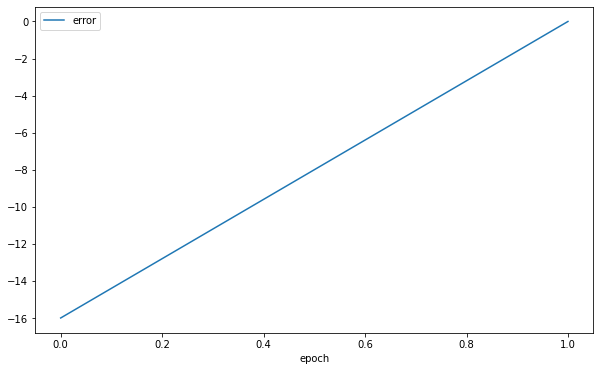

Neuronio 3


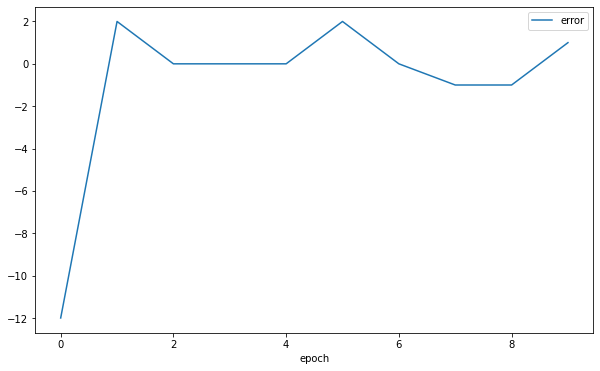

Neuronio 4


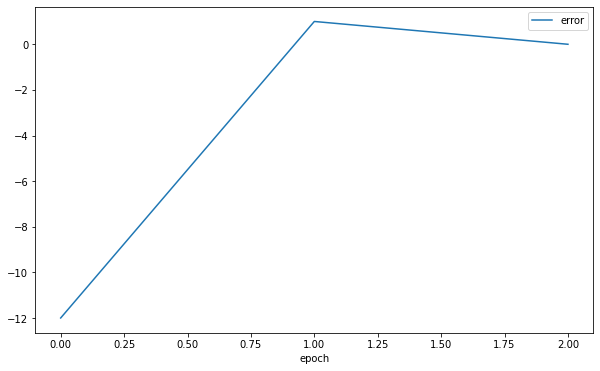

Neuronio 5


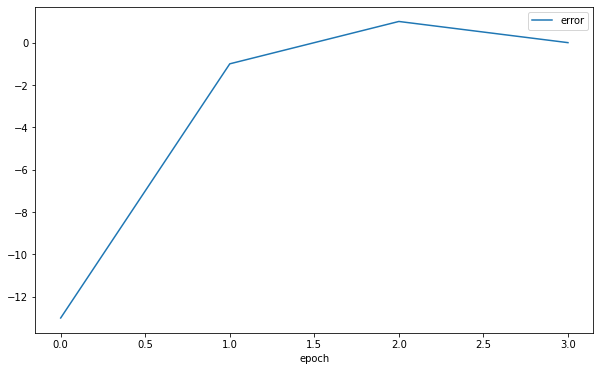

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 11
Start Grid Search k-fold: 5
Neuronio 0


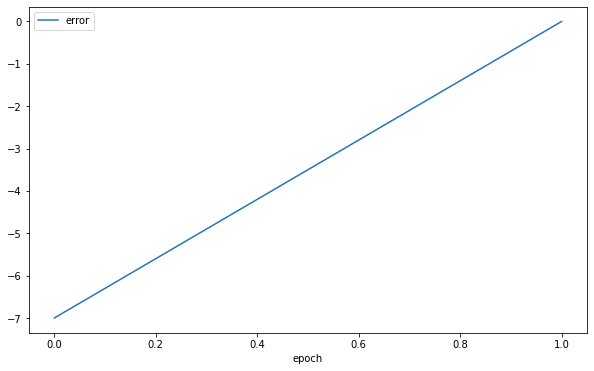

Neuronio 1


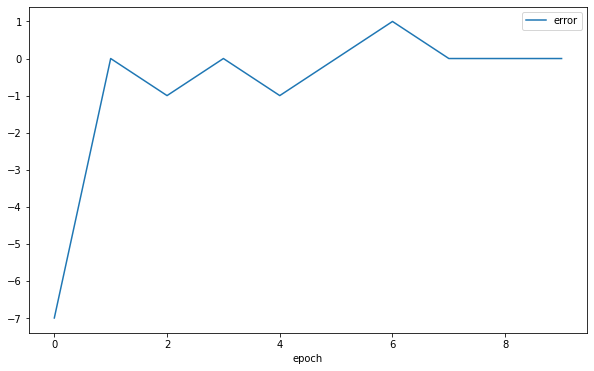

Neuronio 2


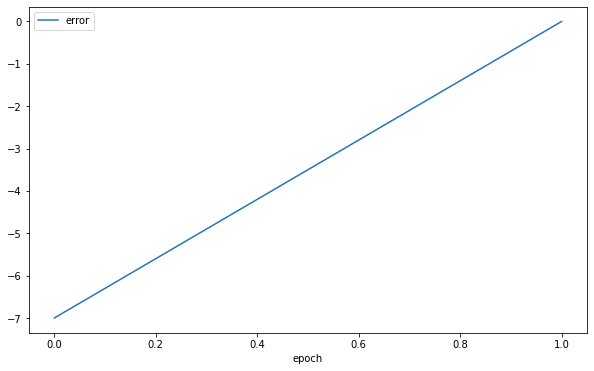

Neuronio 3


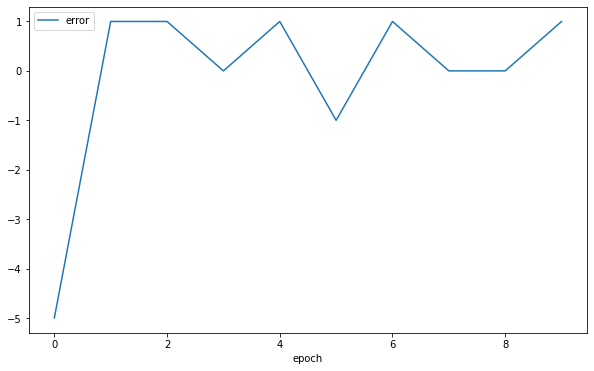

Neuronio 4


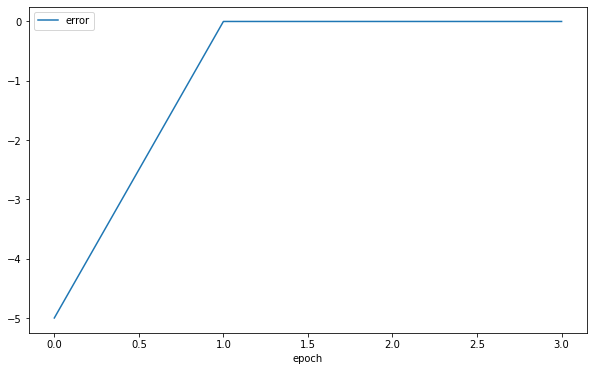

Neuronio 5


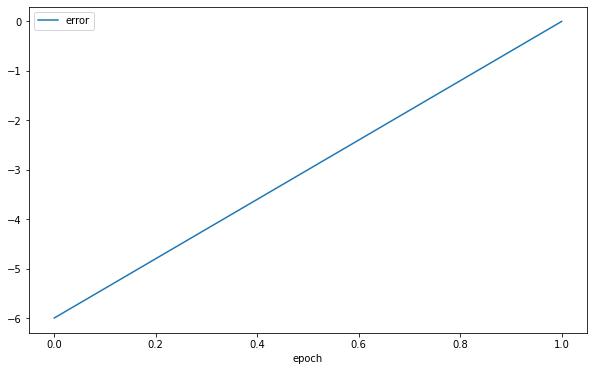

Taxa de Acerto: 0.9861111111111112
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 12
Start Grid Search k-fold: 5
Neuronio 0


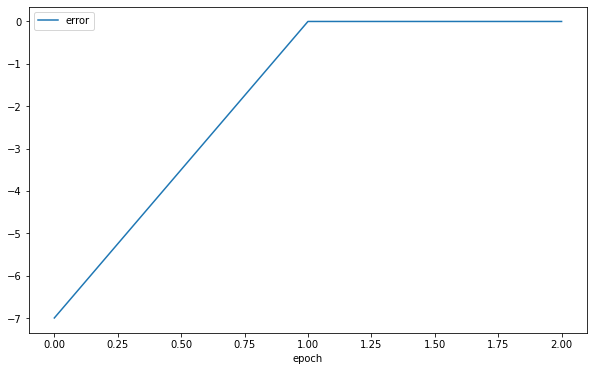

Neuronio 1


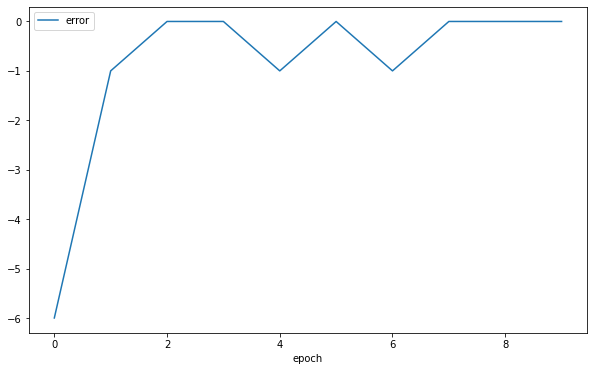

Neuronio 2


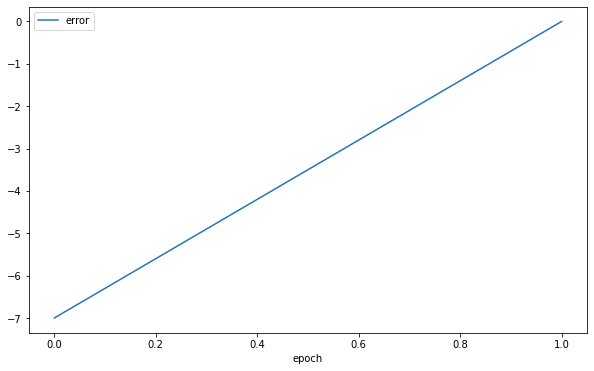

Neuronio 3


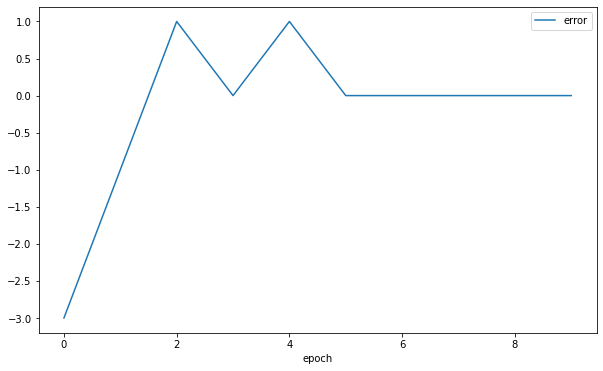

Neuronio 4


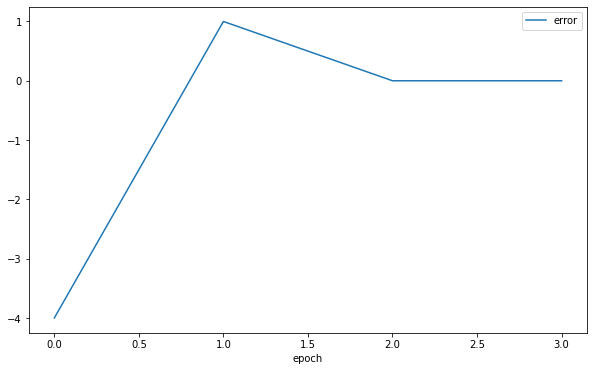

Neuronio 5


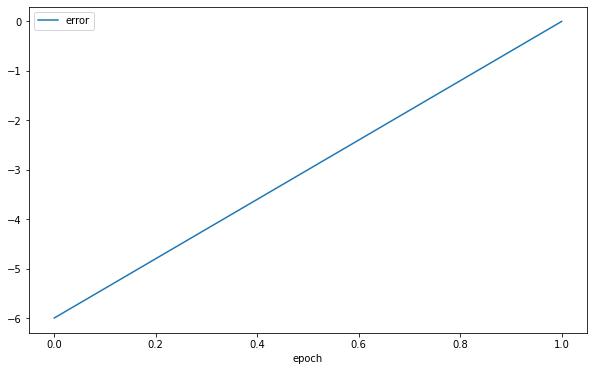

Taxa de Acerto: 0.9861111111111112
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 13
Start Grid Search k-fold: 5
Neuronio 0


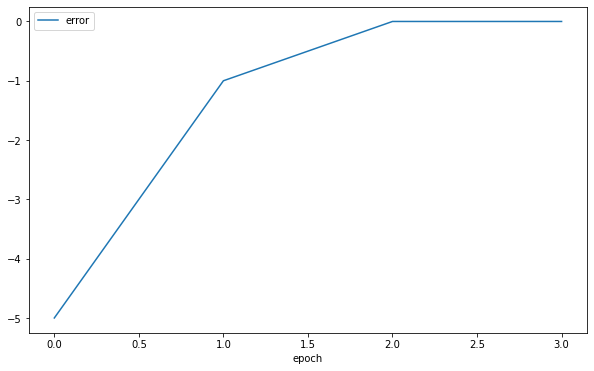

Neuronio 1


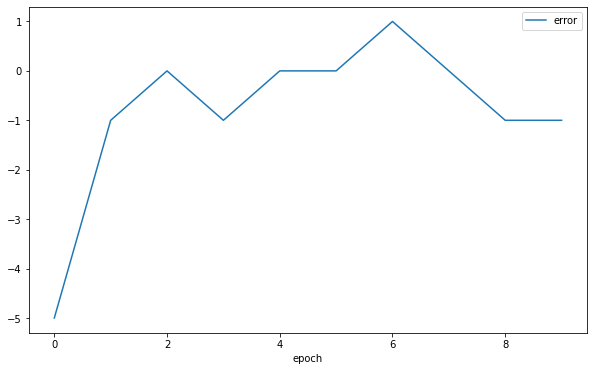

Neuronio 2


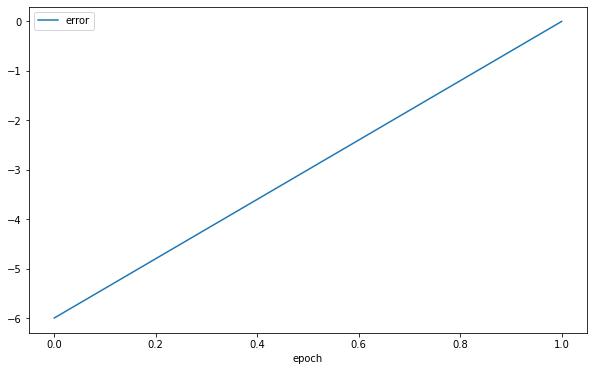

Neuronio 3


Neuronio 4


Neuronio 5


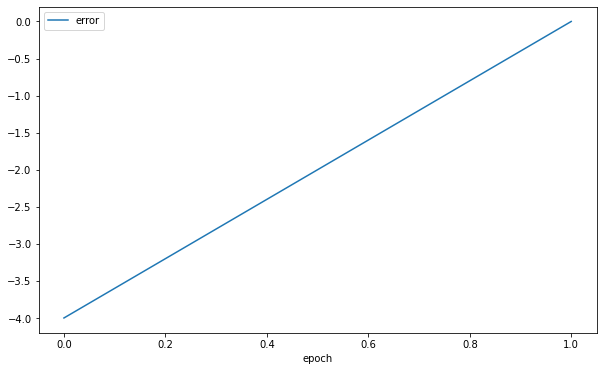

Taxa de Acerto: 0.9583333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 14
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


Neuronio 3


Neuronio 4


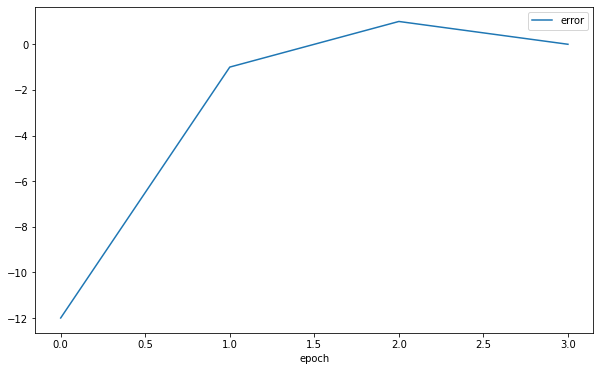

Neuronio 5


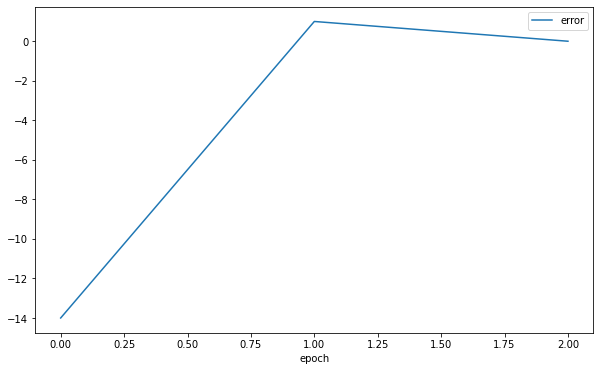

Taxa de Acerto: 0.9305555555555556
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 15
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


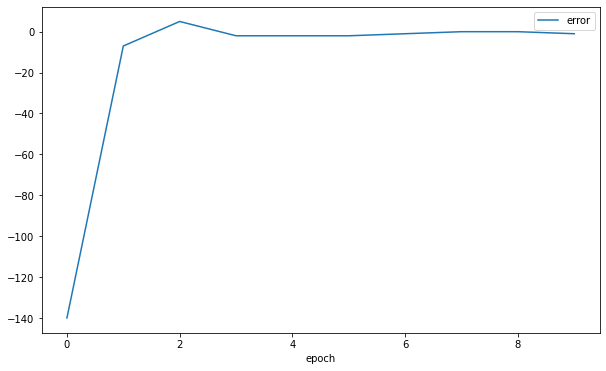

Neuronio 2


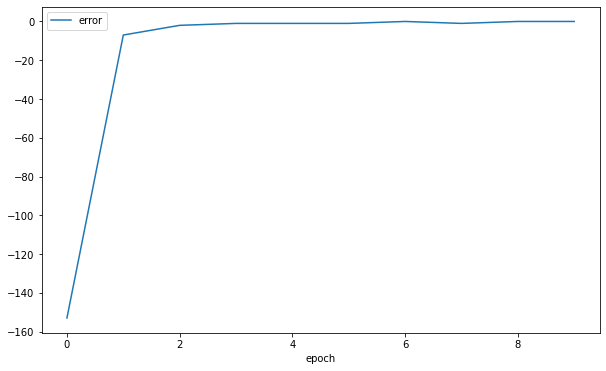

Neuronio 3


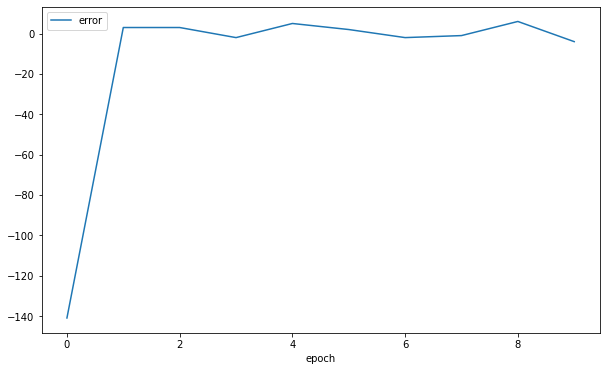

Neuronio 4


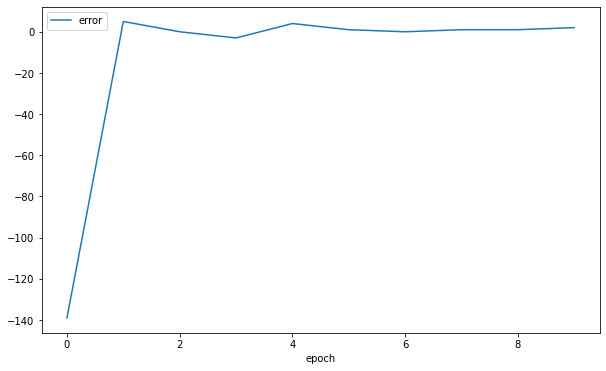

Neuronio 5


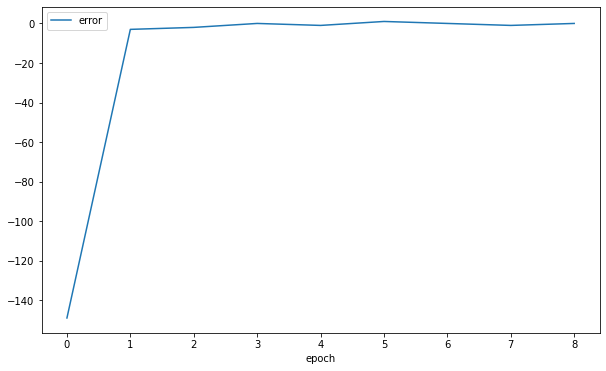

Taxa de Acerto: 0.9444444444444444
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 16
Start Grid Search k-fold: 5
Neuronio 0


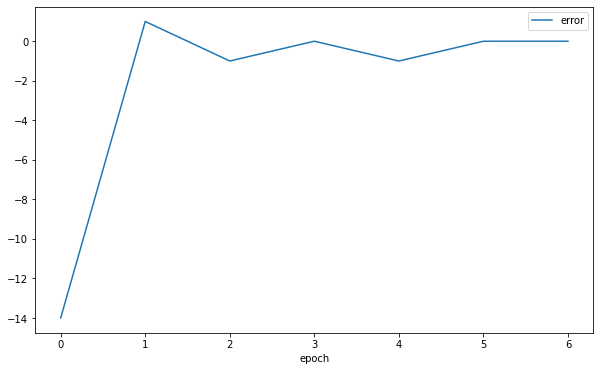

Neuronio 1


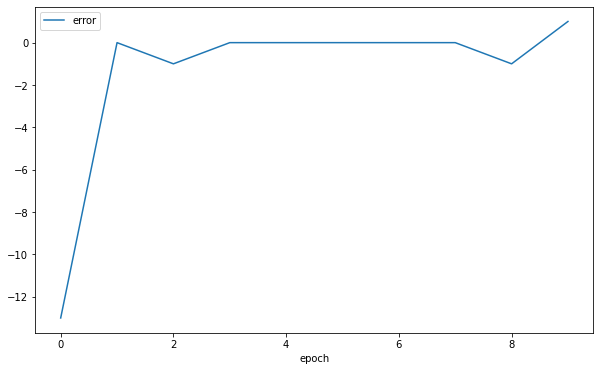

Neuronio 2


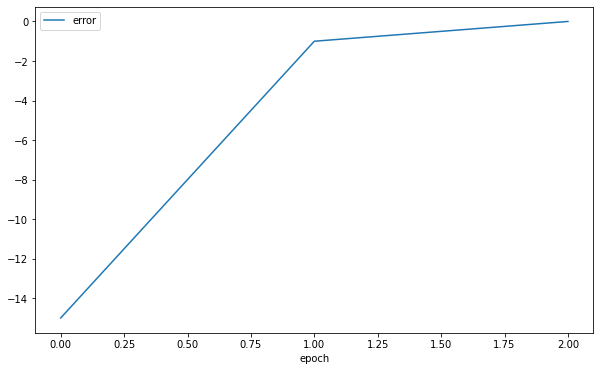

Neuronio 3


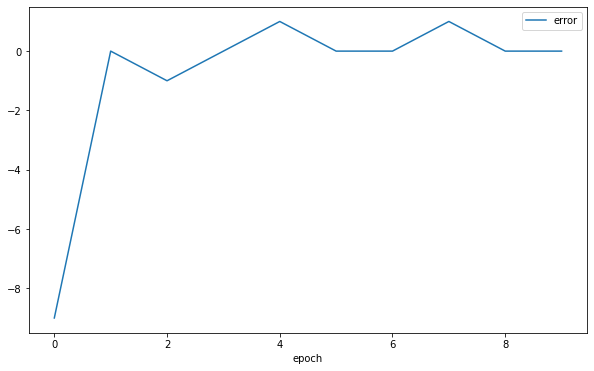

Neuronio 4


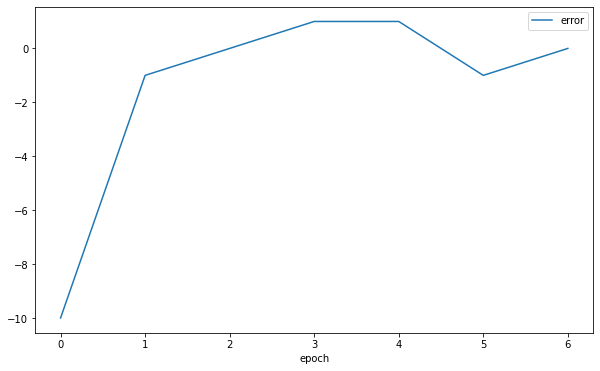

Neuronio 5


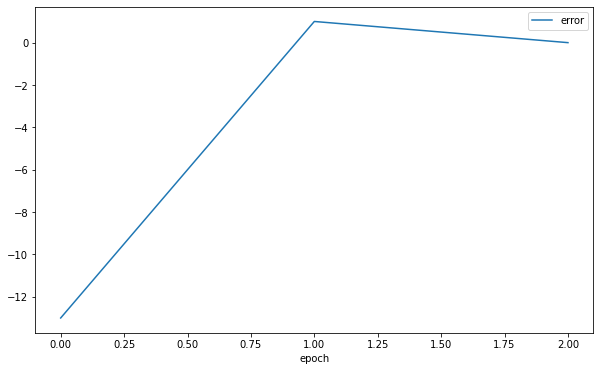

Taxa de Acerto: 0.9583333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 17
Start Grid Search k-fold: 5
Neuronio 0


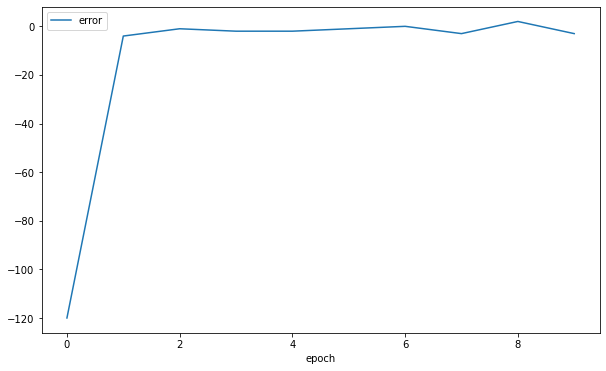

Neuronio 1


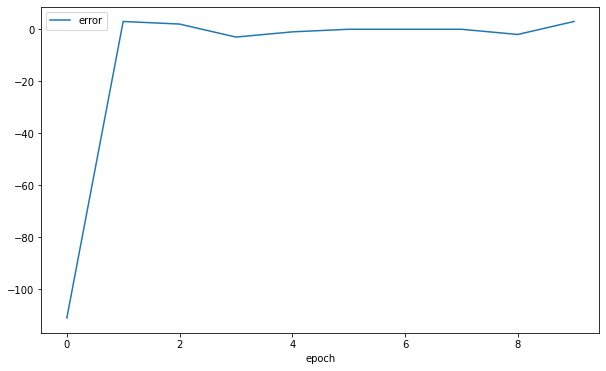

Neuronio 2


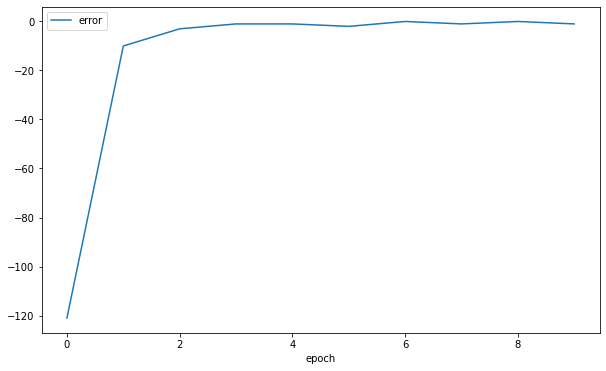

Neuronio 3


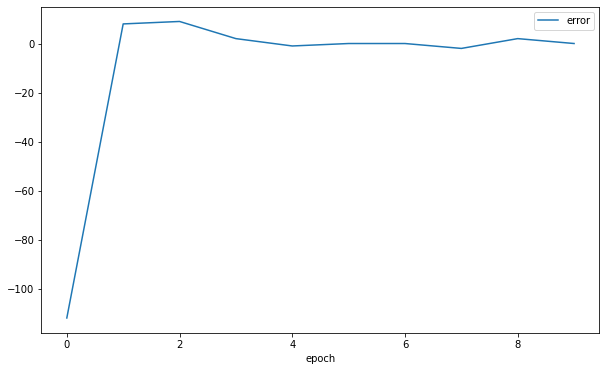

Neuronio 4


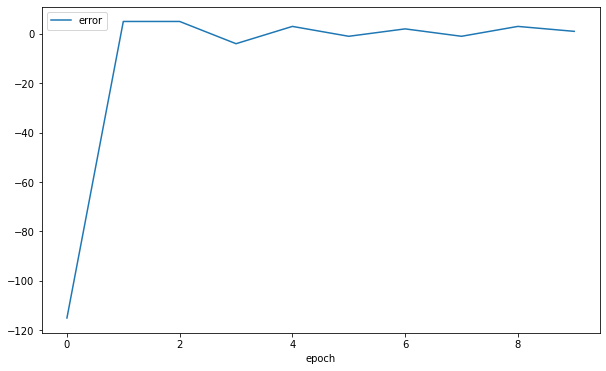

Neuronio 5


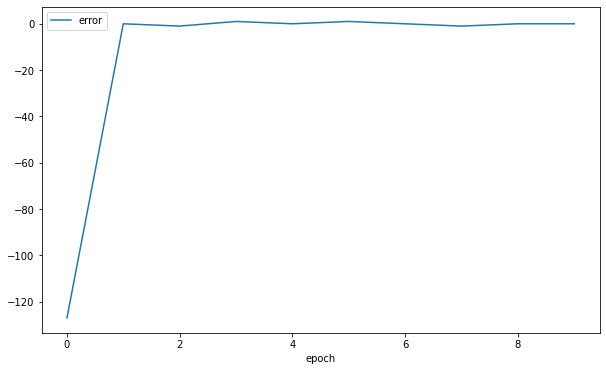

Taxa de Acerto: 0.9583333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 18
Start Grid Search k-fold: 5
Neuronio 0


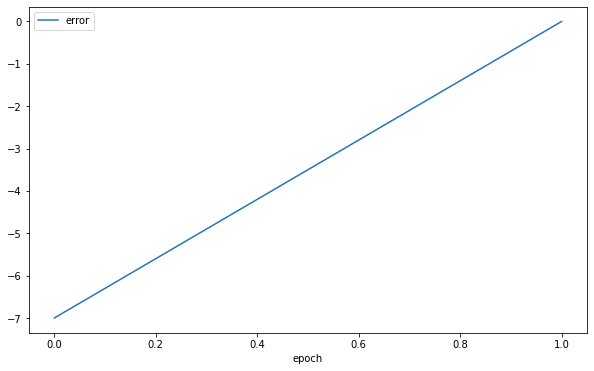

Neuronio 1


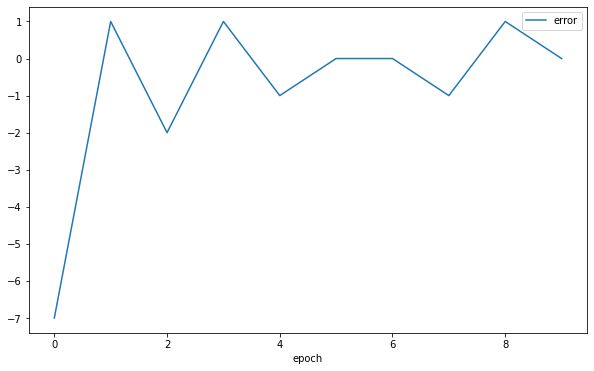

Neuronio 2


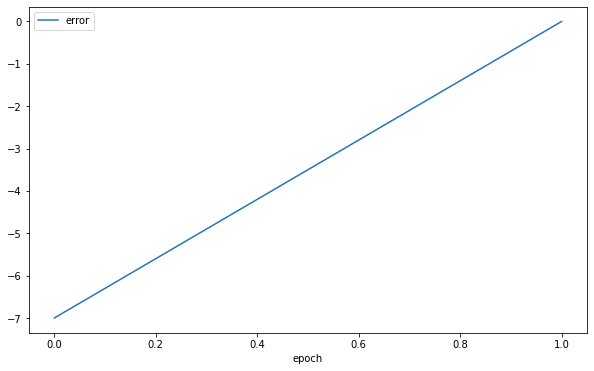

Neuronio 3


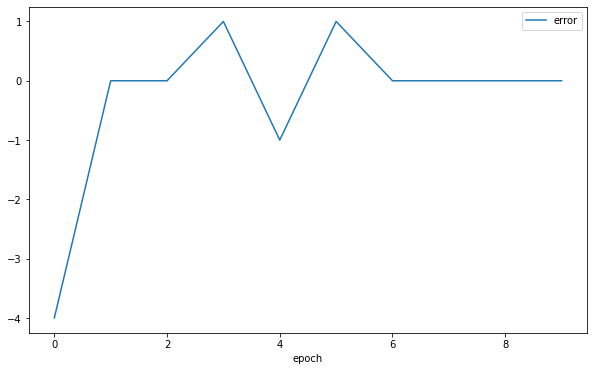

Neuronio 4


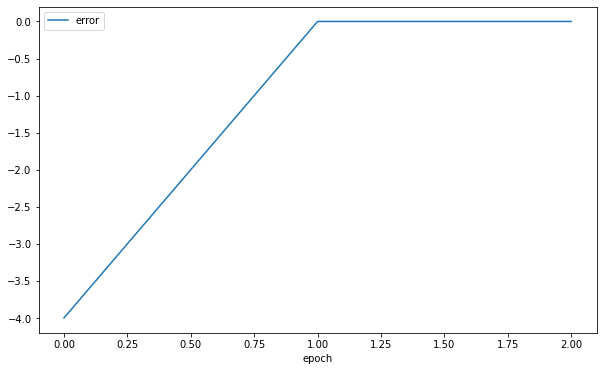

Neuronio 5


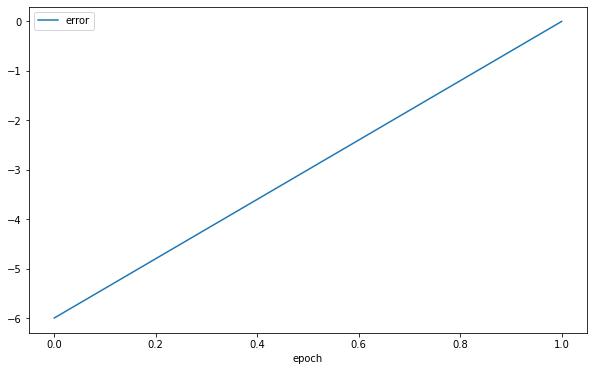

Taxa de Acerto: 0.9722222222222222
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 19
Start Grid Search k-fold: 5
Neuronio 0


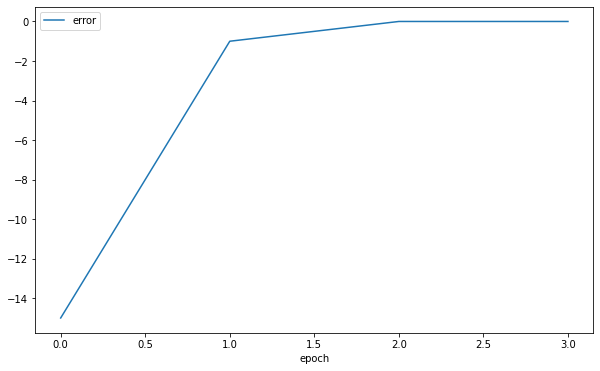

Neuronio 1


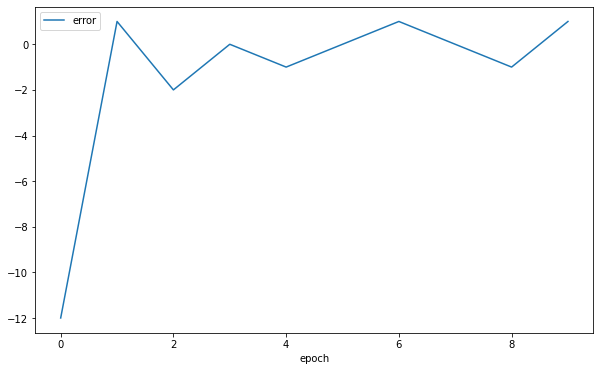

Neuronio 2


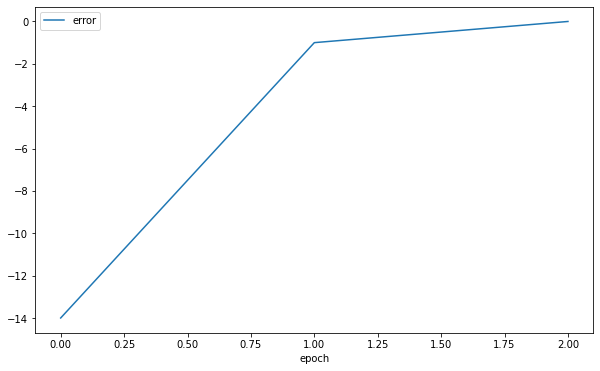

Neuronio 3


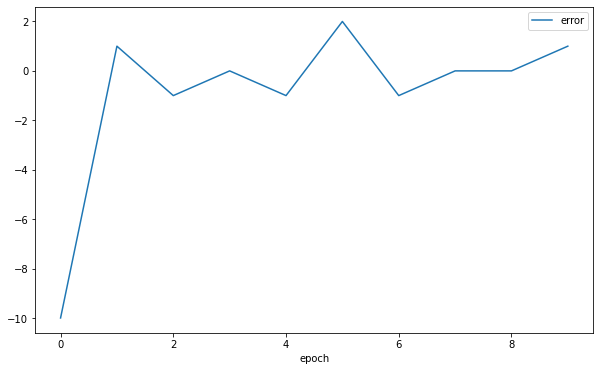

Neuronio 4


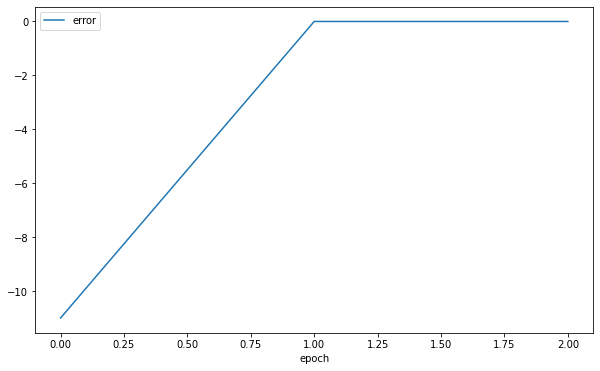

Neuronio 5


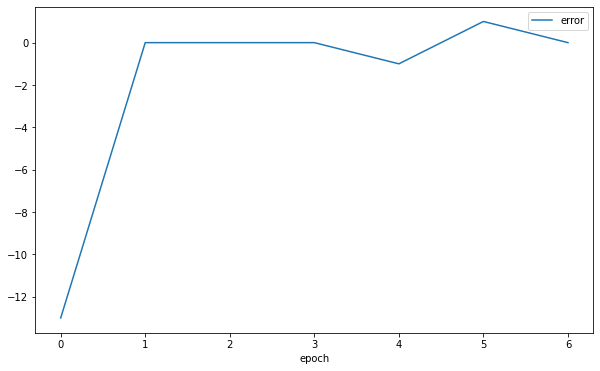

Taxa de Acerto: 0.9861111111111112
-----------------------------------------------------------------------------------------------------------------------------


In [5]:
pipe = pipelineClassifier.make_pipeline(n_realizations = 20, task='multiclass_classification')

acc_artificial_der, desvio_padrao_artificial_der, realization_select_artificial_der, dict_realizations_artificial_der = pipe.run_realizations(
    
    df=df_dermatology, 
    k_fold=5, 
    param_grid={'learning_rate': [0.1, 0.25, 0.01]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    n_epochs=10,
    normalize=True
)

In [6]:
best_perceptron_artificial_der = realization_select_artificial_der['classifier']
best_train_data_der = realization_select_artificial_der['train_data']
best_test_data_der = realization_select_artificial_der['test_data']
taxa_acerto_der = realization_select_artificial_der['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_der}\nDesvio Padrao: {desvio_padrao_artificial_der}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_der}')

Artificial
Acurácia: 0.9770833333333332
Desvio Padrao: 0.02126740773058501

- Info best model
Taxa Acerto: 0.9722222222222222


##### Selecionando as melhores features

In [9]:
best_fetaures = utils.select_columns_p_value( df_dermatology.drop(['target'],axis=1).values, 
                                              df_dermatology['target'].values, 
                                              df_dermatology.columns.values,
                                              value=0.05)

best_fetaures

array(['erythema', 'itching', 'koebner phenomenon', 'follicular papules',
       'oral mucosal involvement', 'eosinophils in the infiltrate',
       'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis',
       'acanthosis', 'parakeratosis', 'clubbing of the rete ridges',
       'thinning of the suprapapillary epidermis',
       'perifollicular parakeratosis',
       'inflammatory monoluclear inflitrate', 'age', 'target'],
      dtype=object)

In [14]:
len(best_fetaures)

17




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


Neuronio 3


Neuronio 4


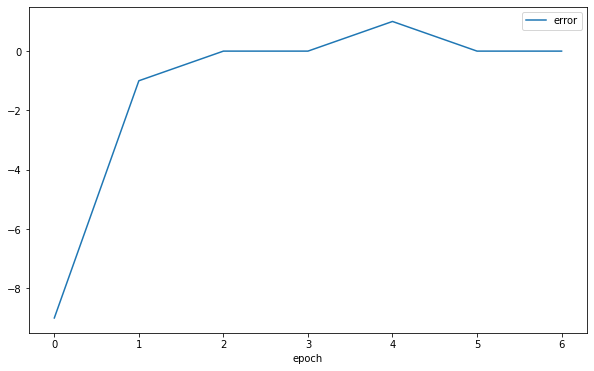

Neuronio 5


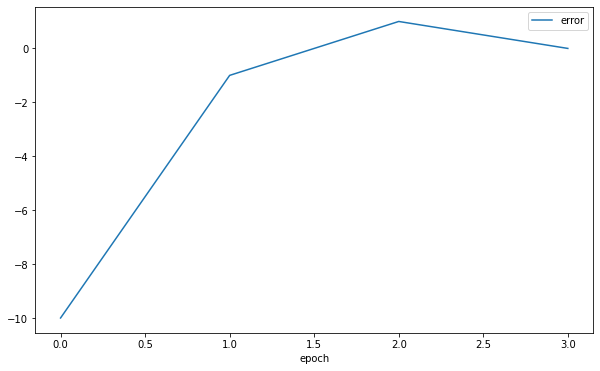

Taxa de Acerto: 0.8611111111111112
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Neuronio 0


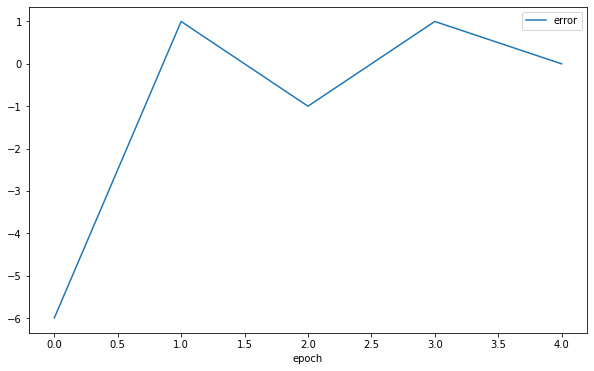

Neuronio 1


Neuronio 2


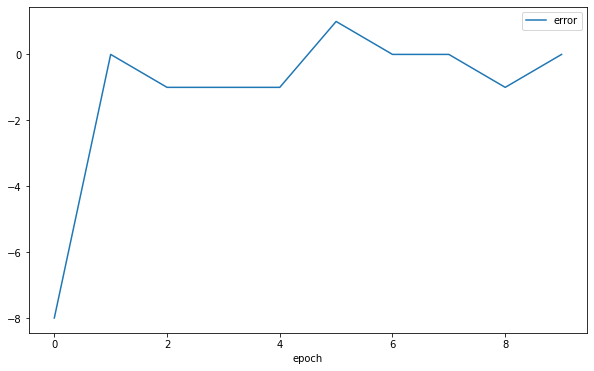

Neuronio 3


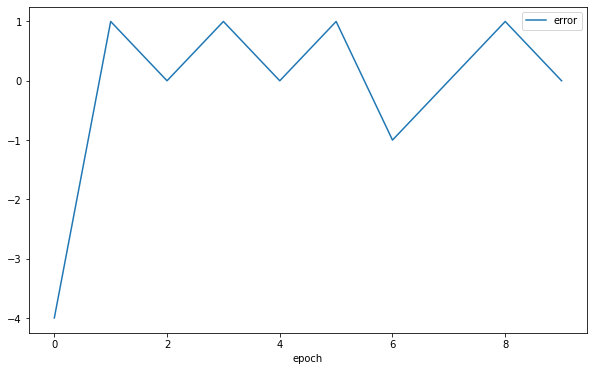

Neuronio 4


Neuronio 5


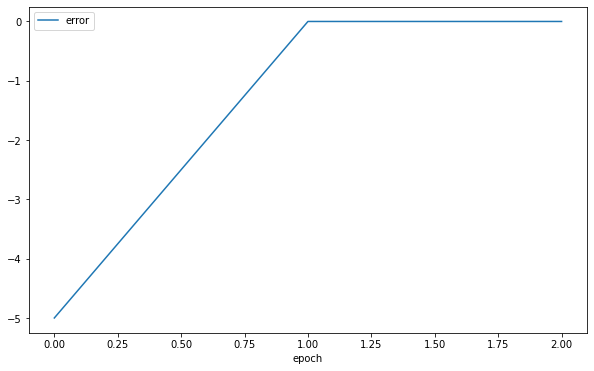

Taxa de Acerto: 0.9444444444444444
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Neuronio 0


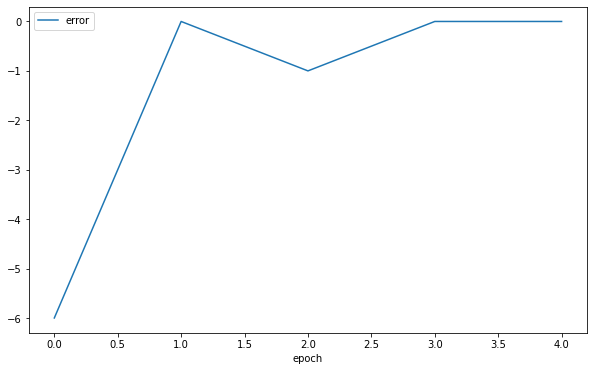

Neuronio 1


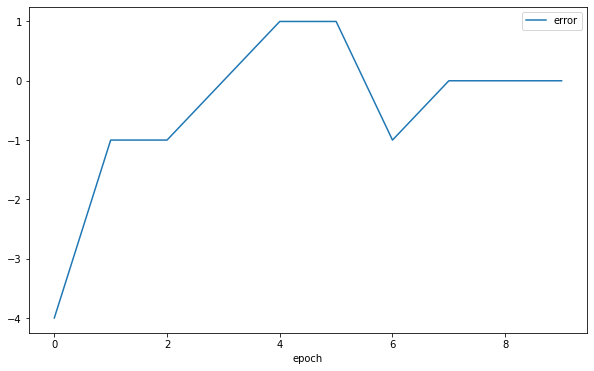

Neuronio 2


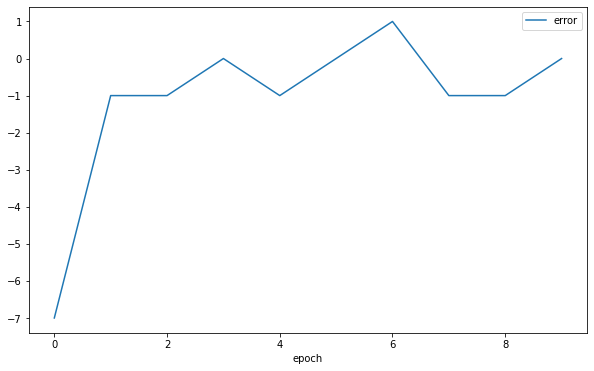

Neuronio 3


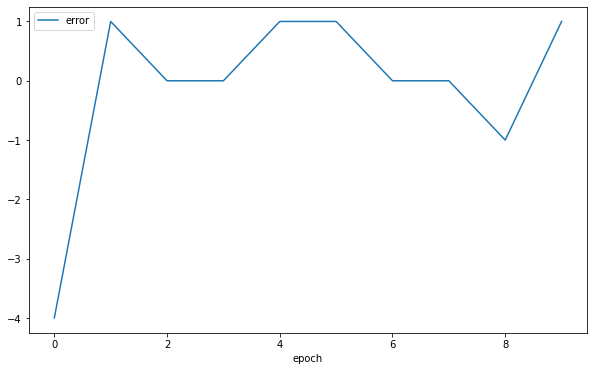

Neuronio 4


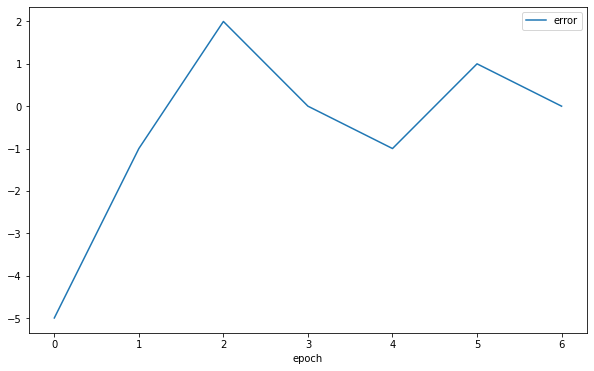

Neuronio 5


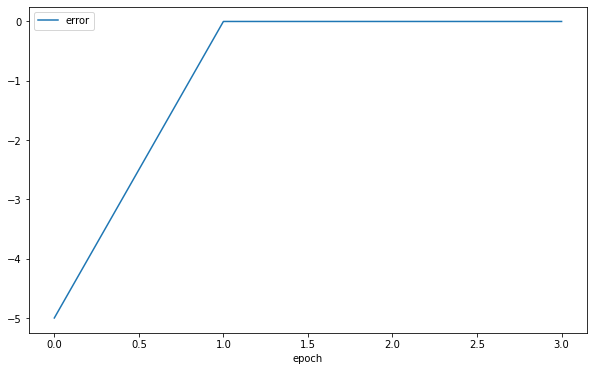

Taxa de Acerto: 0.9722222222222222
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 3
Start Grid Search k-fold: 5
Neuronio 0


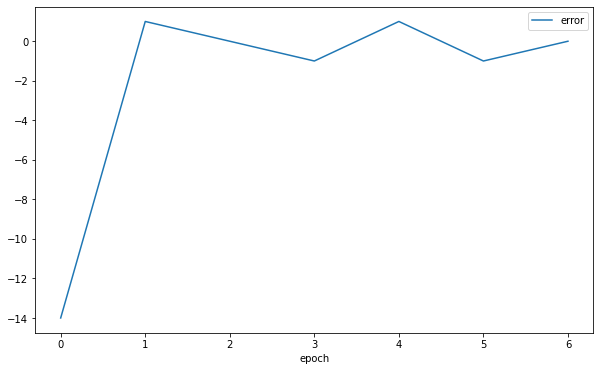

Neuronio 1


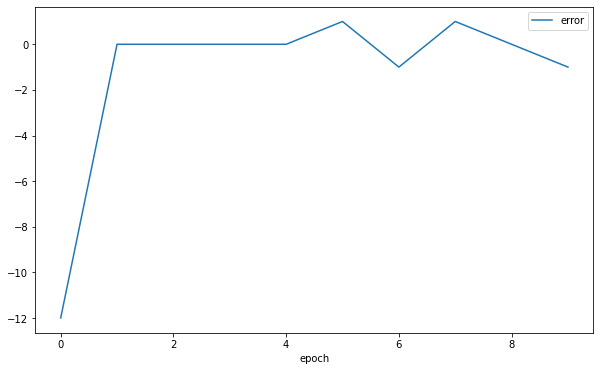

Neuronio 2


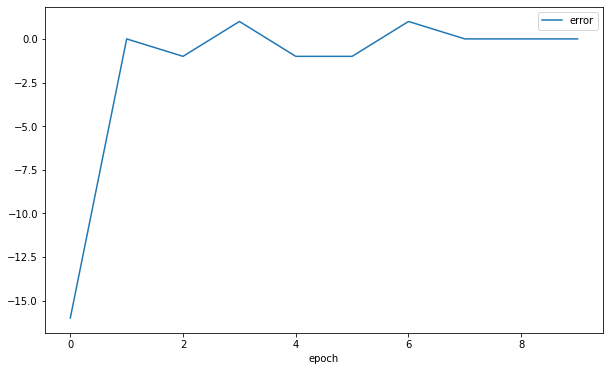

Neuronio 3


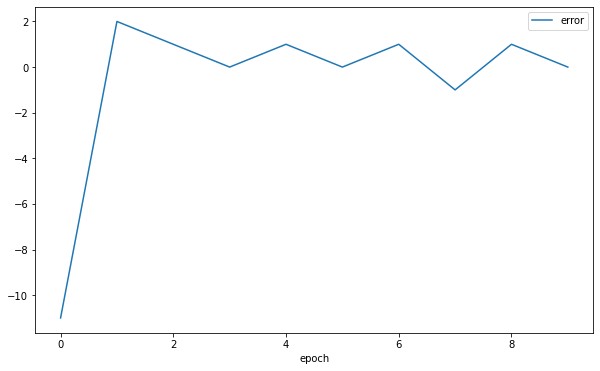

Neuronio 4


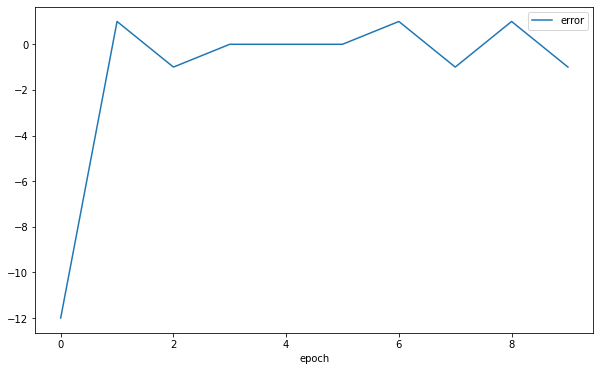

Neuronio 5


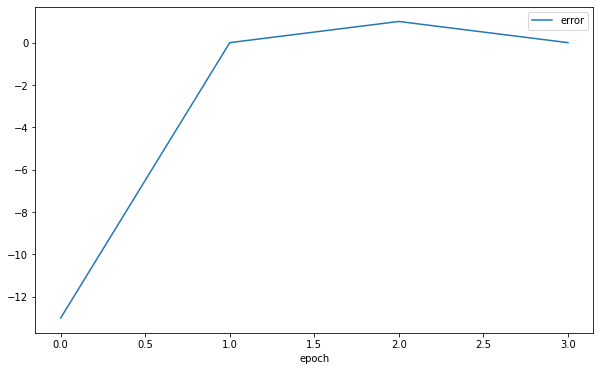

Taxa de Acerto: 0.9583333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 4
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


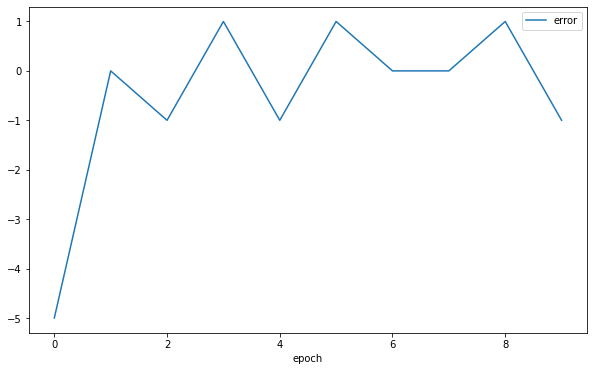

Neuronio 2


Neuronio 3


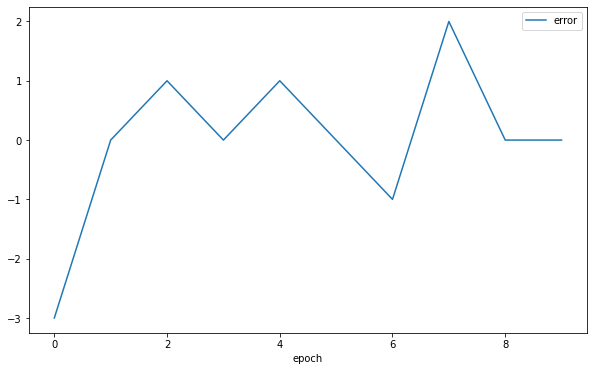

Neuronio 4


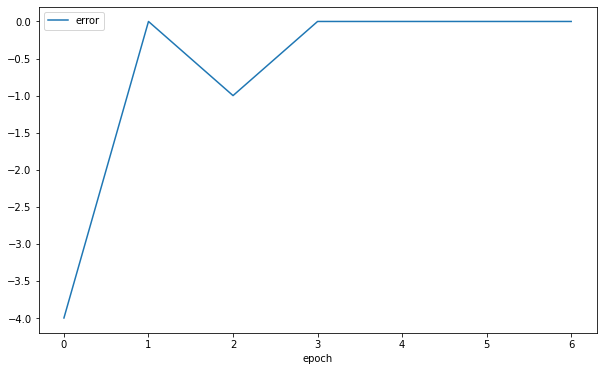

Neuronio 5


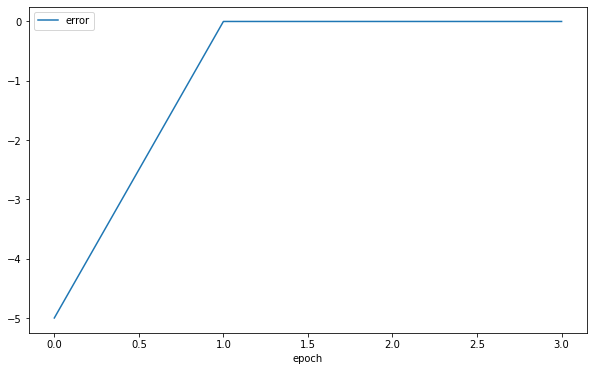

Taxa de Acerto: 0.9444444444444444
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 5
Start Grid Search k-fold: 5
Neuronio 0


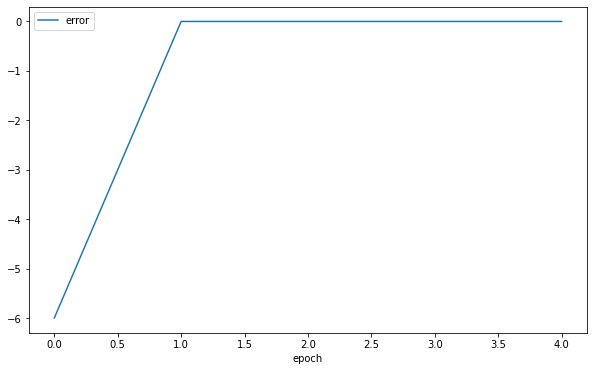

Neuronio 1


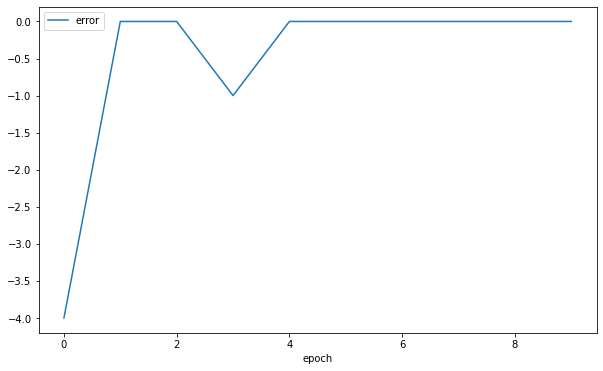

Neuronio 2


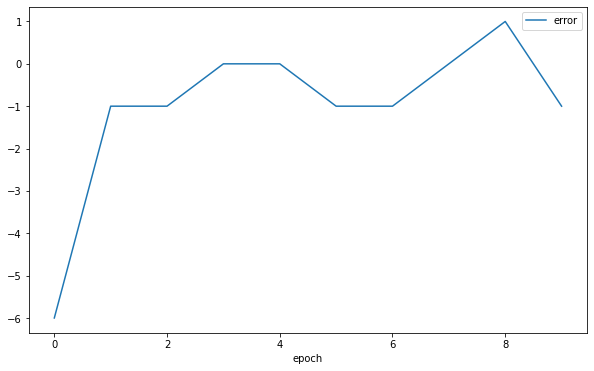

Neuronio 3


Neuronio 4


Neuronio 5


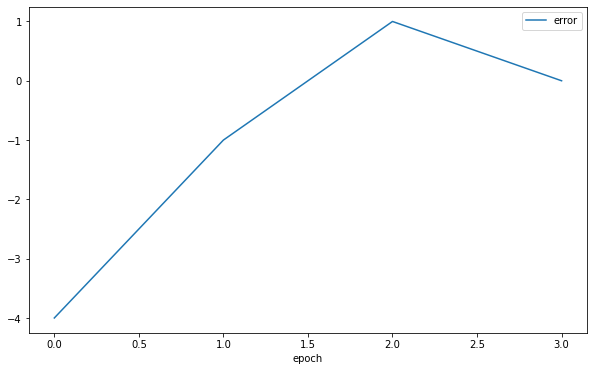

Taxa de Acerto: 0.9583333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 6
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


Neuronio 3


Neuronio 4


Neuronio 5


Taxa de Acerto: 0.9444444444444444
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 7
Start Grid Search k-fold: 5
Neuronio 0


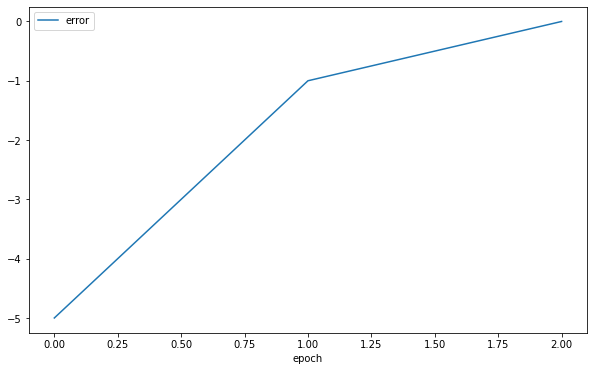

Neuronio 1


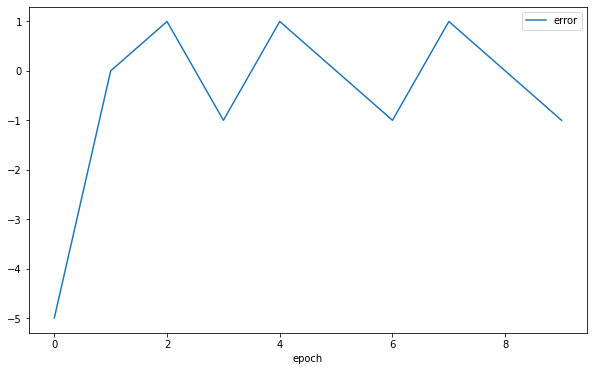

Neuronio 2


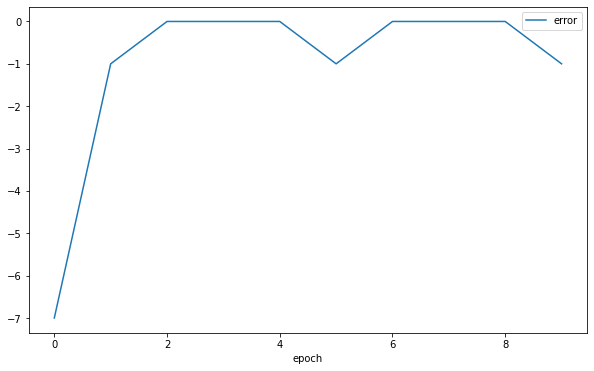

Neuronio 3


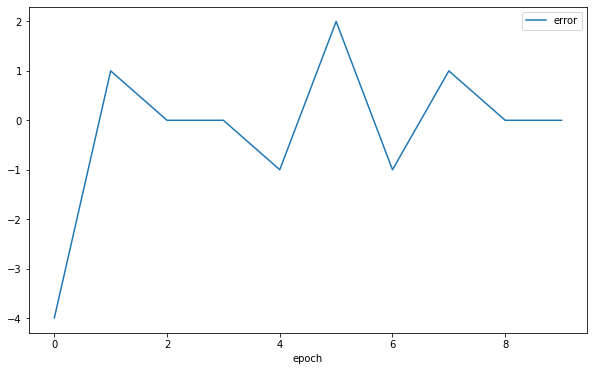

Neuronio 4


Neuronio 5


Taxa de Acerto: 0.9305555555555556
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 8
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


Neuronio 3


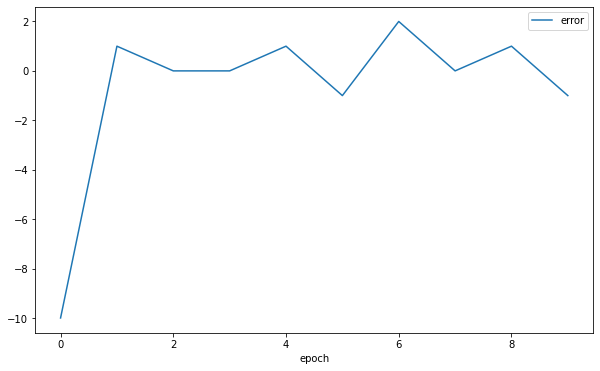

Neuronio 4


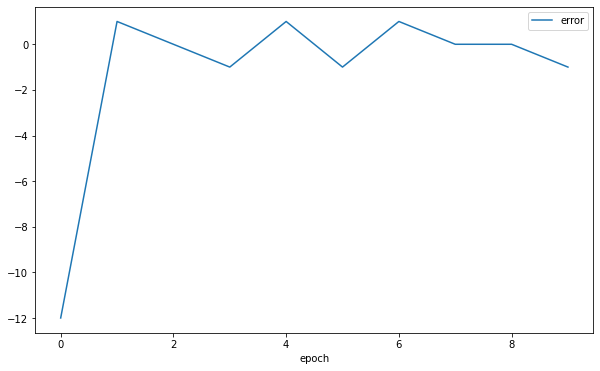

Neuronio 5


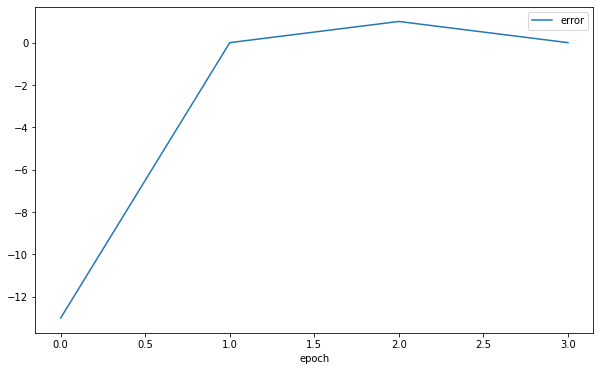

Taxa de Acerto: 0.9027777777777778
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 9
Start Grid Search k-fold: 5
Neuronio 0


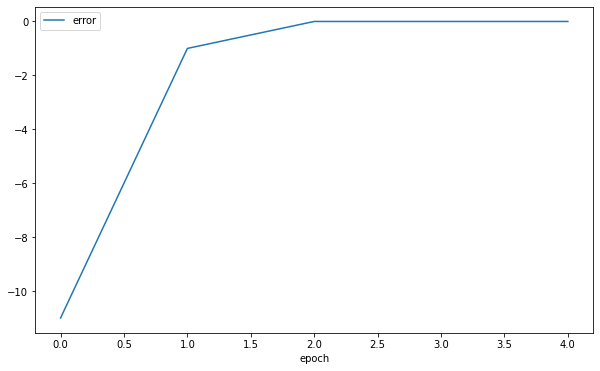

Neuronio 1


Neuronio 2


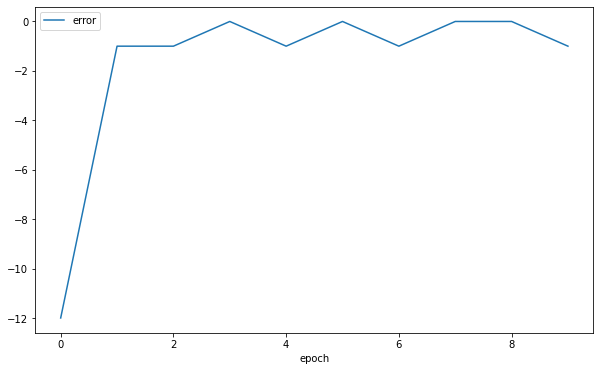

Neuronio 3


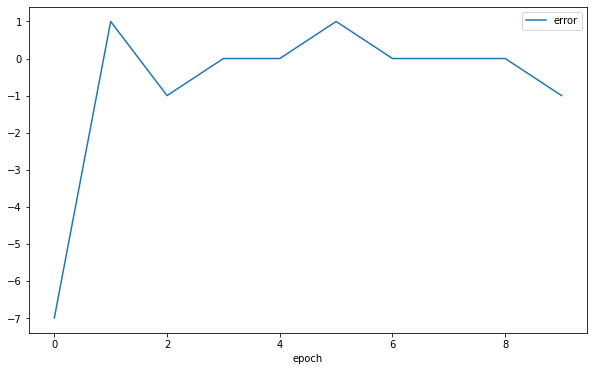

Neuronio 4


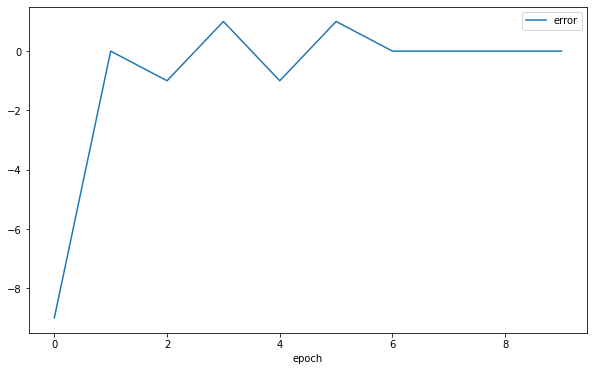

Neuronio 5


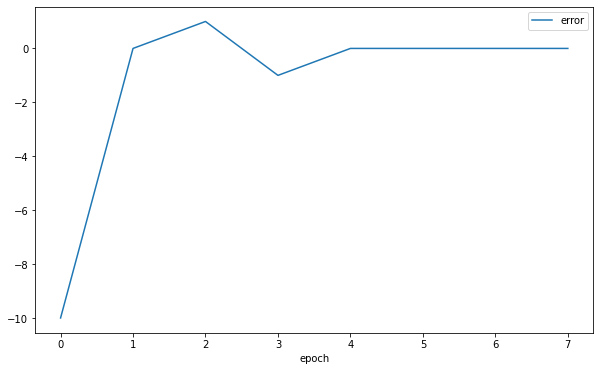

Taxa de Acerto: 0.9305555555555556
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 10
Start Grid Search k-fold: 5
Neuronio 0


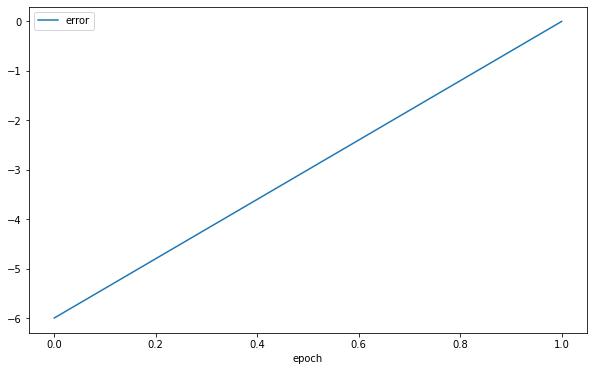

Neuronio 1


Neuronio 2


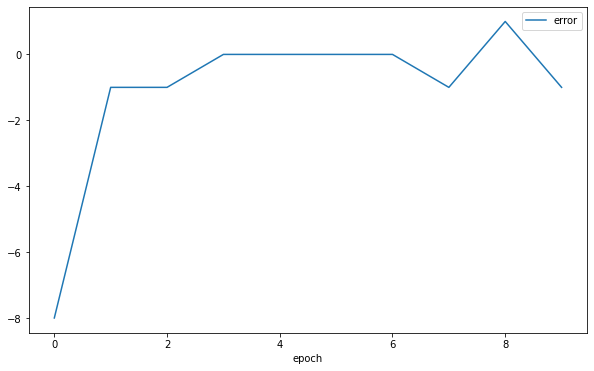

Neuronio 3


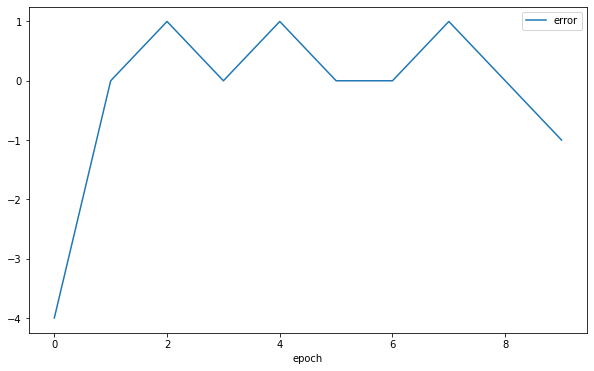

Neuronio 4


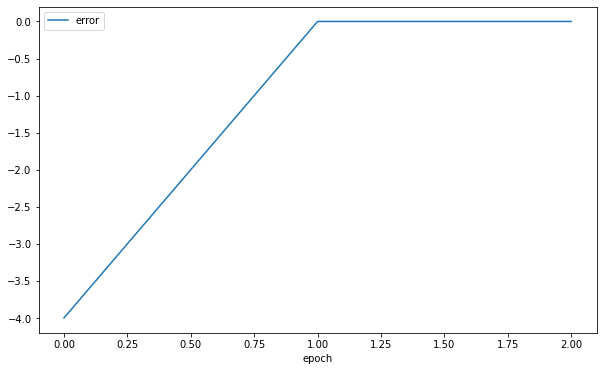

Neuronio 5


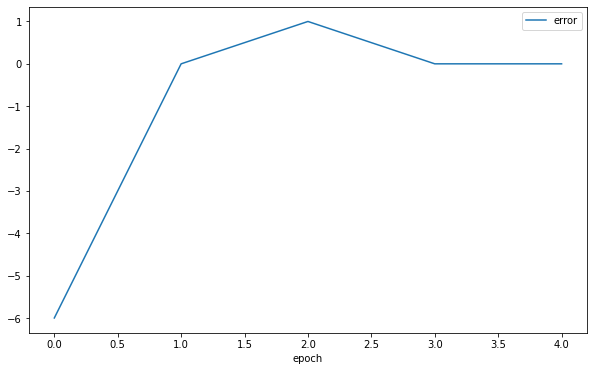

Taxa de Acerto: 0.9305555555555556
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 11
Start Grid Search k-fold: 5
Neuronio 0


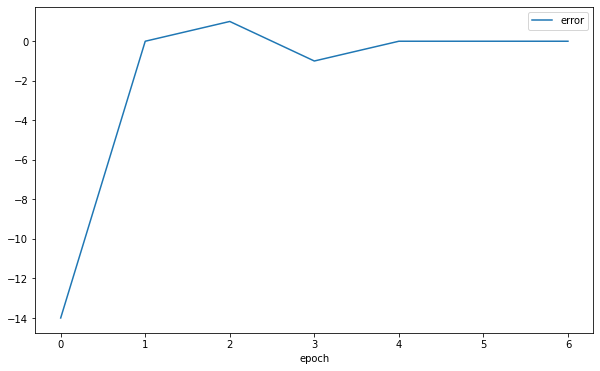

Neuronio 1


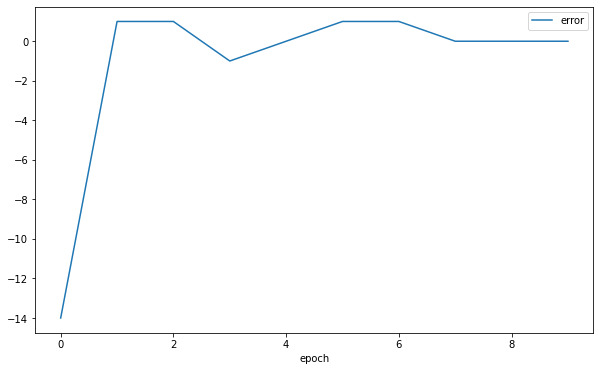

Neuronio 2


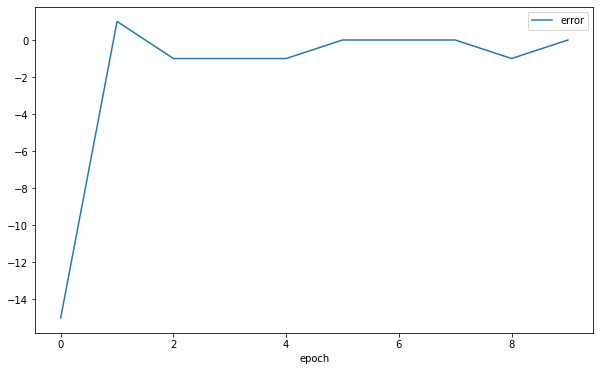

Neuronio 3


Neuronio 4


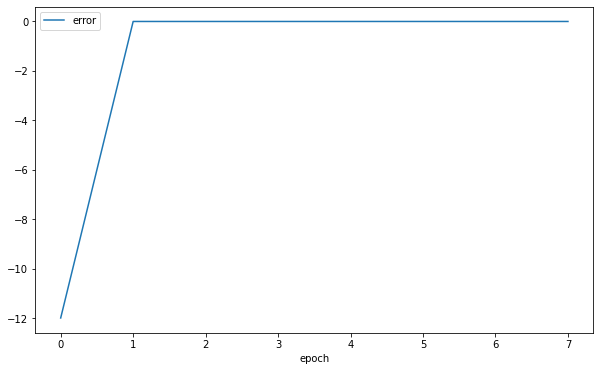

Neuronio 5


Taxa de Acerto: 0.9166666666666666
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 12
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


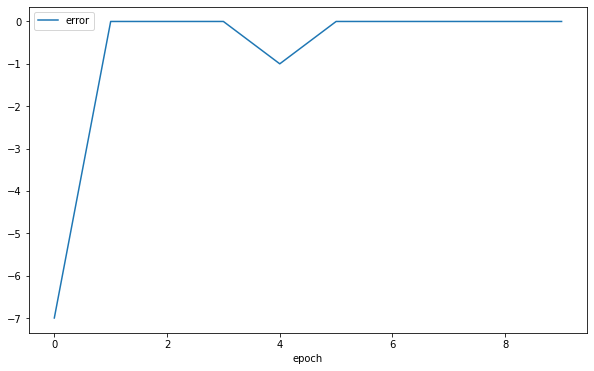

Neuronio 3


Neuronio 4


Neuronio 5


Taxa de Acerto: 0.9027777777777778
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 13
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


Neuronio 3


Neuronio 4


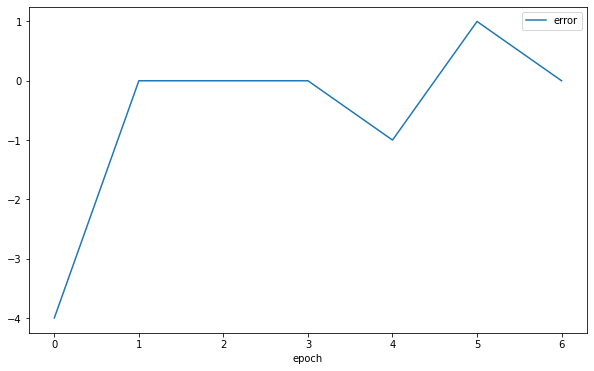

Neuronio 5


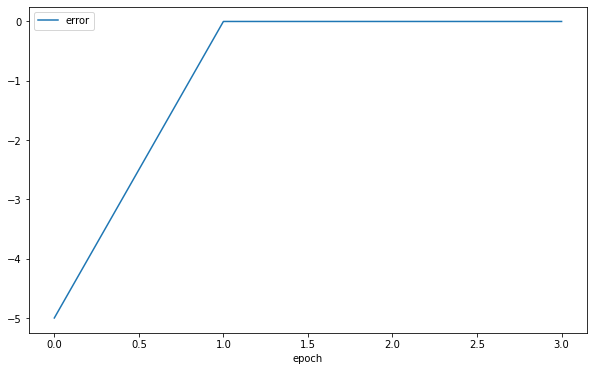

Taxa de Acerto: 0.9583333333333334
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 14
Start Grid Search k-fold: 5
Neuronio 0


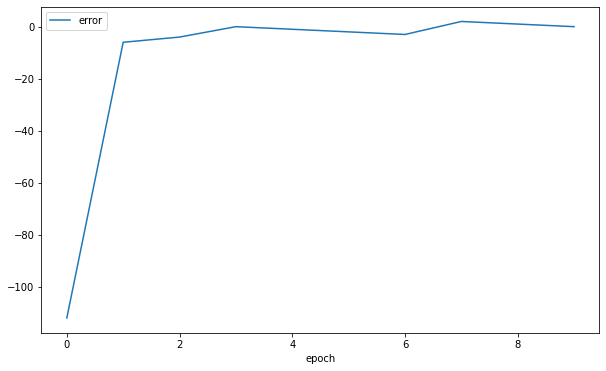

Neuronio 1


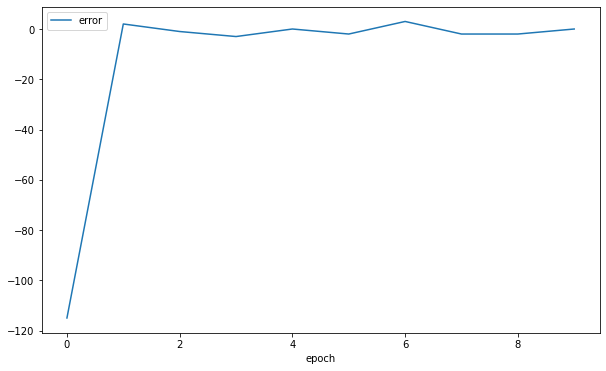

Neuronio 2


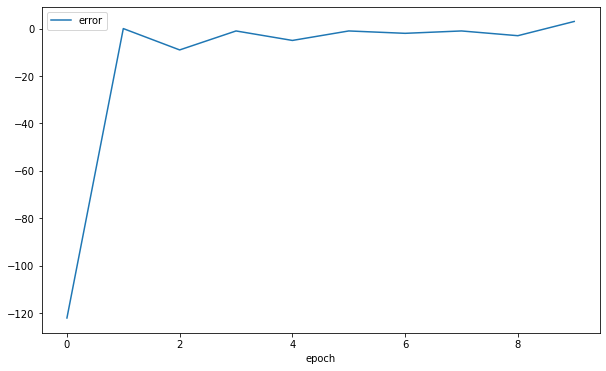

Neuronio 3


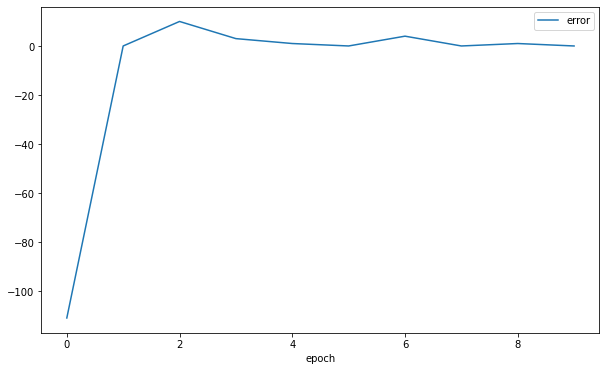

Neuronio 4


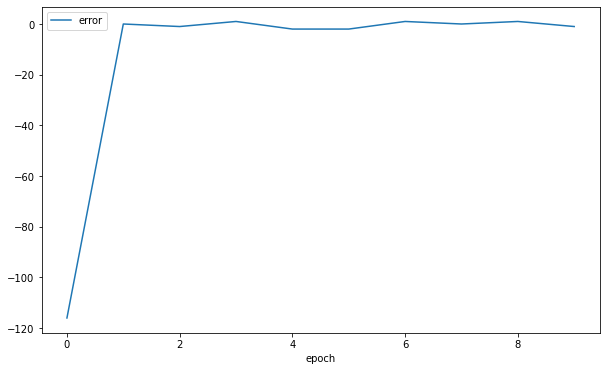

Neuronio 5


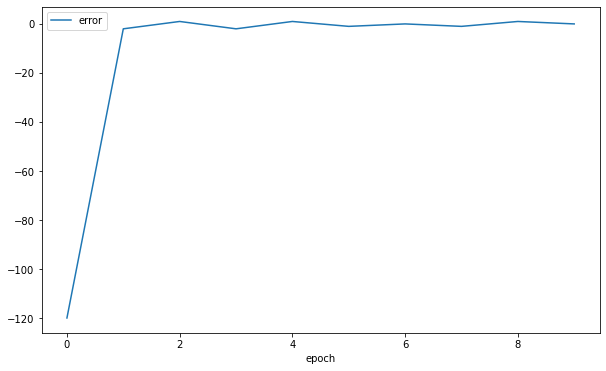

Taxa de Acerto: 0.9027777777777778
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 15
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


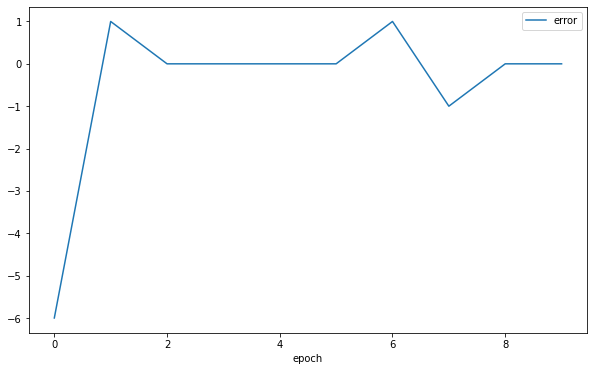

Neuronio 2


Neuronio 3


Neuronio 4


Neuronio 5


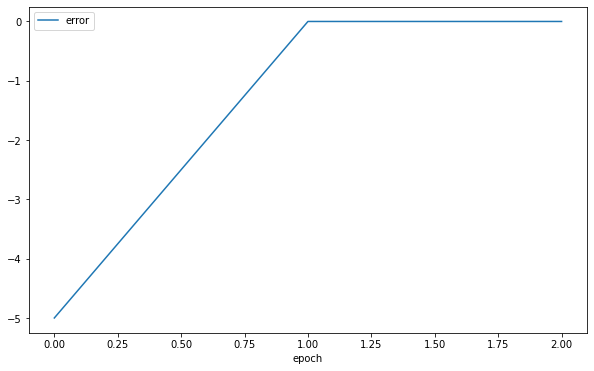

Taxa de Acerto: 0.9305555555555556
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 16
Start Grid Search k-fold: 5
Neuronio 0


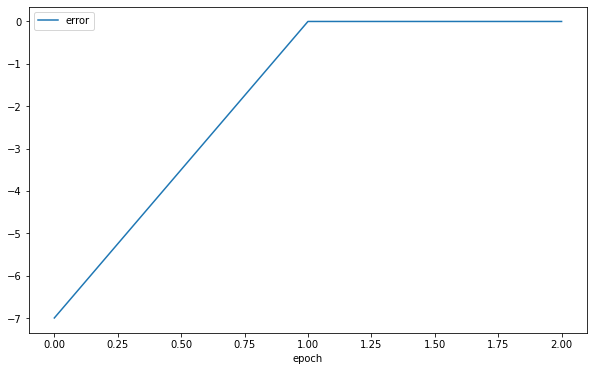

Neuronio 1


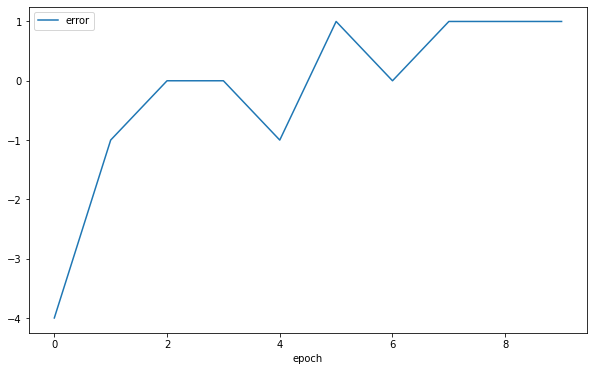

Neuronio 2


Neuronio 3


Neuronio 4


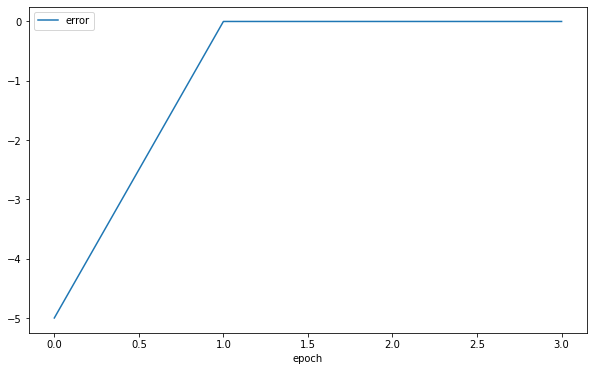

Neuronio 5


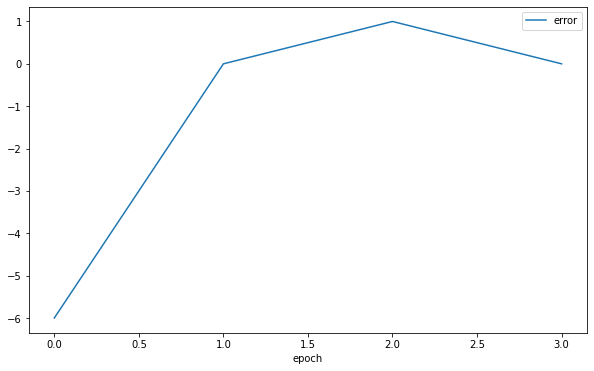

Taxa de Acerto: 0.9444444444444444
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 17
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


Neuronio 3


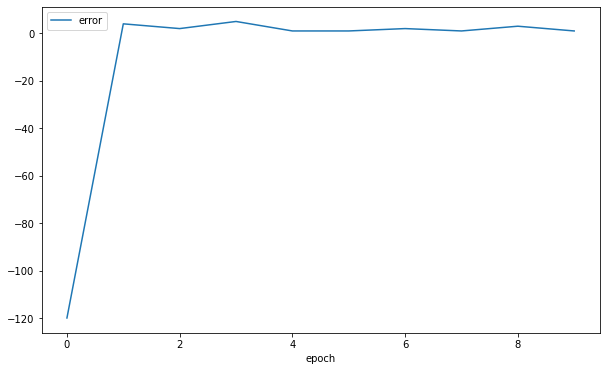

Neuronio 4


Neuronio 5


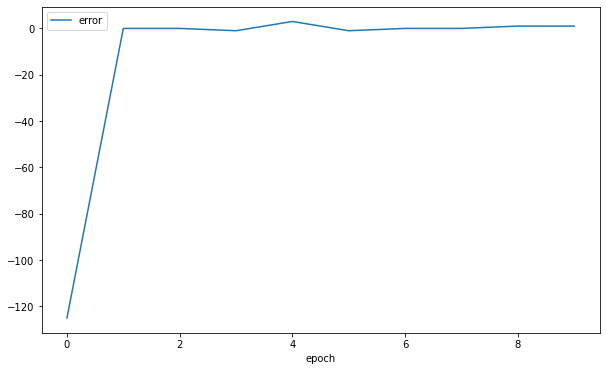

Taxa de Acerto: 0.9444444444444444
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 18
Start Grid Search k-fold: 5
Neuronio 0


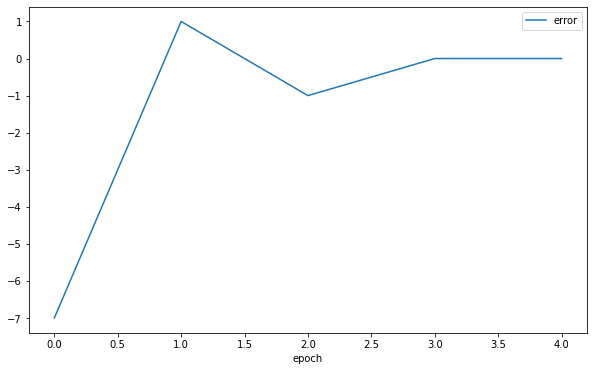

Neuronio 1


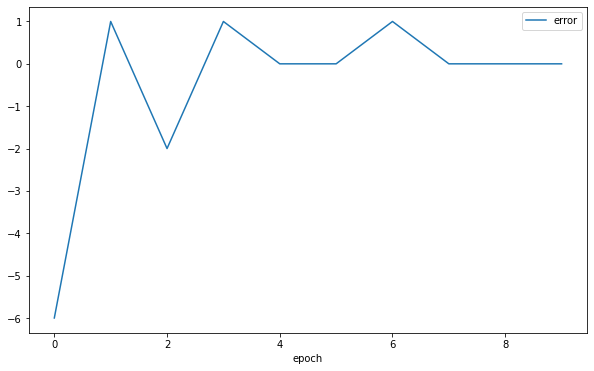

Neuronio 2


Neuronio 3


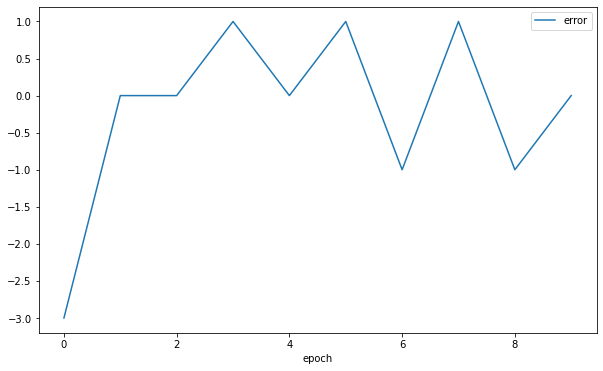

Neuronio 4


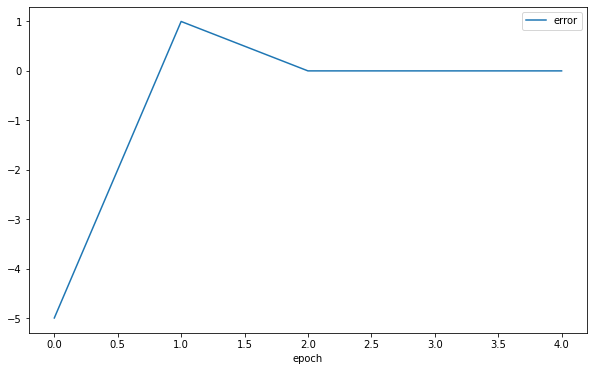

Neuronio 5


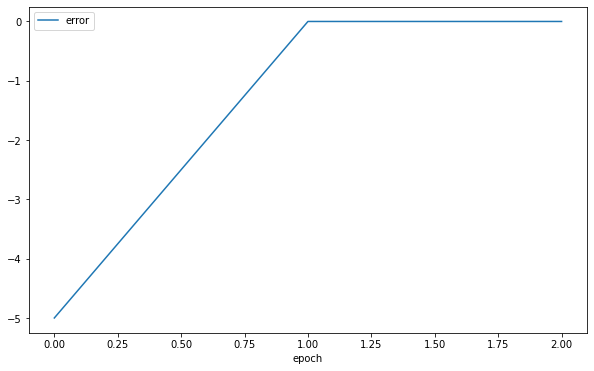

Taxa de Acerto: 0.9444444444444444
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 19
Start Grid Search k-fold: 5
Neuronio 0


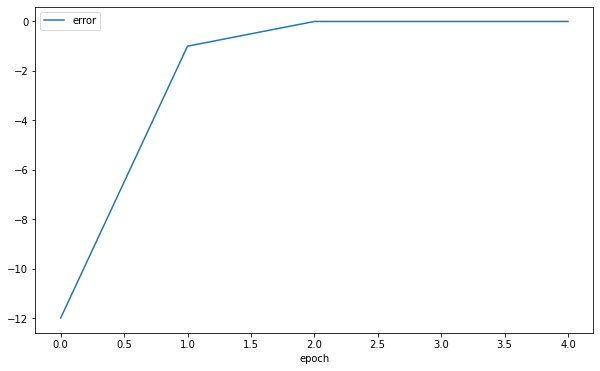

Neuronio 1


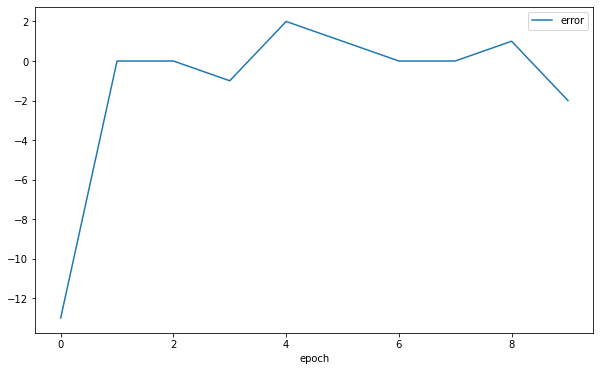

Neuronio 2


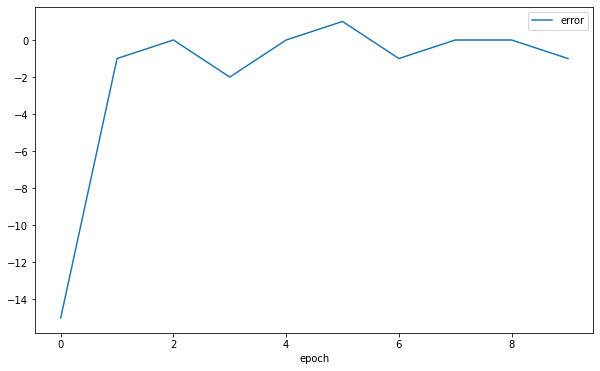

Neuronio 3


Neuronio 4


Neuronio 5


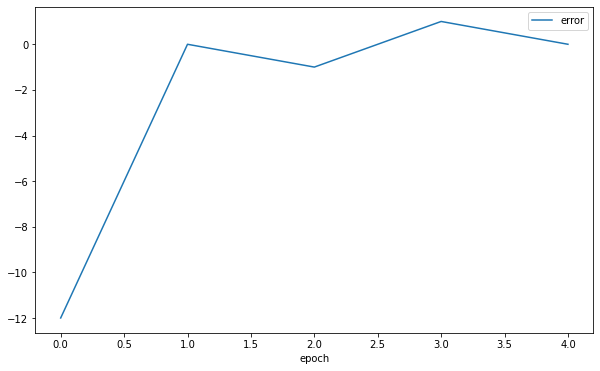

Taxa de Acerto: 0.9027777777777778
-----------------------------------------------------------------------------------------------------------------------------


In [10]:
df_dermatology_best = df_dermatology[best_fetaures].copy()

pipe = pipelineClassifier.make_pipeline(n_realizations = 20, task='multiclass_classification')

acc_artificial_der_best, desvio_padrao_artificial_der_best, realization_select_artificial_der_best, dict_realizations_artificial_der_best = pipe.run_realizations(
    
    df=df_dermatology_best, 
    k_fold=5, 
    param_grid={'learning_rate': [0.1, 0.25, 0.01]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    n_epochs=10,
    normalize=True
)

In [11]:
best_perceptron_artificial_der_best = realization_select_artificial_der_best['classifier']
best_train_data_der_best = realization_select_artificial_der_best['train_data']
best_test_data_der_best = realization_select_artificial_der_best['test_data']
taxa_acerto_der_best = realization_select_artificial_der_best['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_der_best}\nDesvio Padrao: {desvio_padrao_artificial_der_best}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_der_best}')

Artificial
Acurácia: 0.93125
Desvio Padrao: 0.026458050335396166

- Info best model
Taxa Acerto: 0.9305555555555556


# Artificial I

In [ ]:
conjunto_1 = utils.make_coords(coord_limit_x = (2, 4), 
                               coord_limit_y = (8, 10),
                               target= 0,
                               len_set = 50) # Top left


conjunto_2 = utils.make_coords(coord_limit_x = (4, 6), 
                               coord_limit_y = (4, 6),
                               target= 1,
                               len_set = 50) # Bottom

conjunto_3 = utils.make_coords(coord_limit_x = (8, 10), 
                               coord_limit_y = (8, 10),
                               target= 2,
                               len_set = 50) # Bottom right

df_artificial_1 = pd.DataFrame(data= conjunto_1 + conjunto_2 + conjunto_3, columns=['x1', 'x2', 'target'])

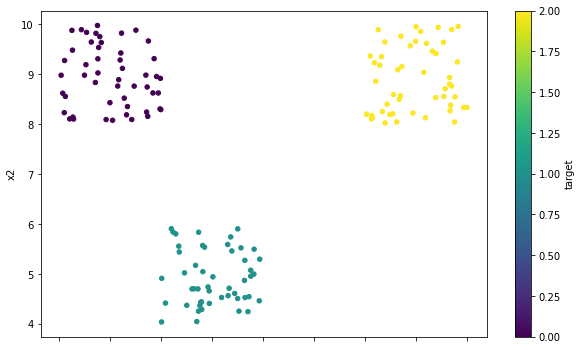

In [ ]:
df_artificial_1.plot.scatter( x='x1', y='x2', c='target', colormap='viridis', figsize=(10,6))




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


Neuronio 2


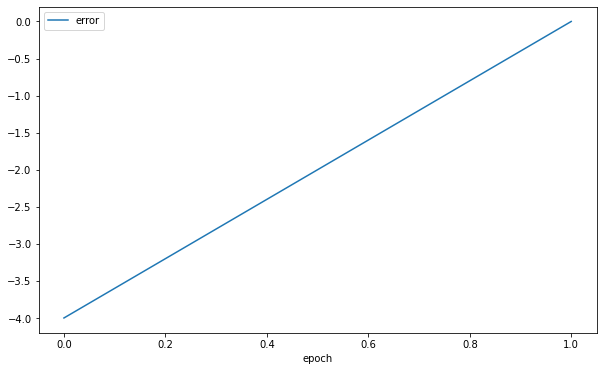

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


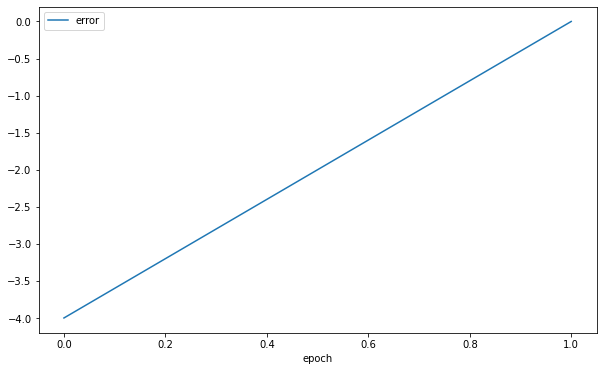

Neuronio 2


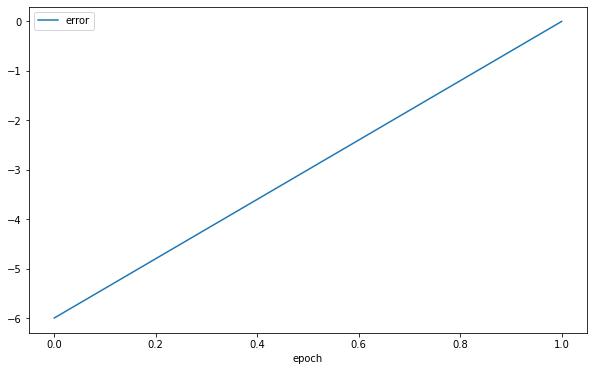

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


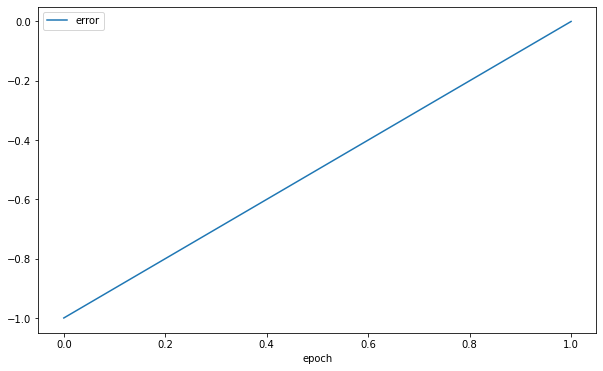

Neuronio 2


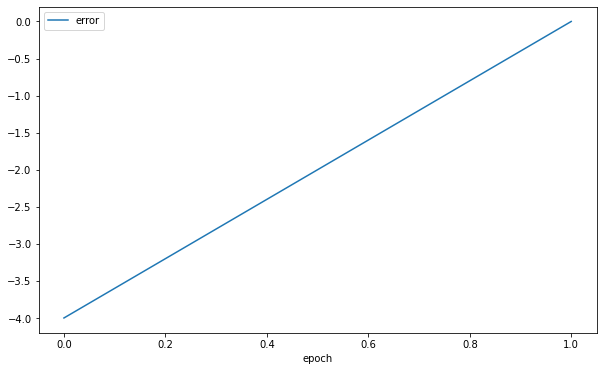

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 3
Start Grid Search k-fold: 5
Neuronio 0


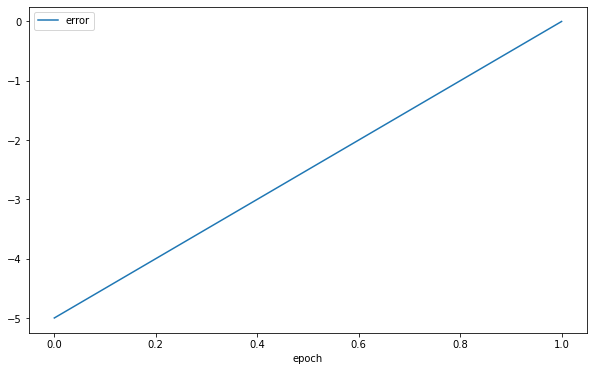

Neuronio 1


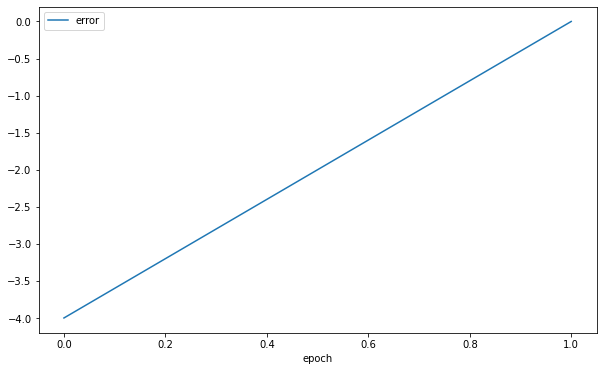

Neuronio 2


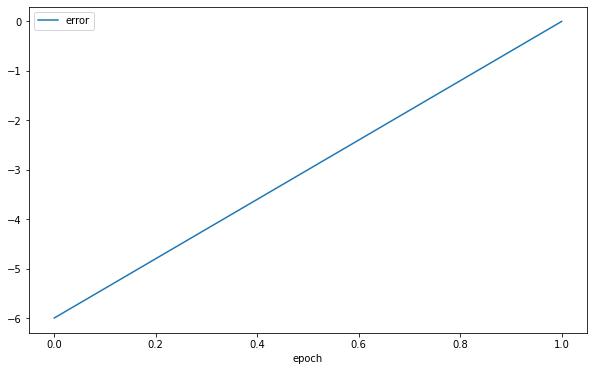

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 4
Start Grid Search k-fold: 5
Neuronio 0


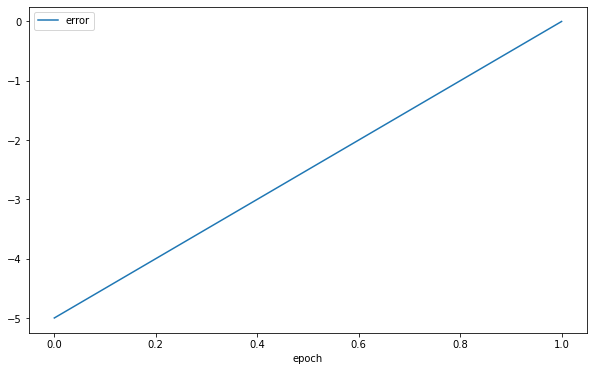

Neuronio 1


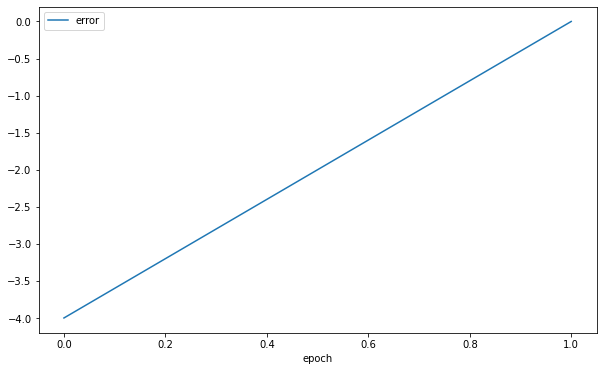

Neuronio 2


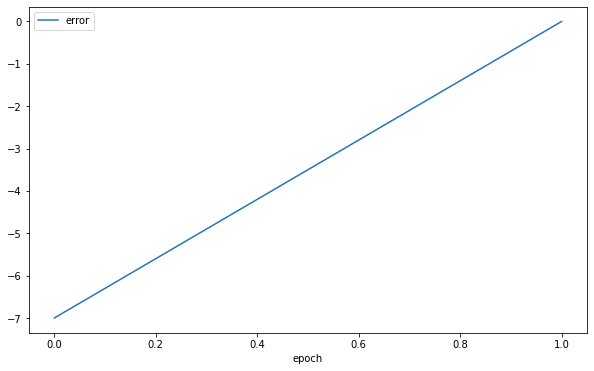

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 5
Start Grid Search k-fold: 5
Neuronio 0


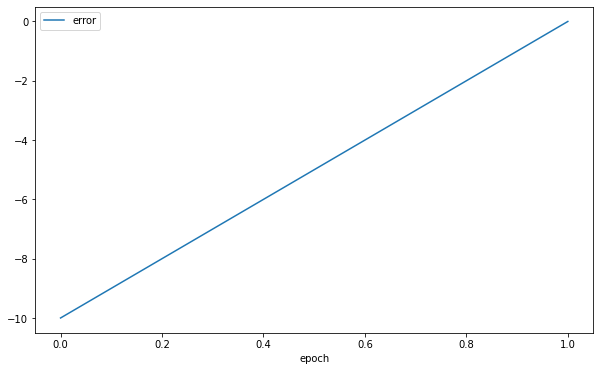

Neuronio 1


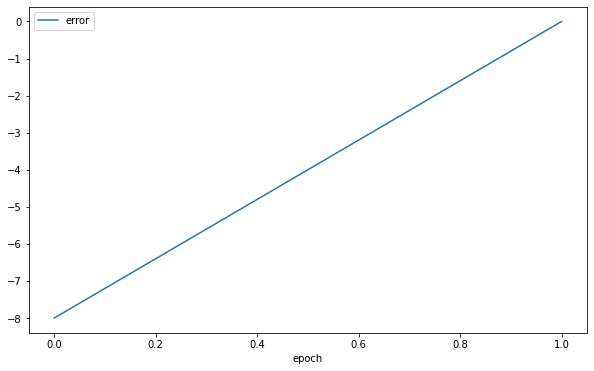

Neuronio 2


Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 6
Start Grid Search k-fold: 5
Neuronio 0


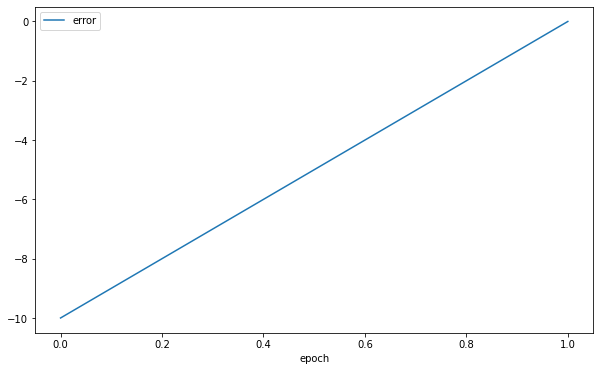

Neuronio 1


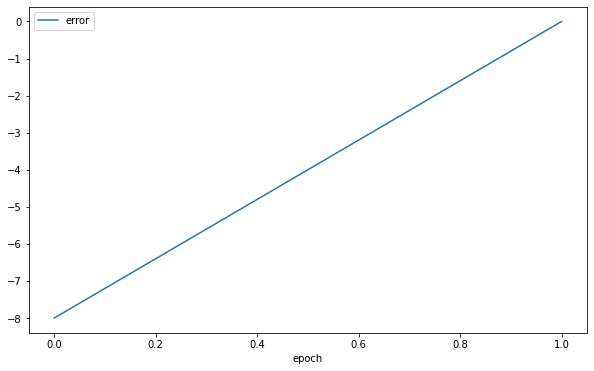

Neuronio 2


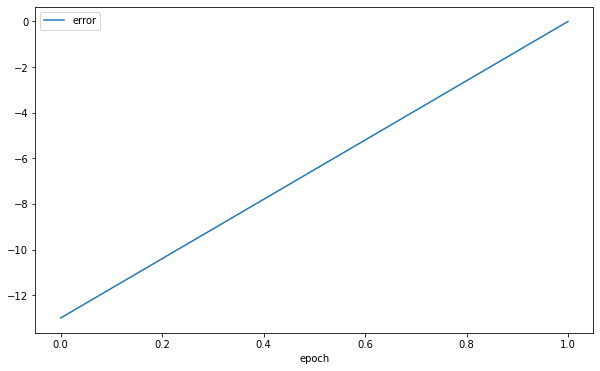

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 7
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


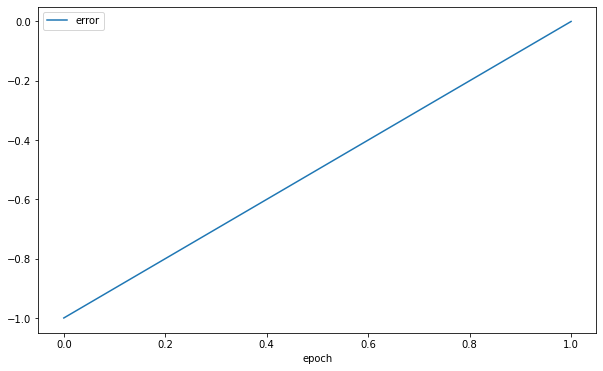

Neuronio 2


Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 8
Start Grid Search k-fold: 5
Neuronio 0


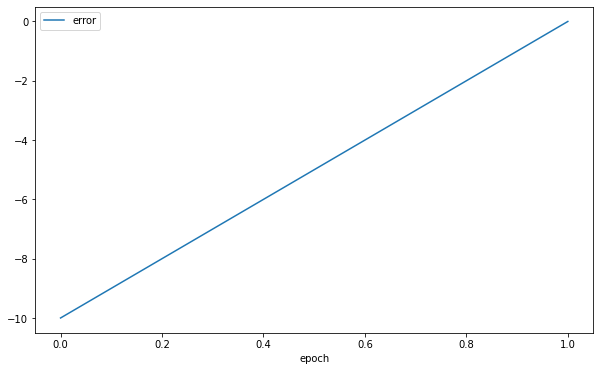

Neuronio 1


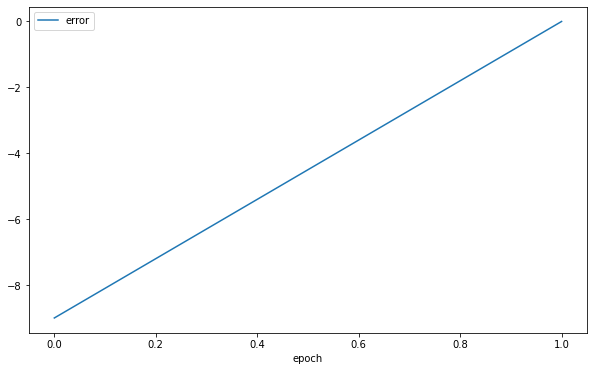

Neuronio 2


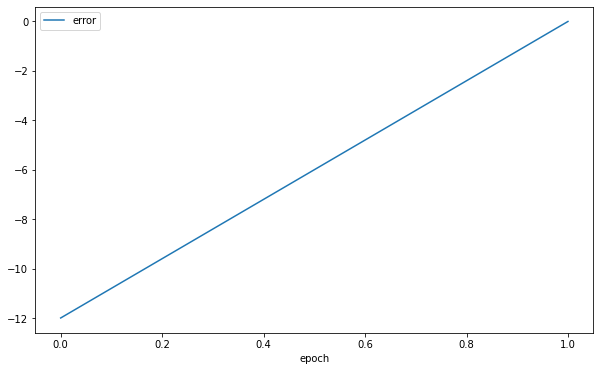

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 9
Start Grid Search k-fold: 5
Neuronio 0


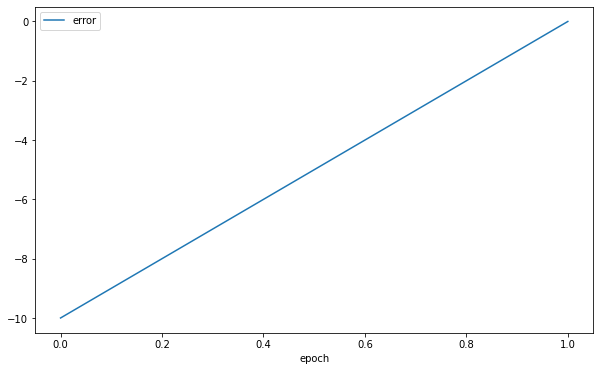

Neuronio 1


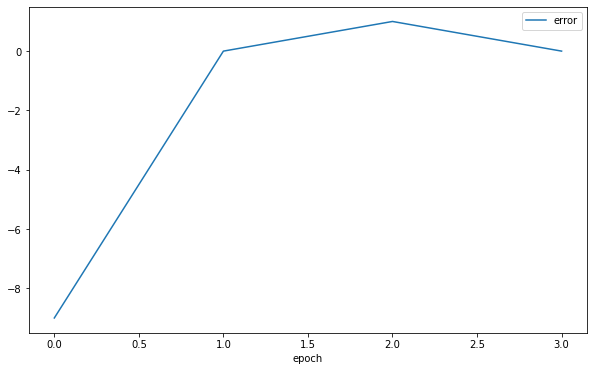

Neuronio 2


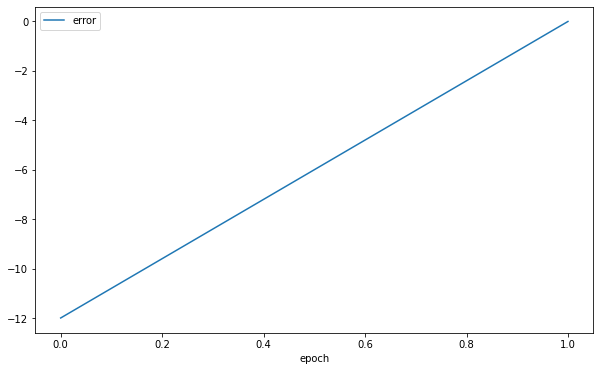

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 10
Start Grid Search k-fold: 5
Neuronio 0


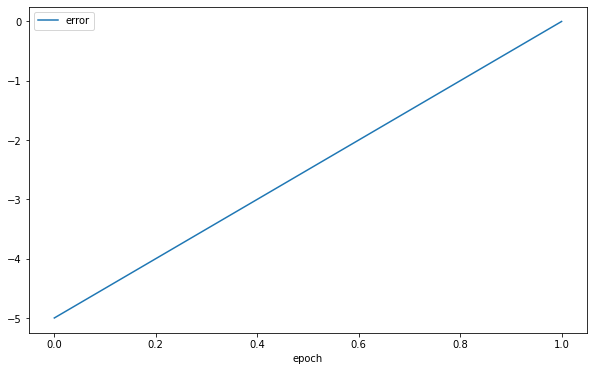

Neuronio 1


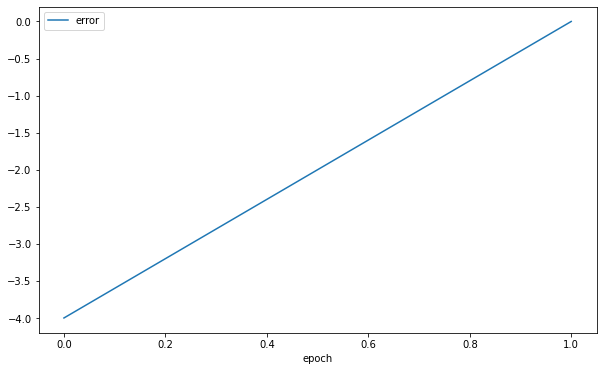

Neuronio 2


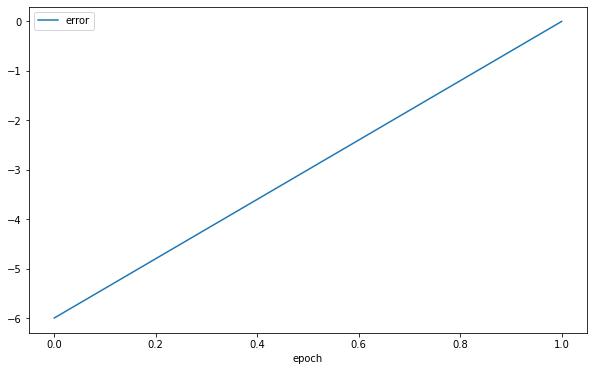

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 11
Start Grid Search k-fold: 5
Neuronio 0


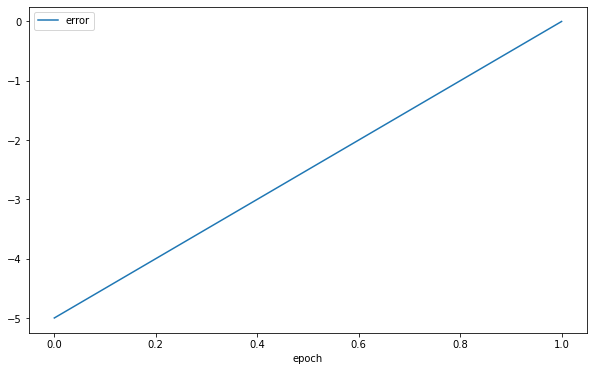

Neuronio 1


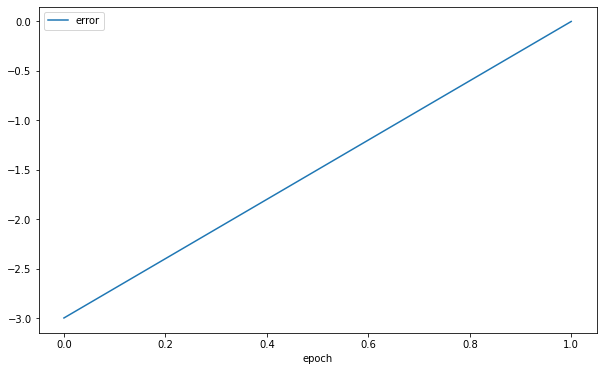

Neuronio 2


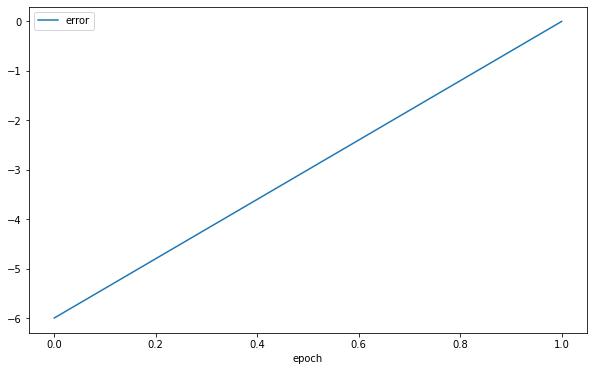

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 12
Start Grid Search k-fold: 5
Neuronio 0


Neuronio 1


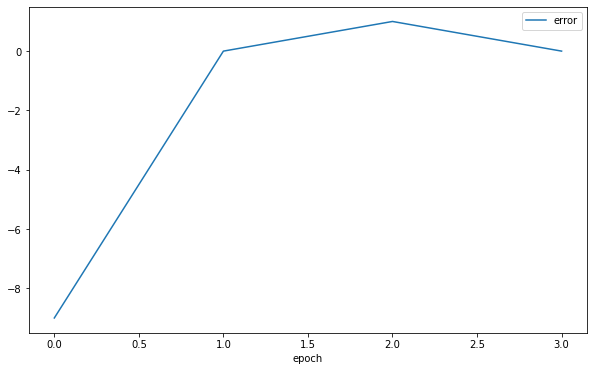

Neuronio 2


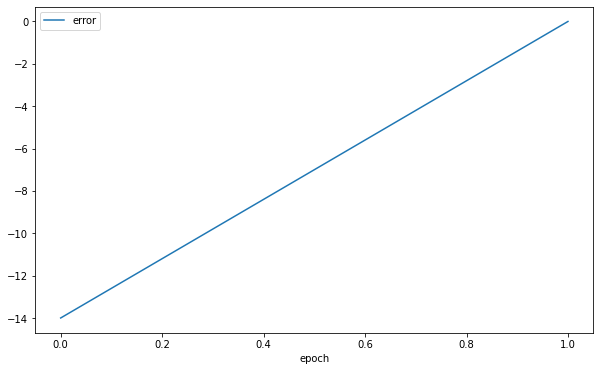

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 13
Start Grid Search k-fold: 5
Neuronio 0


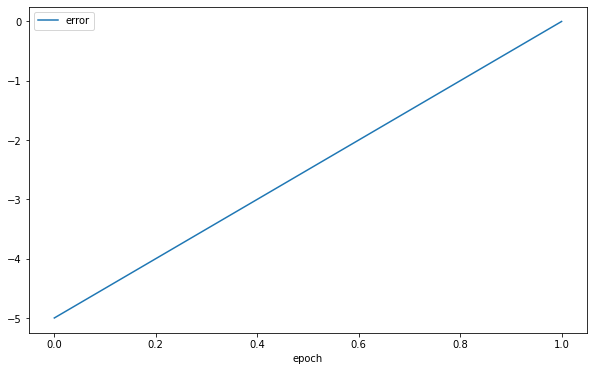

Neuronio 1


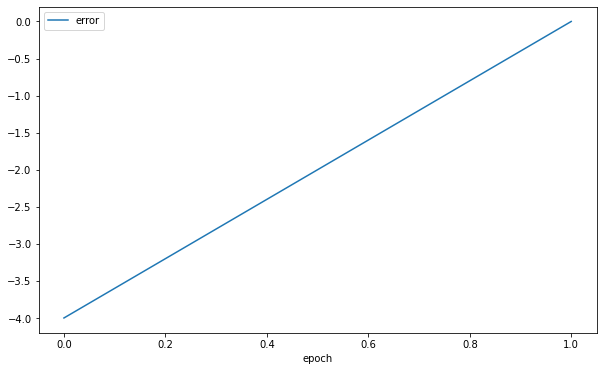

Neuronio 2


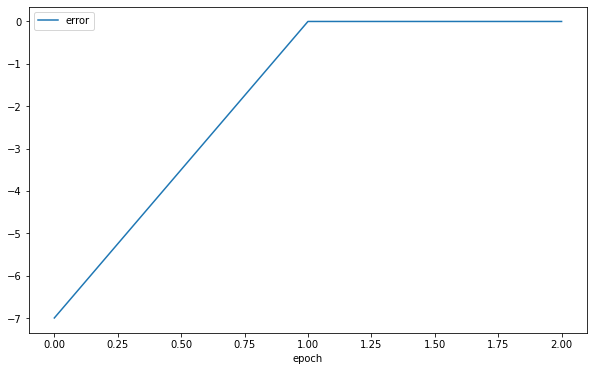

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 14
Start Grid Search k-fold: 5
Neuronio 0


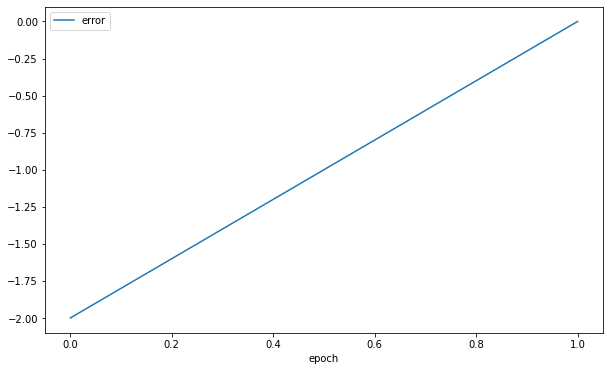

Neuronio 1


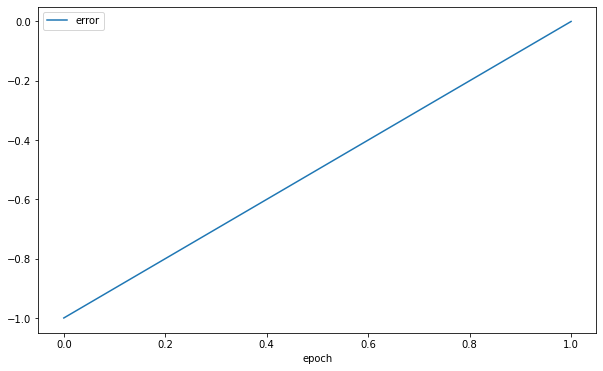

Neuronio 2


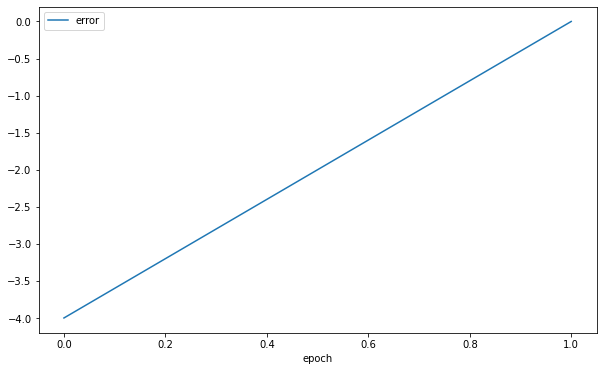

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 15
Start Grid Search k-fold: 5
Neuronio 0


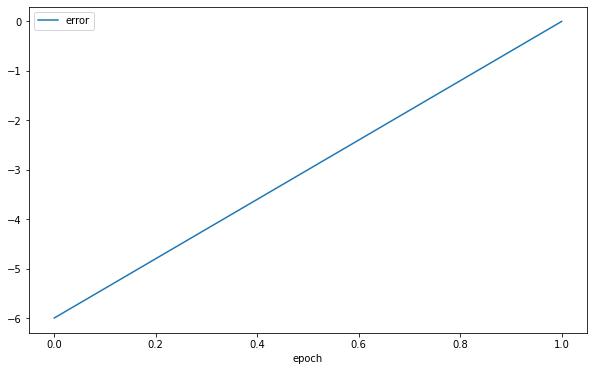

Neuronio 1


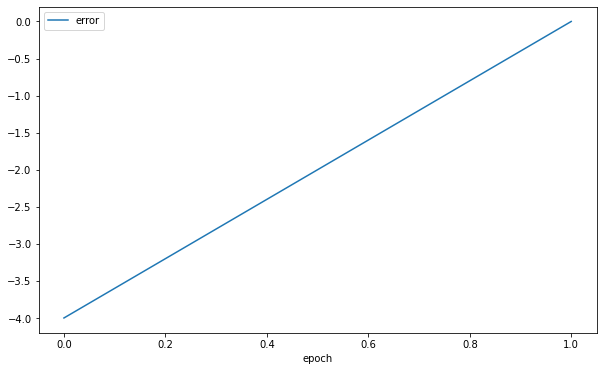

Neuronio 2


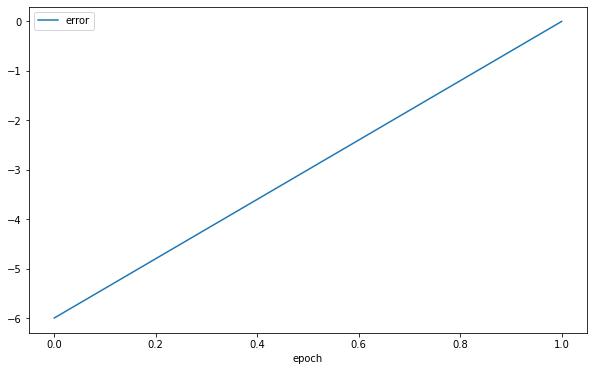

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 16
Start Grid Search k-fold: 5
Neuronio 0


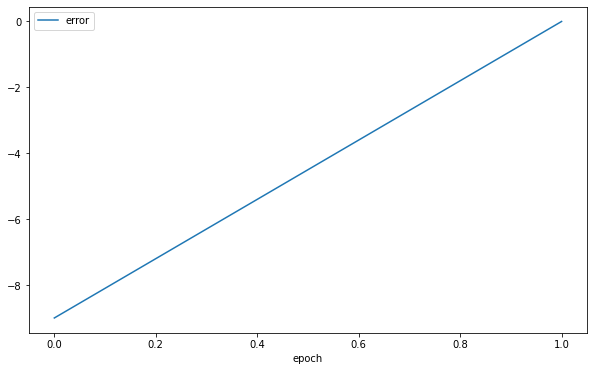

Neuronio 1


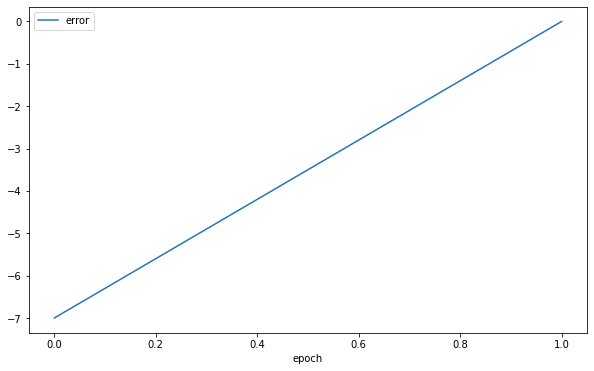

Neuronio 2


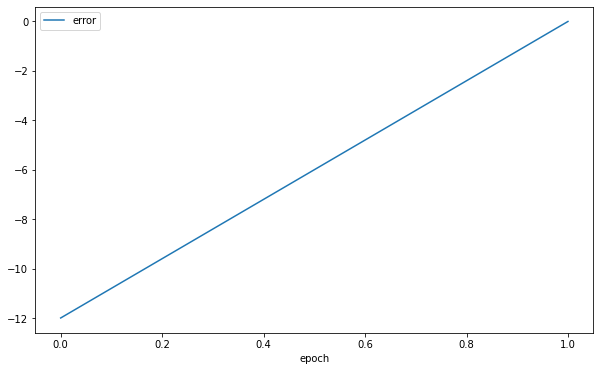

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 17
Start Grid Search k-fold: 5
Neuronio 0


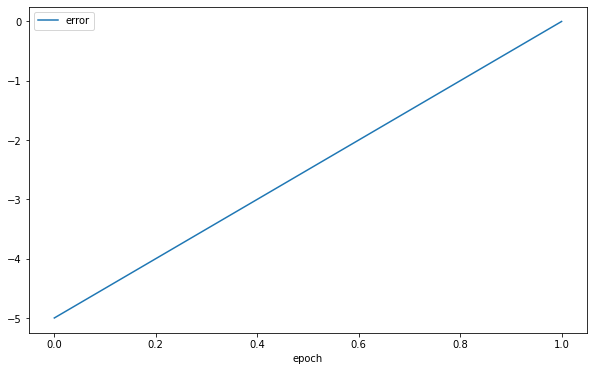

Neuronio 1


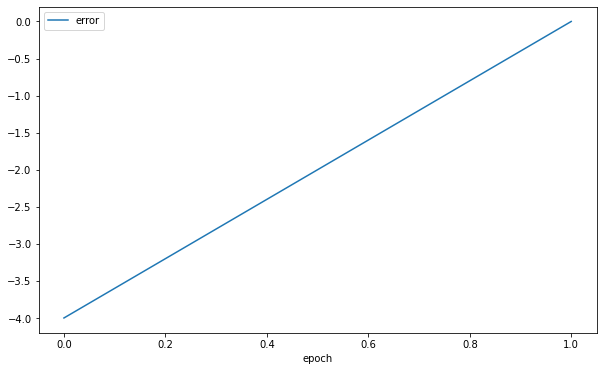

Neuronio 2


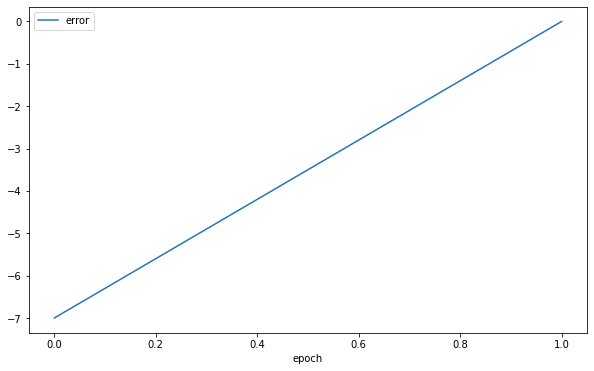

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 18
Start Grid Search k-fold: 5
Neuronio 0


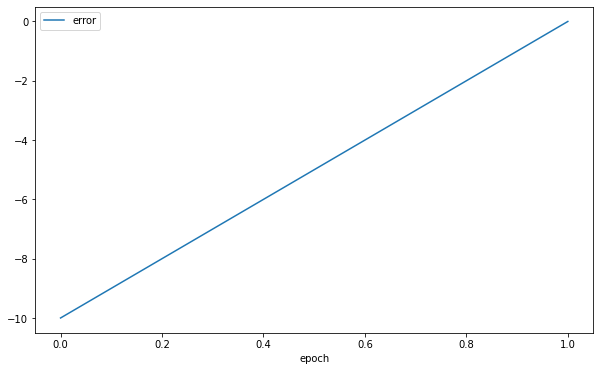

Neuronio 1


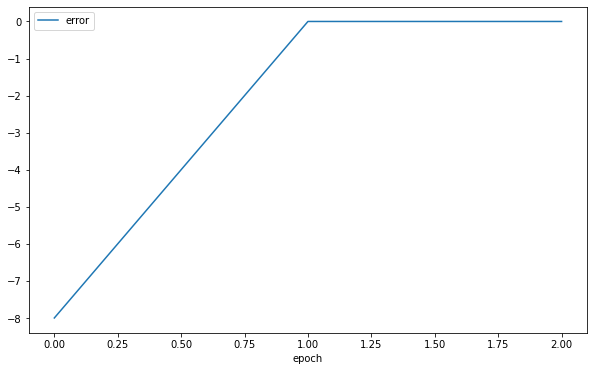

Neuronio 2


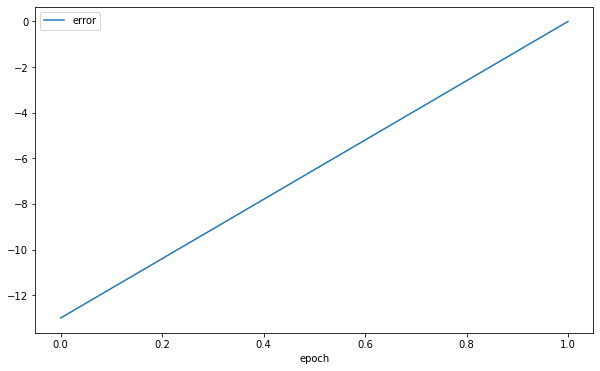

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 19
Start Grid Search k-fold: 5
Neuronio 0


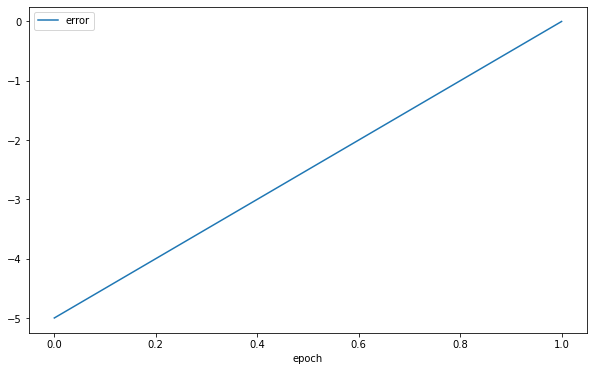

Neuronio 1


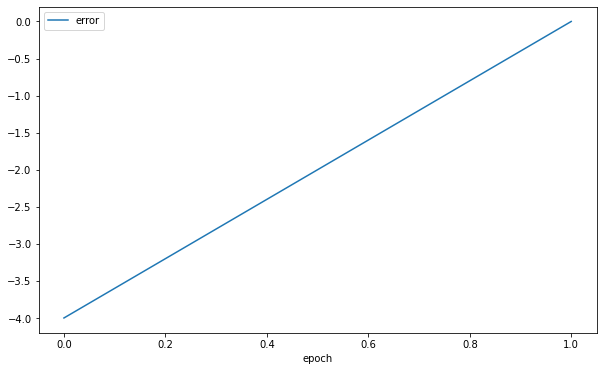

Neuronio 2


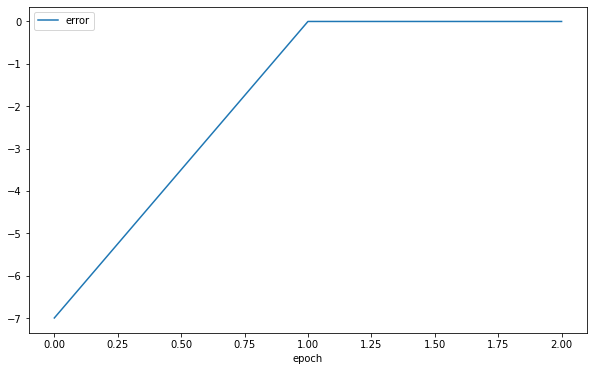

Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------


In [ ]:
pipe = pipelineClassifier.make_pipeline(n_realizations = 20, task='multiclass_classification')

acc_artificial, desvio_padrao_artificial, realization_select_artificial, dict_realizations_artificial = pipe.run_realizations(
    
    df=df_artificial_1, 
    k_fold=5, 
    param_grid={'learning_rate': [0.5, 0.1, 0.2]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    n_epochs=5,
    normalize=False
)

In [ ]:
best_perceptron_artificial = realization_select_artificial['classifier']
best_train_data = realization_select_artificial['train_data']
best_train_data = realization_select_artificial['test_data']
taxa_acerto = realization_select_artificial['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial}\nDesvio Padrao: {desvio_padrao_artificial}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto}')

Artificial
Acurácia: 1.0
Desvio Padrao: 0.0

- Info best model
Taxa Acerto: 1.0


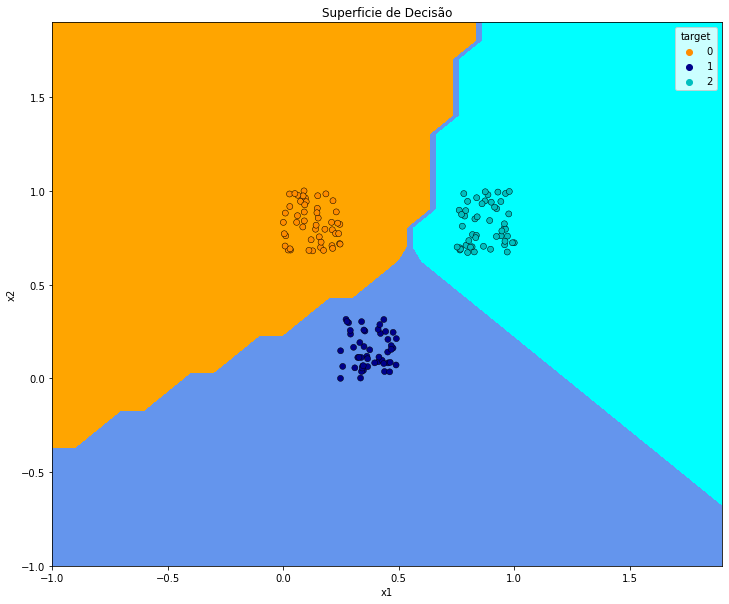

In [ ]:
plots.plot_decision_boundary(
    
    df_artificial_1,
    list_features = ['x1', 'x2'],
    col_target='target',
    model = best_perceptron_artificial,
    task = 'multiclass_classification',
    h=.1
)